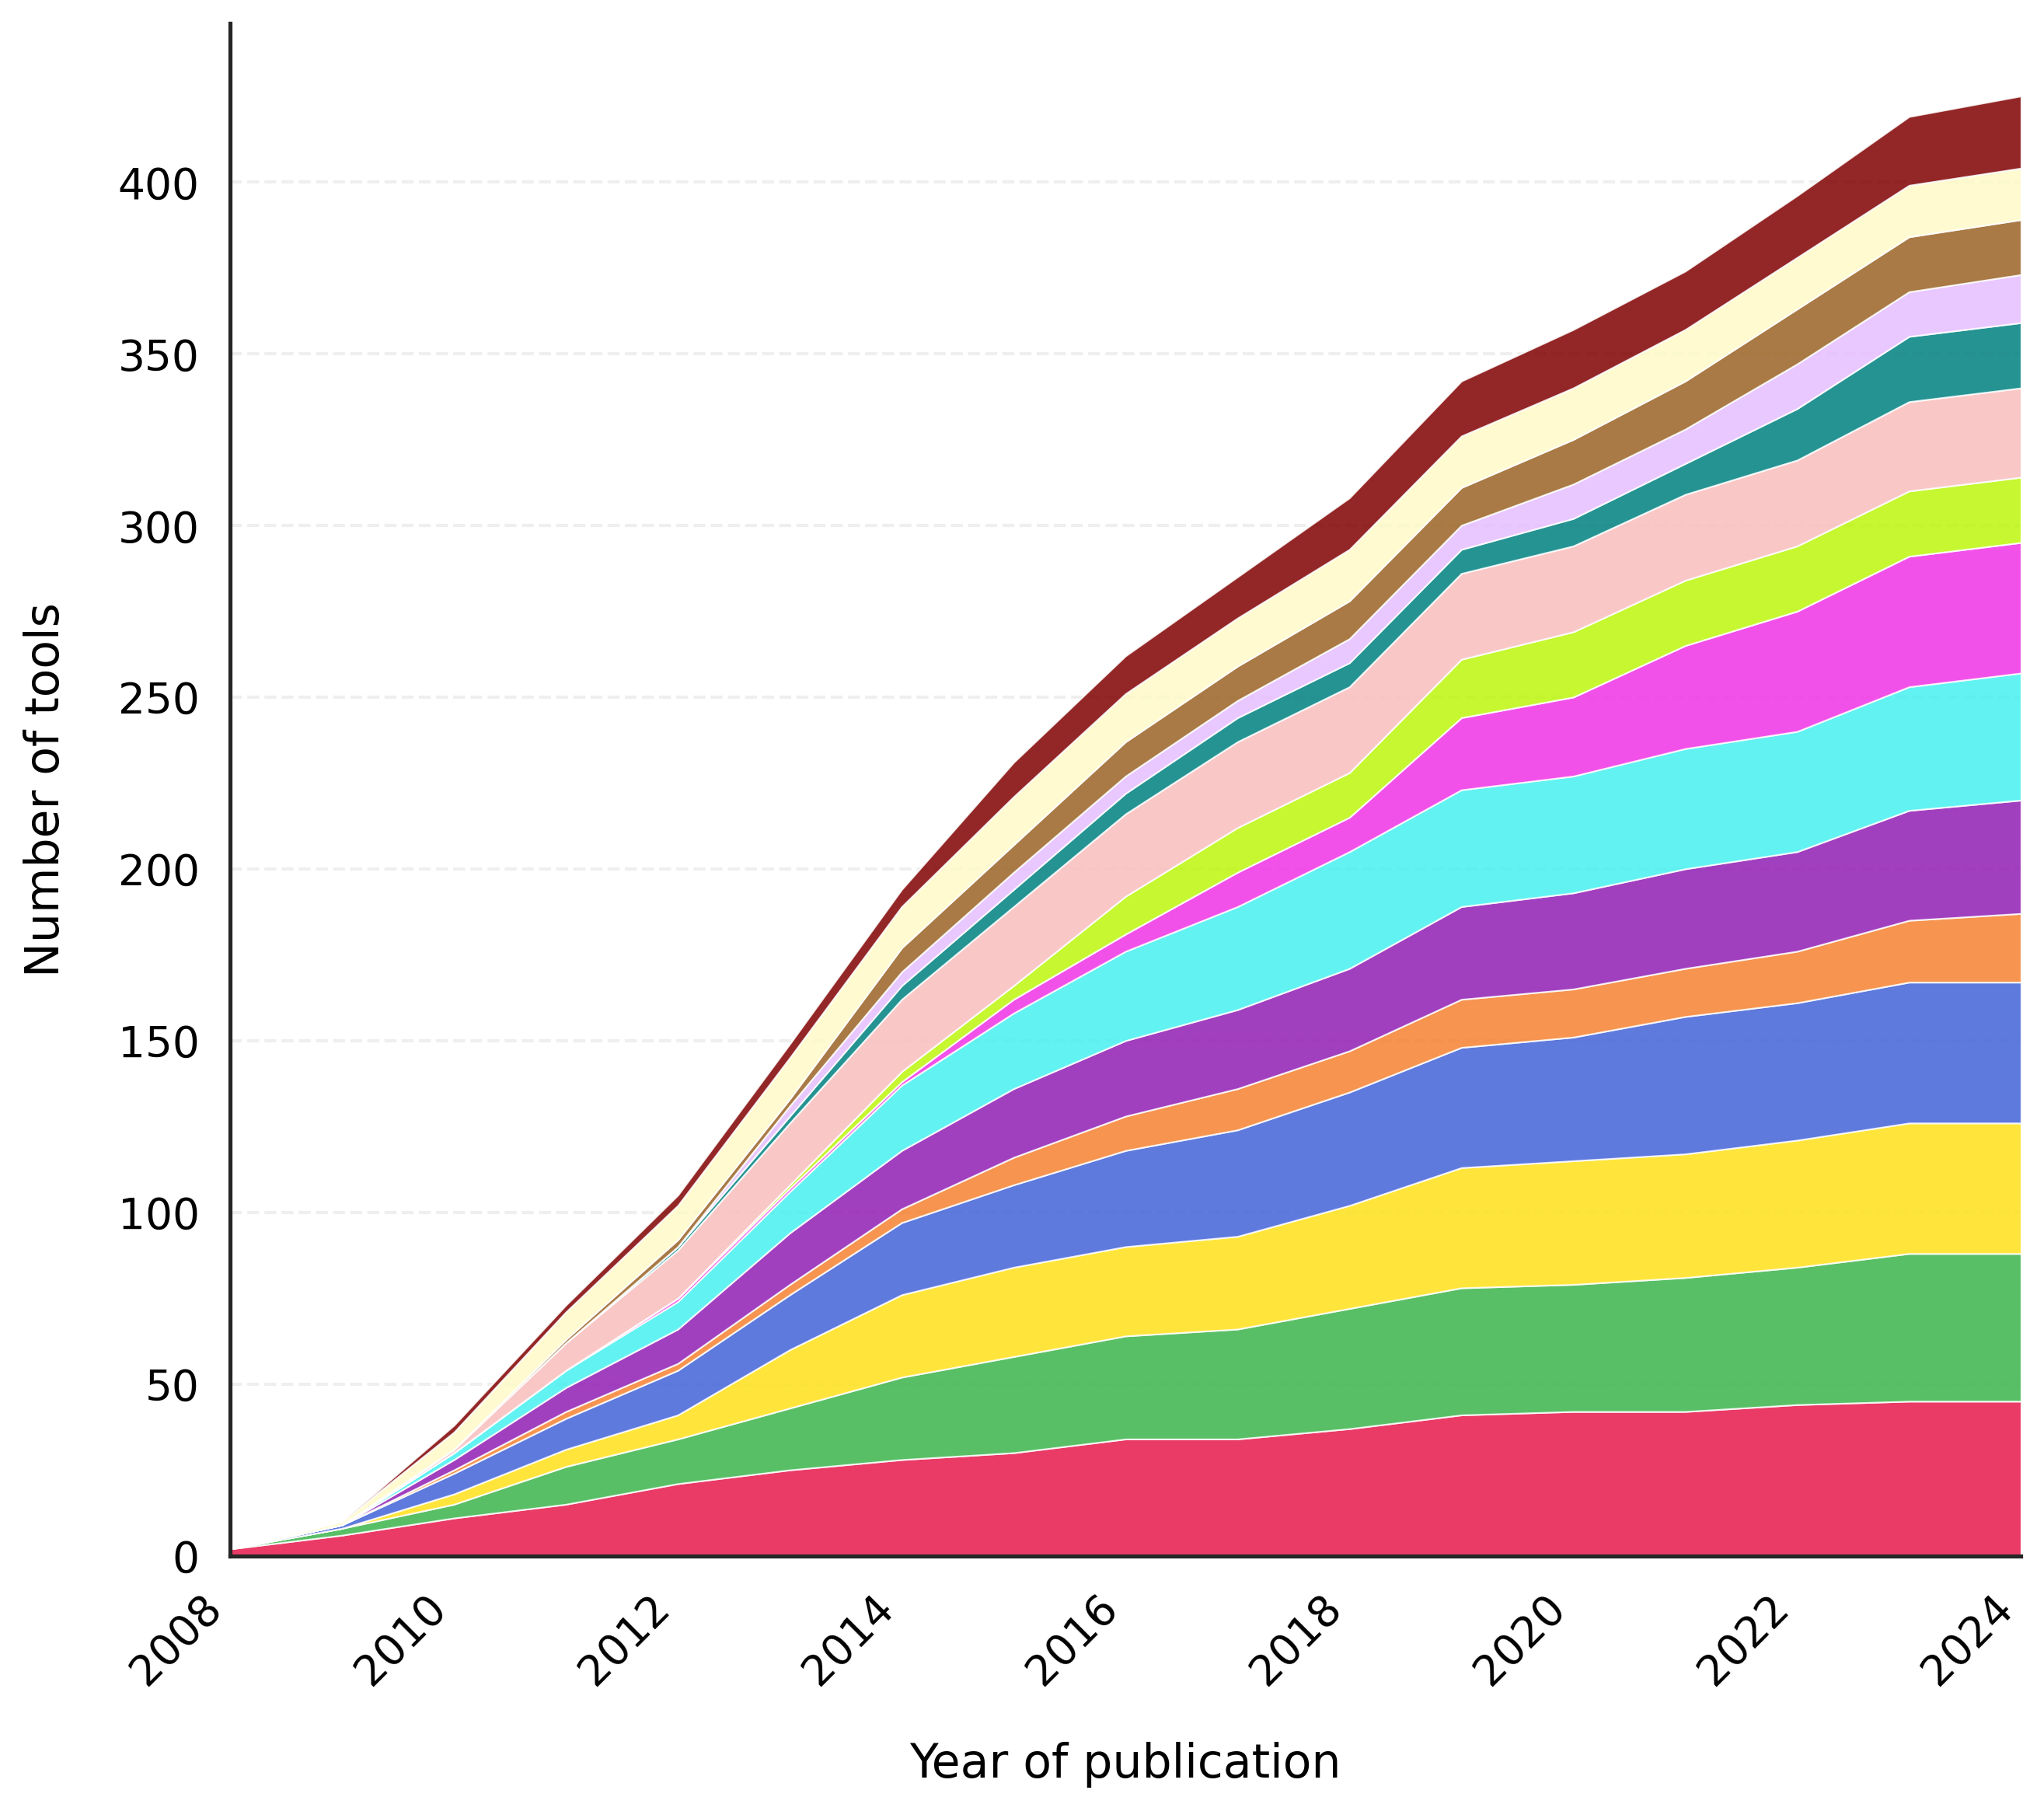

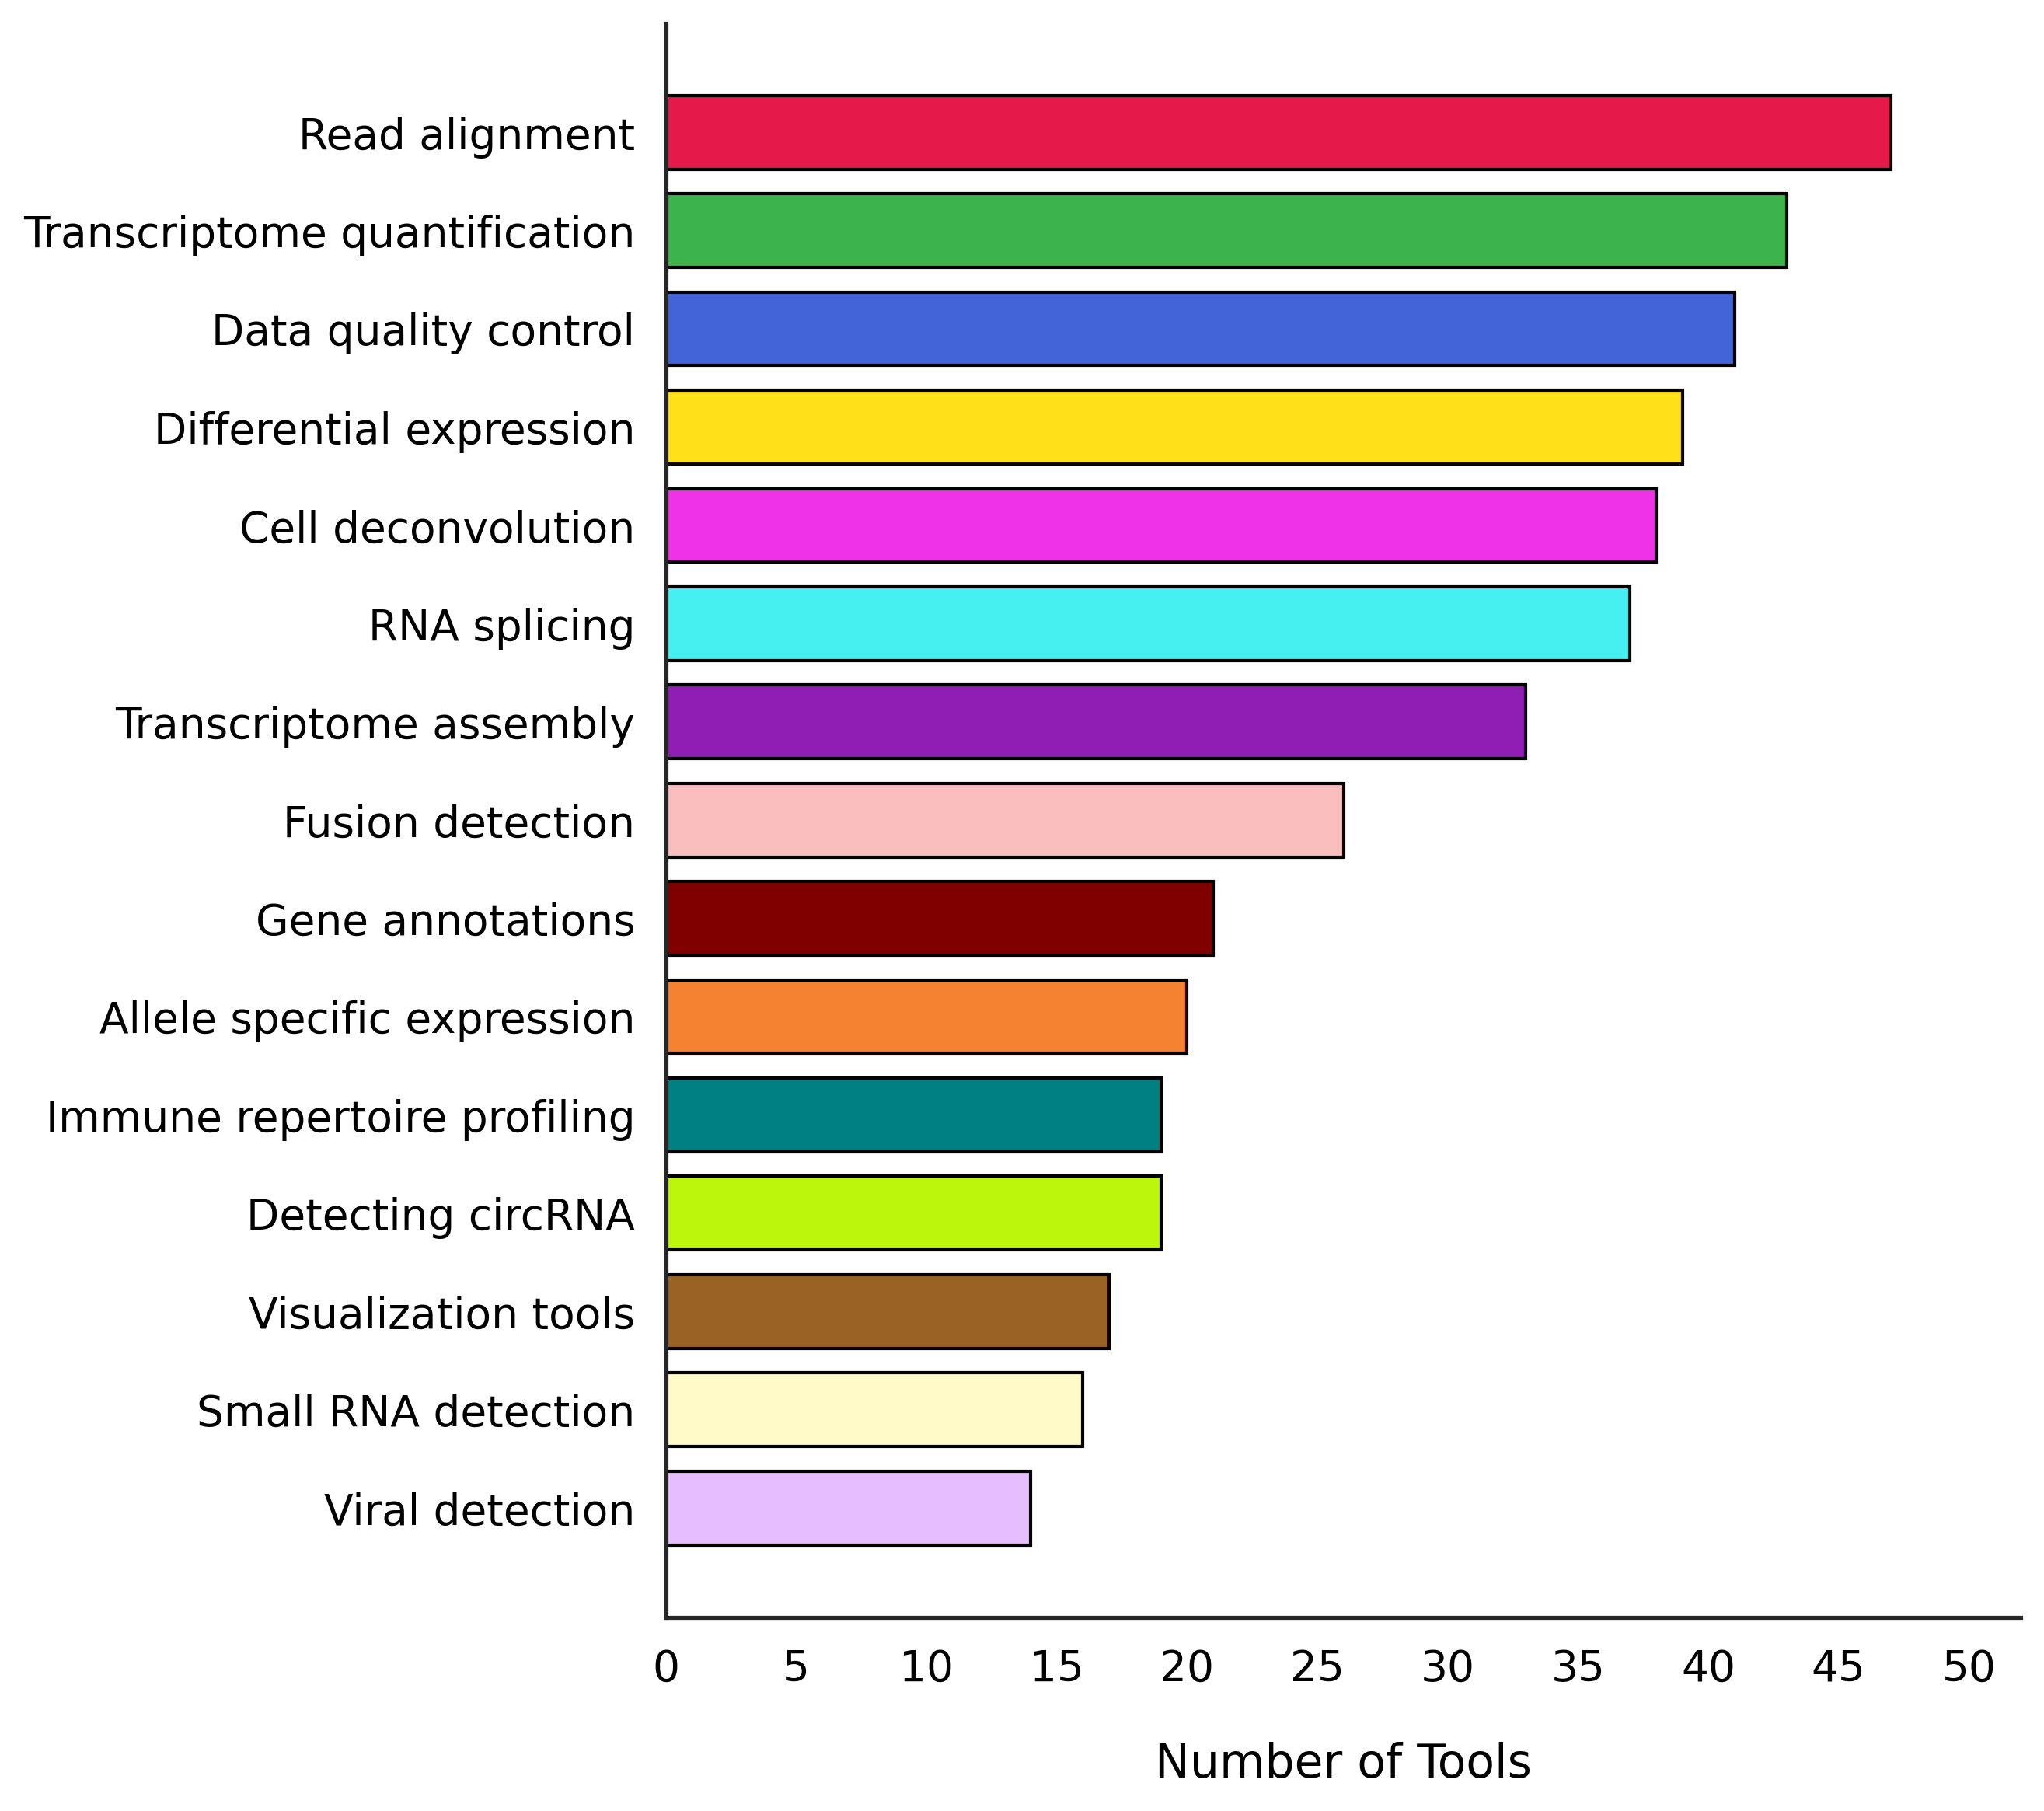

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Data Preparation ---
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
df = pd.read_csv(file_path)

custom_order = [
    'Read alignment', 'Transcriptome quantification', 'Differential expression',
    'Data quality control', 'Allele specific expression', 'Transcriptome assembly',
    'RNA splicing', 'Cell deconvolution', 'Detecting circRNA', 'Fusion detection',
    'Immune repertoire profiling', 'Viral detection', 'Visualization tools',
    'Small RNA detection', 'Gene annotations'
]
custom_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000'
]

# --------- STACKPLOT DATA ---------
df_clean = df[['Domain', 'Year Published']].dropna()
df_clean['Year Published'] = pd.to_numeric(df_clean['Year Published'], errors='coerce')
df_clean = df_clean.dropna()
df_clean = df_clean[df_clean['Domain'].isin(custom_order)]
start_year = 2008
end_year = int(df_clean['Year Published'].max())
domain_counts = df_clean.groupby(['Year Published', 'Domain']).size().unstack(fill_value=0)
full_years = np.arange(start_year, end_year + 1)
domain_counts = domain_counts.reindex(full_years, fill_value=0)
domain_counts = domain_counts.reindex(columns=custom_order, fill_value=0)
domain_counts_cumulative = domain_counts.cumsum()

# --------- BARPLOT DATA ---------
plot_data = df[['Domain', 'Year Published']].copy()
plot_data['Domain'] = plot_data['Domain'].str.replace(r'^[a-zA-Z]\.\s*', '', regex=True).str.strip()
domain_counts_bar = plot_data['Domain'].value_counts().reindex(custom_order).dropna().sort_values(ascending=True)
colors_bar = [custom_colors[custom_order.index(domain)] for domain in domain_counts_bar.index]

# ================== FIGURE 1: STACKPLOT (No Legend) ==================
plt.figure(figsize=FIG_SIZE, dpi=300)
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)

plt.stackplot(
    domain_counts_cumulative.index,
    domain_counts_cumulative.T,
    colors=custom_colors[:len(custom_order)],
    alpha=0.85,
    edgecolor='white',
    linewidth=0.5
)
plt.ylabel("Number of tools", labelpad=15, color='black')
plt.xlabel("Year of publication", labelpad=15, color='black')
x_ticks = np.arange(start_year, end_year + 1, 2)
plt.xticks(x_ticks, rotation=45, ha='right', color='black')
plt.xlim(start_year, end_year)
plt.tick_params(axis='y', colors='black')
plt.tick_params(axis='x', colors='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.tight_layout()

# --- No legend here ---
plt.show()

# ================== FIGURE 2: HORIZONTAL BARPLOT ==================
plt.figure(figsize=FIG_SIZE, dpi=300)
sns.set_style('white')
sns.set_context('notebook', font_scale=1.2)

bars = plt.barh(
    domain_counts_bar.index,
    domain_counts_bar.values,
    color=colors_bar,
    height=0.75,
    edgecolor='black',    # <-- Add this
    linewidth=1.0
)
plt.xlabel('Number of Tools', labelpad=16, color='black')
plt.ylabel('', labelpad=16, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
x_max = domain_counts_bar.max() + 5
xtick_locs = np.arange(0, x_max + 5, step=5)
plt.xticks(xtick_locs)
plt.xlim(0, x_max)

sns.despine(left=False, top=True, right=True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-17-2663566750.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


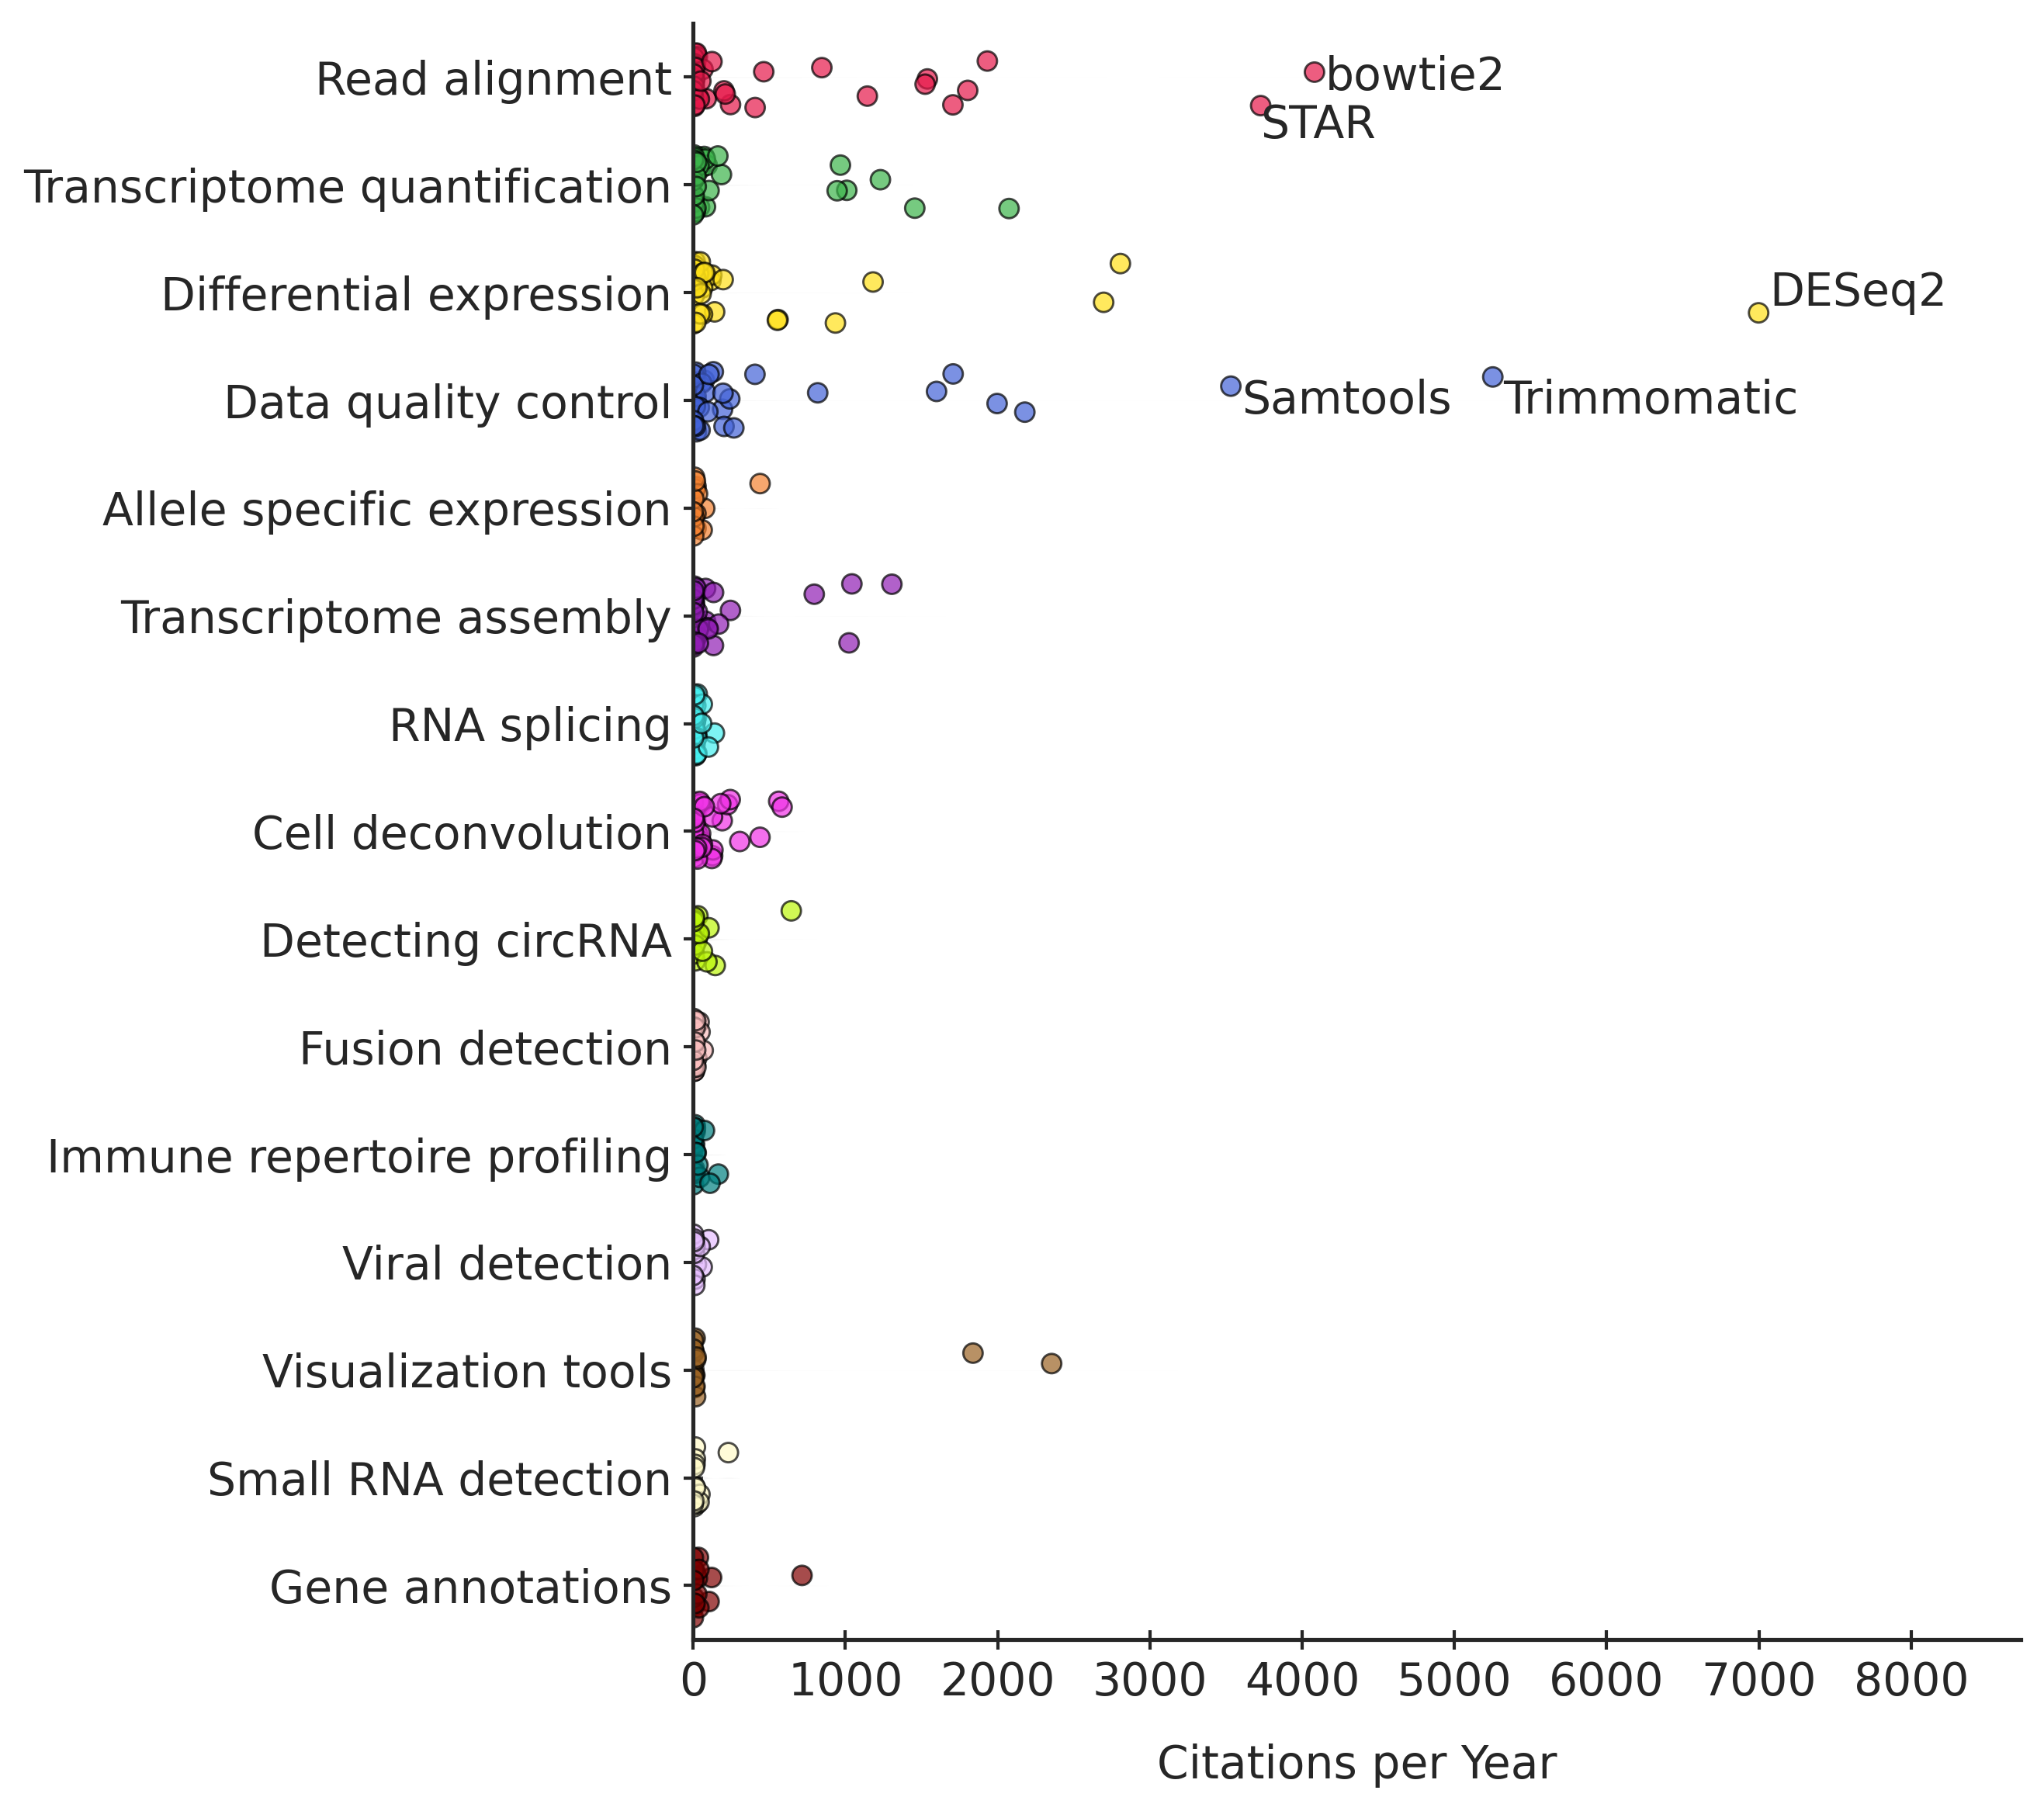

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ========== Standardized style parameters ==========
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# ========== Data loading ==========
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
data = pd.read_csv(file_path)

custom_order = [
    'Read alignment', 'Transcriptome quantification', 'Differential expression',
    'Data quality control', 'Allele specific expression', 'Transcriptome assembly',
    'RNA splicing', 'Cell deconvolution', 'Detecting circRNA', 'Fusion detection',
    'Immune repertoire profiling', 'Viral detection', 'Visualization tools',
    'Small RNA detection', 'Gene annotations'
]
custom_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000'
]

# ========== Data filtering ==========
data = data[data['Domain'].isin(custom_order)]

# ========== Create figure ==========
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)

# Violin plot
sns.violinplot(
    x='Citations per year',
    y='Domain',
    data=data,
    order=custom_order,
    inner=None,
    linewidth=0,
    color='lightgray',
    width=0.3,
    alpha=0.2,
    ax=ax
)

# Strip plot
sns.stripplot(
    x='Citations per year',
    y='Domain',
    data=data,
    order=custom_order,
    palette=custom_colors,
    size=6,
    jitter=0.3,
    edgecolor='black',
    linewidth=0.7,
    alpha=0.7,
    zorder=1,
    ax=ax
)

# Labels
ax.set_xlabel('Citations per Year', fontsize=LABEL_FONT_SIZE, labelpad=12)
ax.set_ylabel('', fontsize=LABEL_FONT_SIZE, labelpad=12)  # No y-label per your new style

# Ticks
ax.tick_params(
    axis='x', labelsize=TICK_FONT_SIZE, direction='inout', length=6, width=1.0,
    bottom=True, top=False
)
ax.tick_params(
    axis='y', labelsize=TICK_FONT_SIZE, direction='inout', length=6, width=1.0,
    left=True, right=False
)

# Axis starts at 0
ax.set_xlim(left=0)

# Spines
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Annotations
y_pos = {domain: idx for idx, domain in enumerate(custom_order)}
offset = data['Citations per year'].max() * 0.01

# STAR above, Bowtie2 below
for _, row in data[data['Tool names'].isin(['STAR', 'Bowtie2'])].iterrows():
    vertical_offset = 0.45 if row['Tool names'] == 'STAR' else -0.65
    ax.text(
        row['Citations per year'],
        y_pos[row['Domain']] + vertical_offset,
        row['Tool names'],
        va='center',
        ha='left',
        fontsize=LABEL_FONT_SIZE
    )

# Other >3000 tools
high_data = data[(data['Citations per year'] > 3000) & ~data['Tool names'].isin(['STAR', 'Bowtie2'])]
for _, row in high_data.iterrows():
    ax.text(
        row['Citations per year'] + offset,
        y_pos[row['Domain']],
        row['Tool names'],
        va='center',
        fontsize=LABEL_FONT_SIZE
    )

plt.tight_layout()
plt.show()


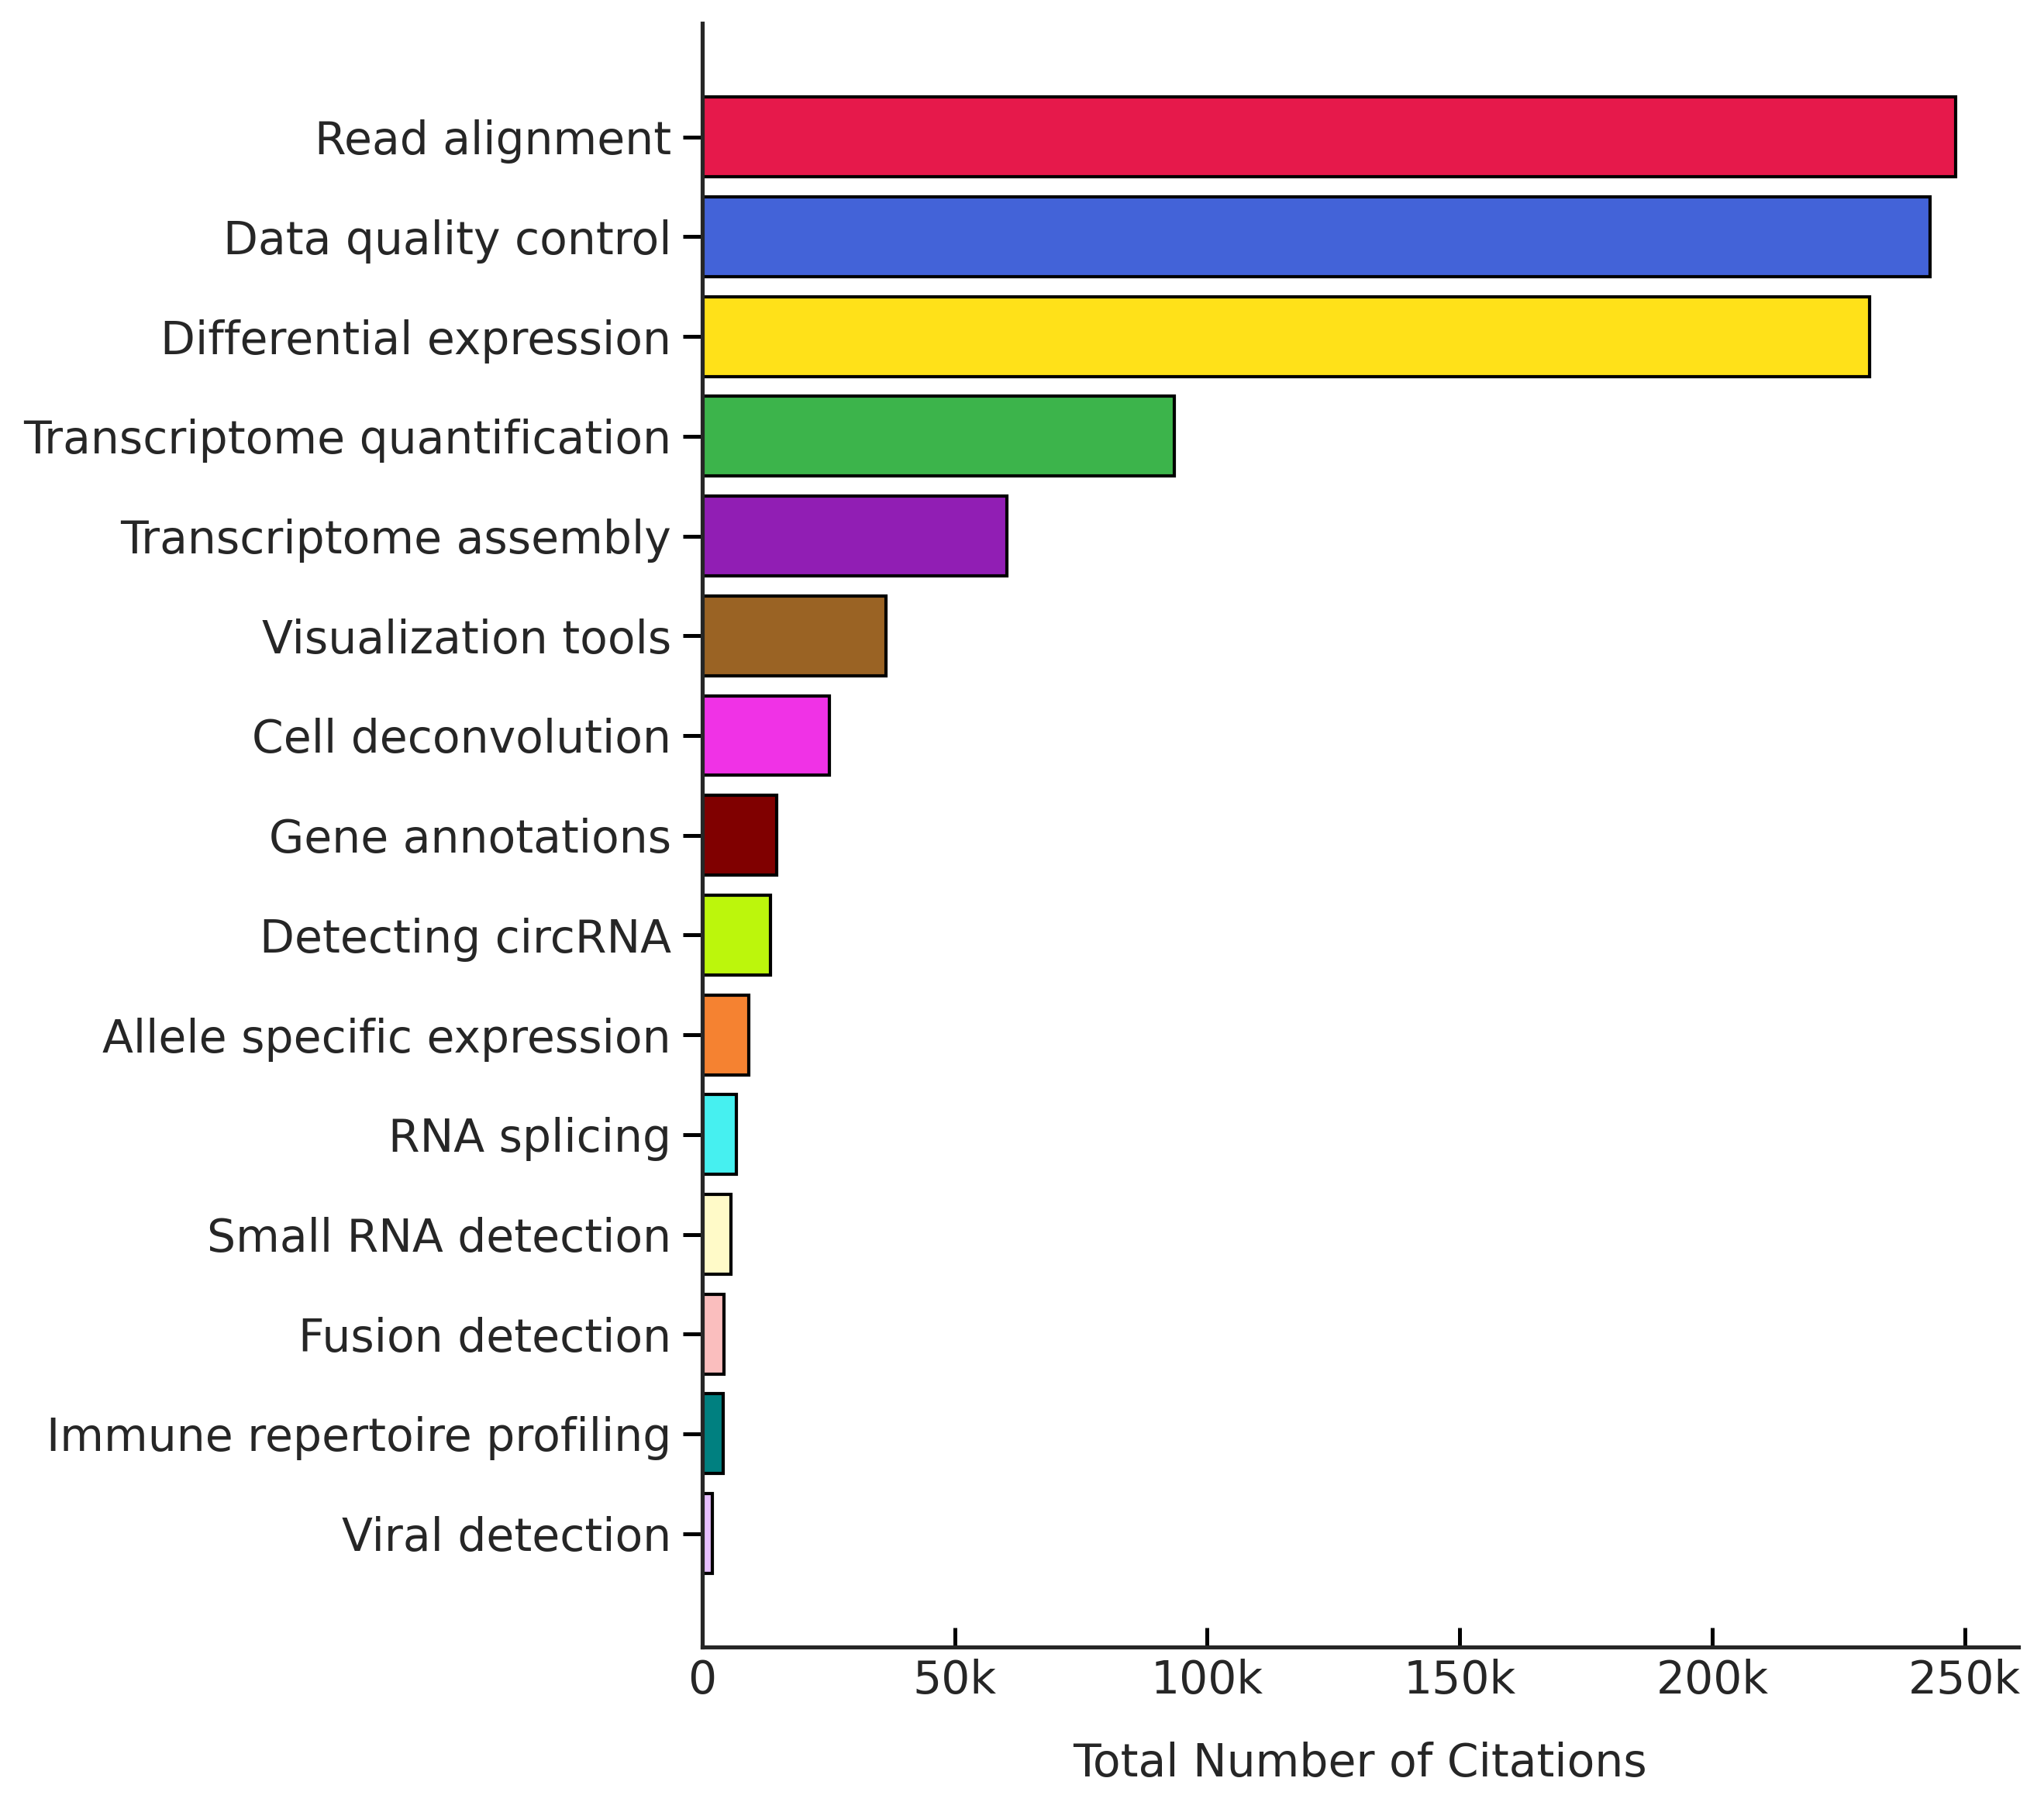

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ---- STANDARDIZED STYLE ----
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Color & Domain Order ---
custom_order = [
    'Read alignment', 'Transcriptome quantification', 'Differential expression',
    'Data quality control', 'Allele specific expression', 'Transcriptome assembly',
    'RNA splicing', 'Cell deconvolution', 'Detecting circRNA', 'Fusion detection',
    'Immune repertoire profiling', 'Viral detection', 'Visualization tools',
    'Small RNA detection', 'Gene annotations'
]
custom_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000'
]

# --- Data Preparation ---
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Domain'] = df['Domain'].astype(str).str.strip()
cit_col = 'Number of citations'

df[cit_col] = pd.to_numeric(df[cit_col], errors='coerce')
df = df.dropna(subset=[cit_col])

# Calculate total citations per domain
domain_cit = df.groupby('Domain')[cit_col].sum()
domain_cit = domain_cit.reindex(custom_order).dropna()

# Sort in descending order
domain_cit = domain_cit.sort_values(ascending=False)
colors_bar = [custom_colors[custom_order.index(domain)] for domain in domain_cit.index]

# --- Plot ---
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
bars = ax.barh(domain_cit.index, domain_cit.values,
               color=colors_bar, edgecolor='black', linewidth=1.0)

ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.grid(False)

# Labels
ax.set_xlabel('Total Number of Citations', fontsize=LABEL_FONT_SIZE, labelpad=12)
ax.set_ylabel('', fontsize=LABEL_FONT_SIZE, labelpad=12)  # No y-label by default

# Ticks
ax.tick_params(axis='x', labelsize=TICK_FONT_SIZE, direction='in', length=6, width=1.2, color='black', bottom=True, top=False)
ax.tick_params(axis='y', labelsize=TICK_FONT_SIZE, direction='out', length=6, width=1.2, color='black', left=True, right=False)

# Formatter for x-axis
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else f'{int(x)}'))

plt.tight_layout()
plt.show()


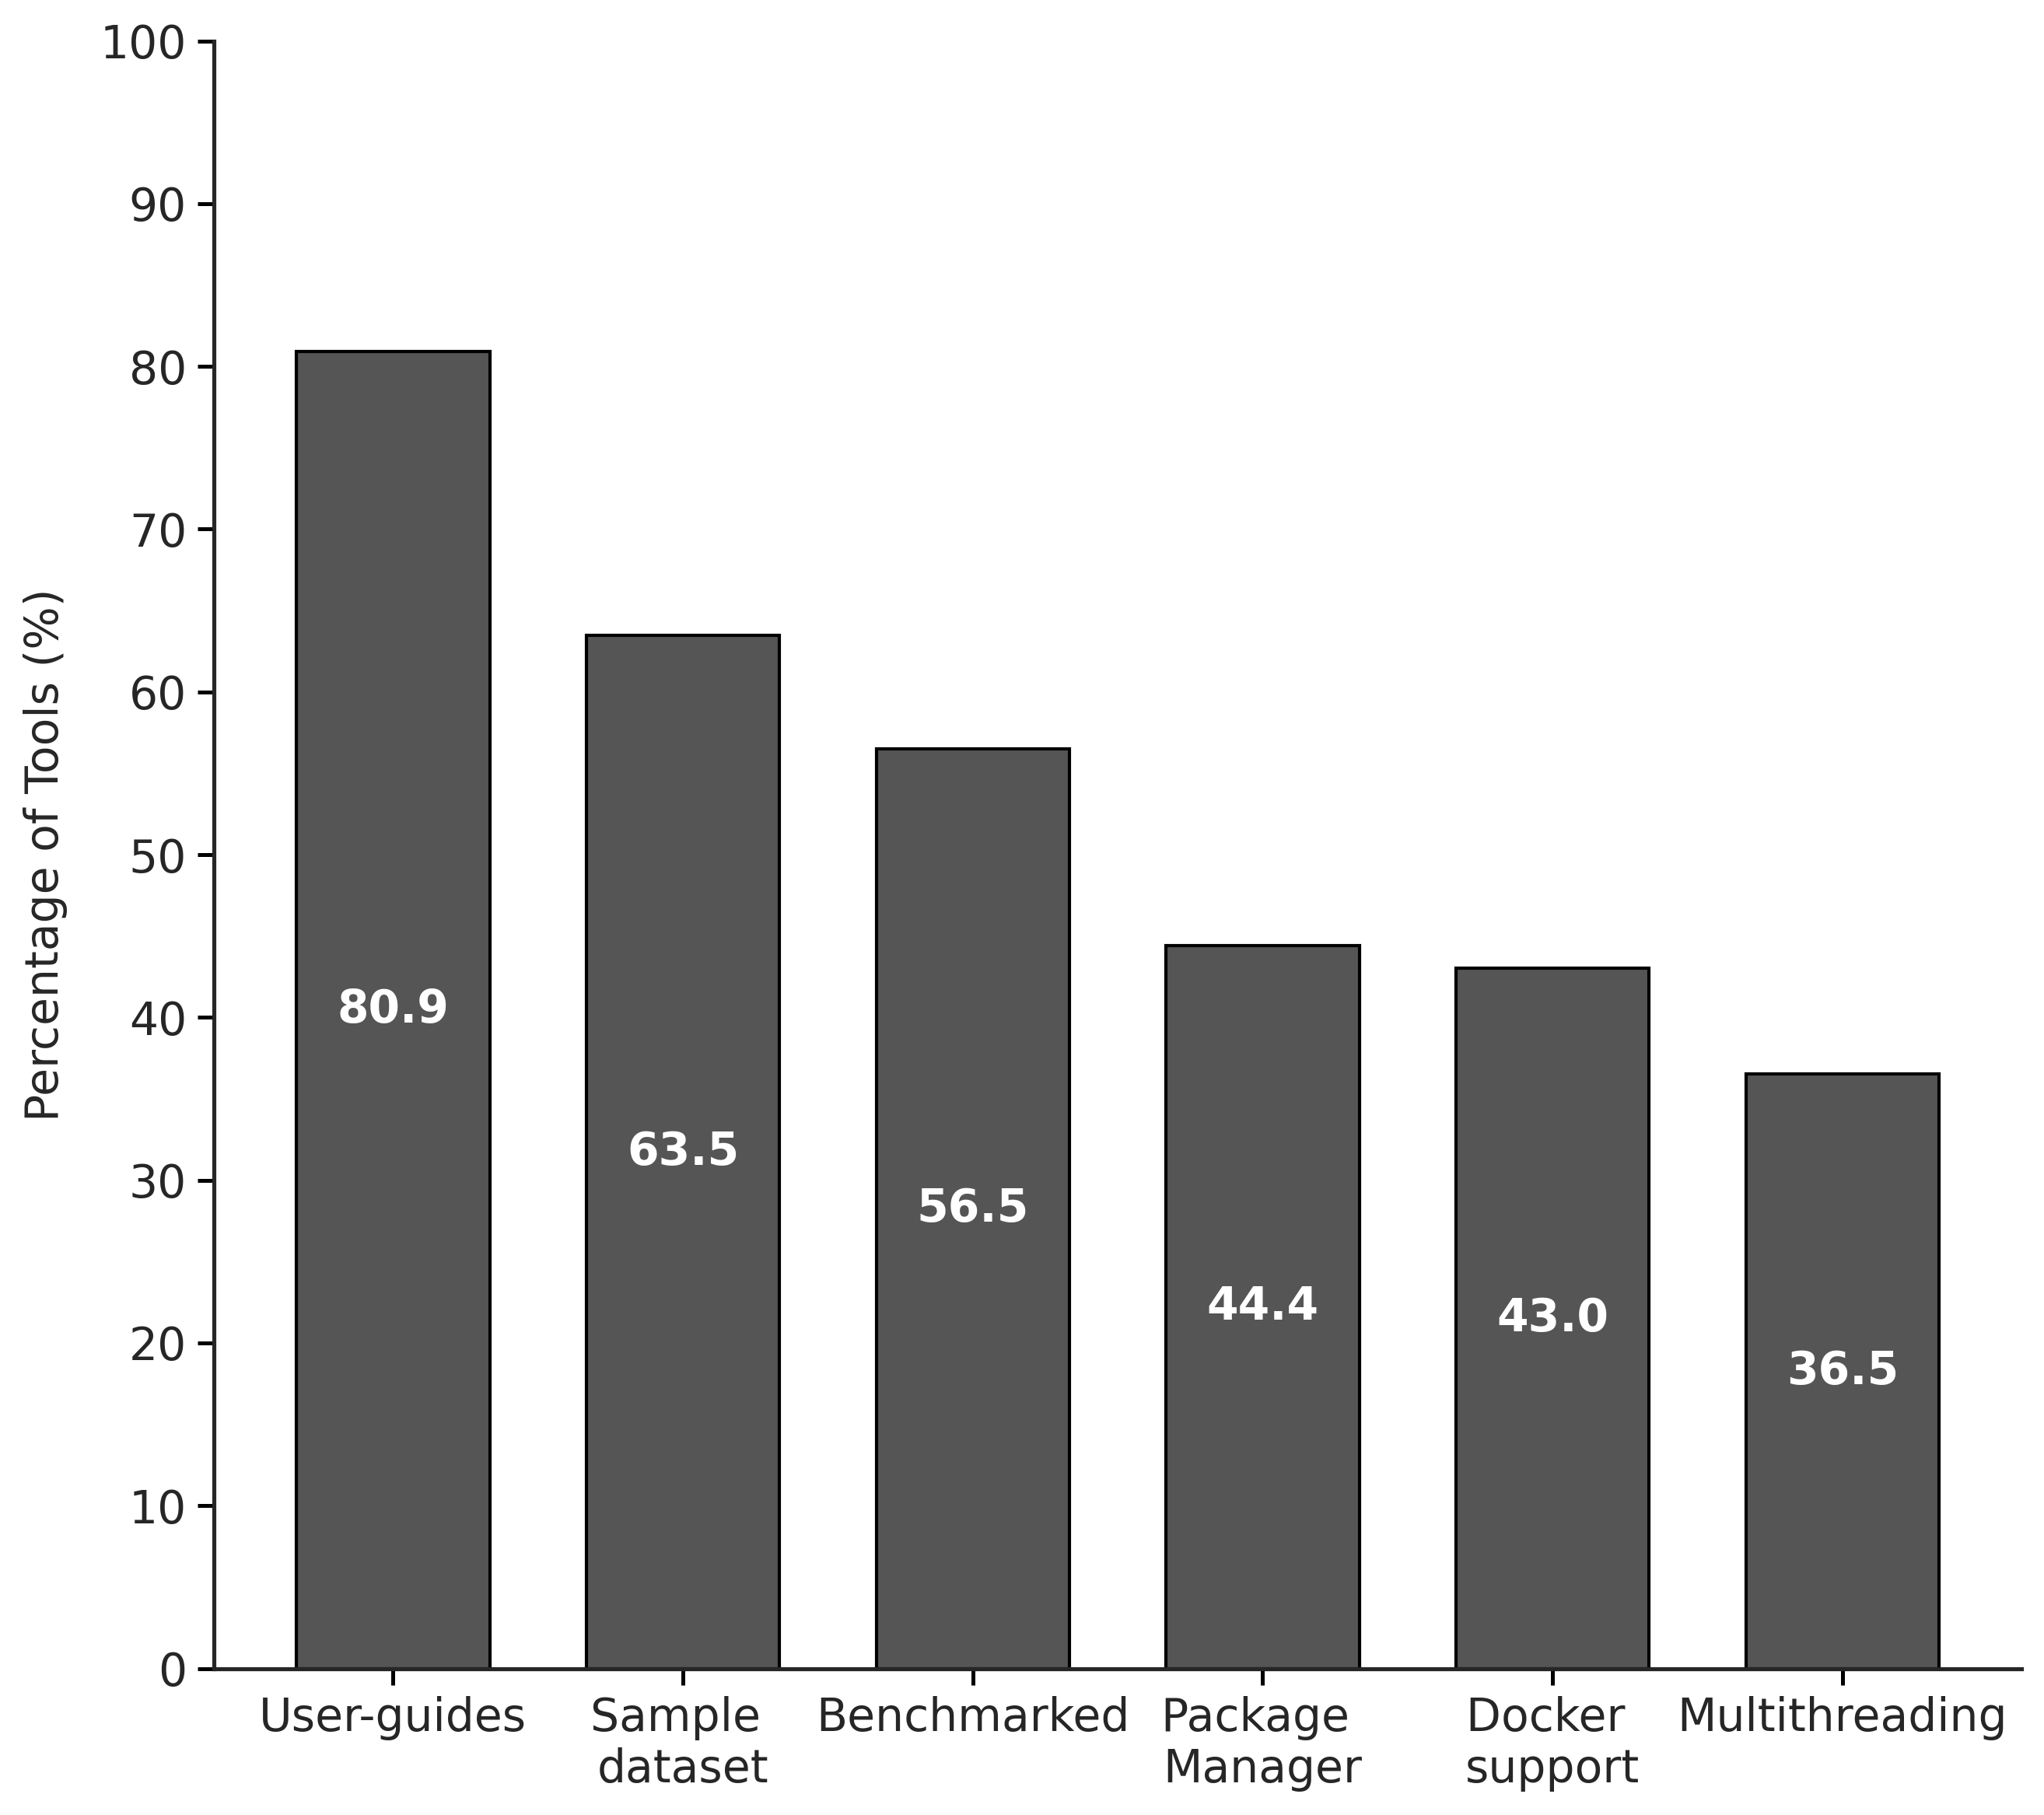

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- STANDARDIZED STYLE ----
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# Load the dataset
file_path = '/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv'
df = pd.read_csv(file_path)

# Columns to analyze (add Docker and Thread availability)
columns = [
    'Has_Documentation',
    'Has_Package_Manager',
    'Has_Toy_Examples',
    'Comparison to other tools in the original publication - only note whether benchmarked or not.',
    'Docker support',
    'Thread availability'
]
pretty_labels = [
    'User-guides',
    'Package \nManager',
    'Sample \ndataset',
    'Benchmarked',
    'Docker \nsupport',
    'Multithreading'
]

# Format all columns as uppercase "Y"/"N"
df[columns] = df[columns].apply(lambda col: col.str.strip().str.upper())
total_tools = len(df)
percents_yes = [(df[col] == 'Y').sum() / total_tools * 100 for col in columns]

# Sort by percentage (descending)
sorted_data = sorted(zip(pretty_labels, percents_yes), key=lambda x: x[1], reverse=True)
sorted_labels, sorted_percents = zip(*sorted_data)

available_color = '#555555'
edge_color = 'black'
bar_width = 0.2
spacing_factor = 0.3
x = [i * spacing_factor for i in range(len(sorted_labels))]

fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
bars_yes = ax.bar(x, sorted_percents, color=available_color,
                  edgecolor=edge_color, linewidth=1, width=bar_width)

for bar in bars_yes:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}',
                ha='center', va='center',
                fontsize=LABEL_FONT_SIZE, color='white', fontweight='bold')

ax.set_ylabel('Percentage of Tools (%)', fontsize=LABEL_FONT_SIZE, labelpad=10)
ax.set_xlabel('', fontsize=LABEL_FONT_SIZE)
ax.set_xticks(x)
ax.set_xticklabels(sorted_labels, rotation=0, ha='center', fontsize=LABEL_FONT_SIZE)
ax.set_ylim(0, 100)

ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels([str(i) for i in range(0, 101, 10)], fontsize=LABEL_FONT_SIZE)

ax.xaxis.set_ticks(x, minor=False)
ax.yaxis.set_ticks(range(0, 101, 10), minor=False)

ax.tick_params(axis='y', which='major', direction='out', length=5, width=1.2, color='black',
               labelsize=LABEL_FONT_SIZE, left=True, right=False)
ax.tick_params(axis='x', which='major', direction='out', length=5, width=1.2, color='black',
               labelsize=LABEL_FONT_SIZE, bottom=True, top=False)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()


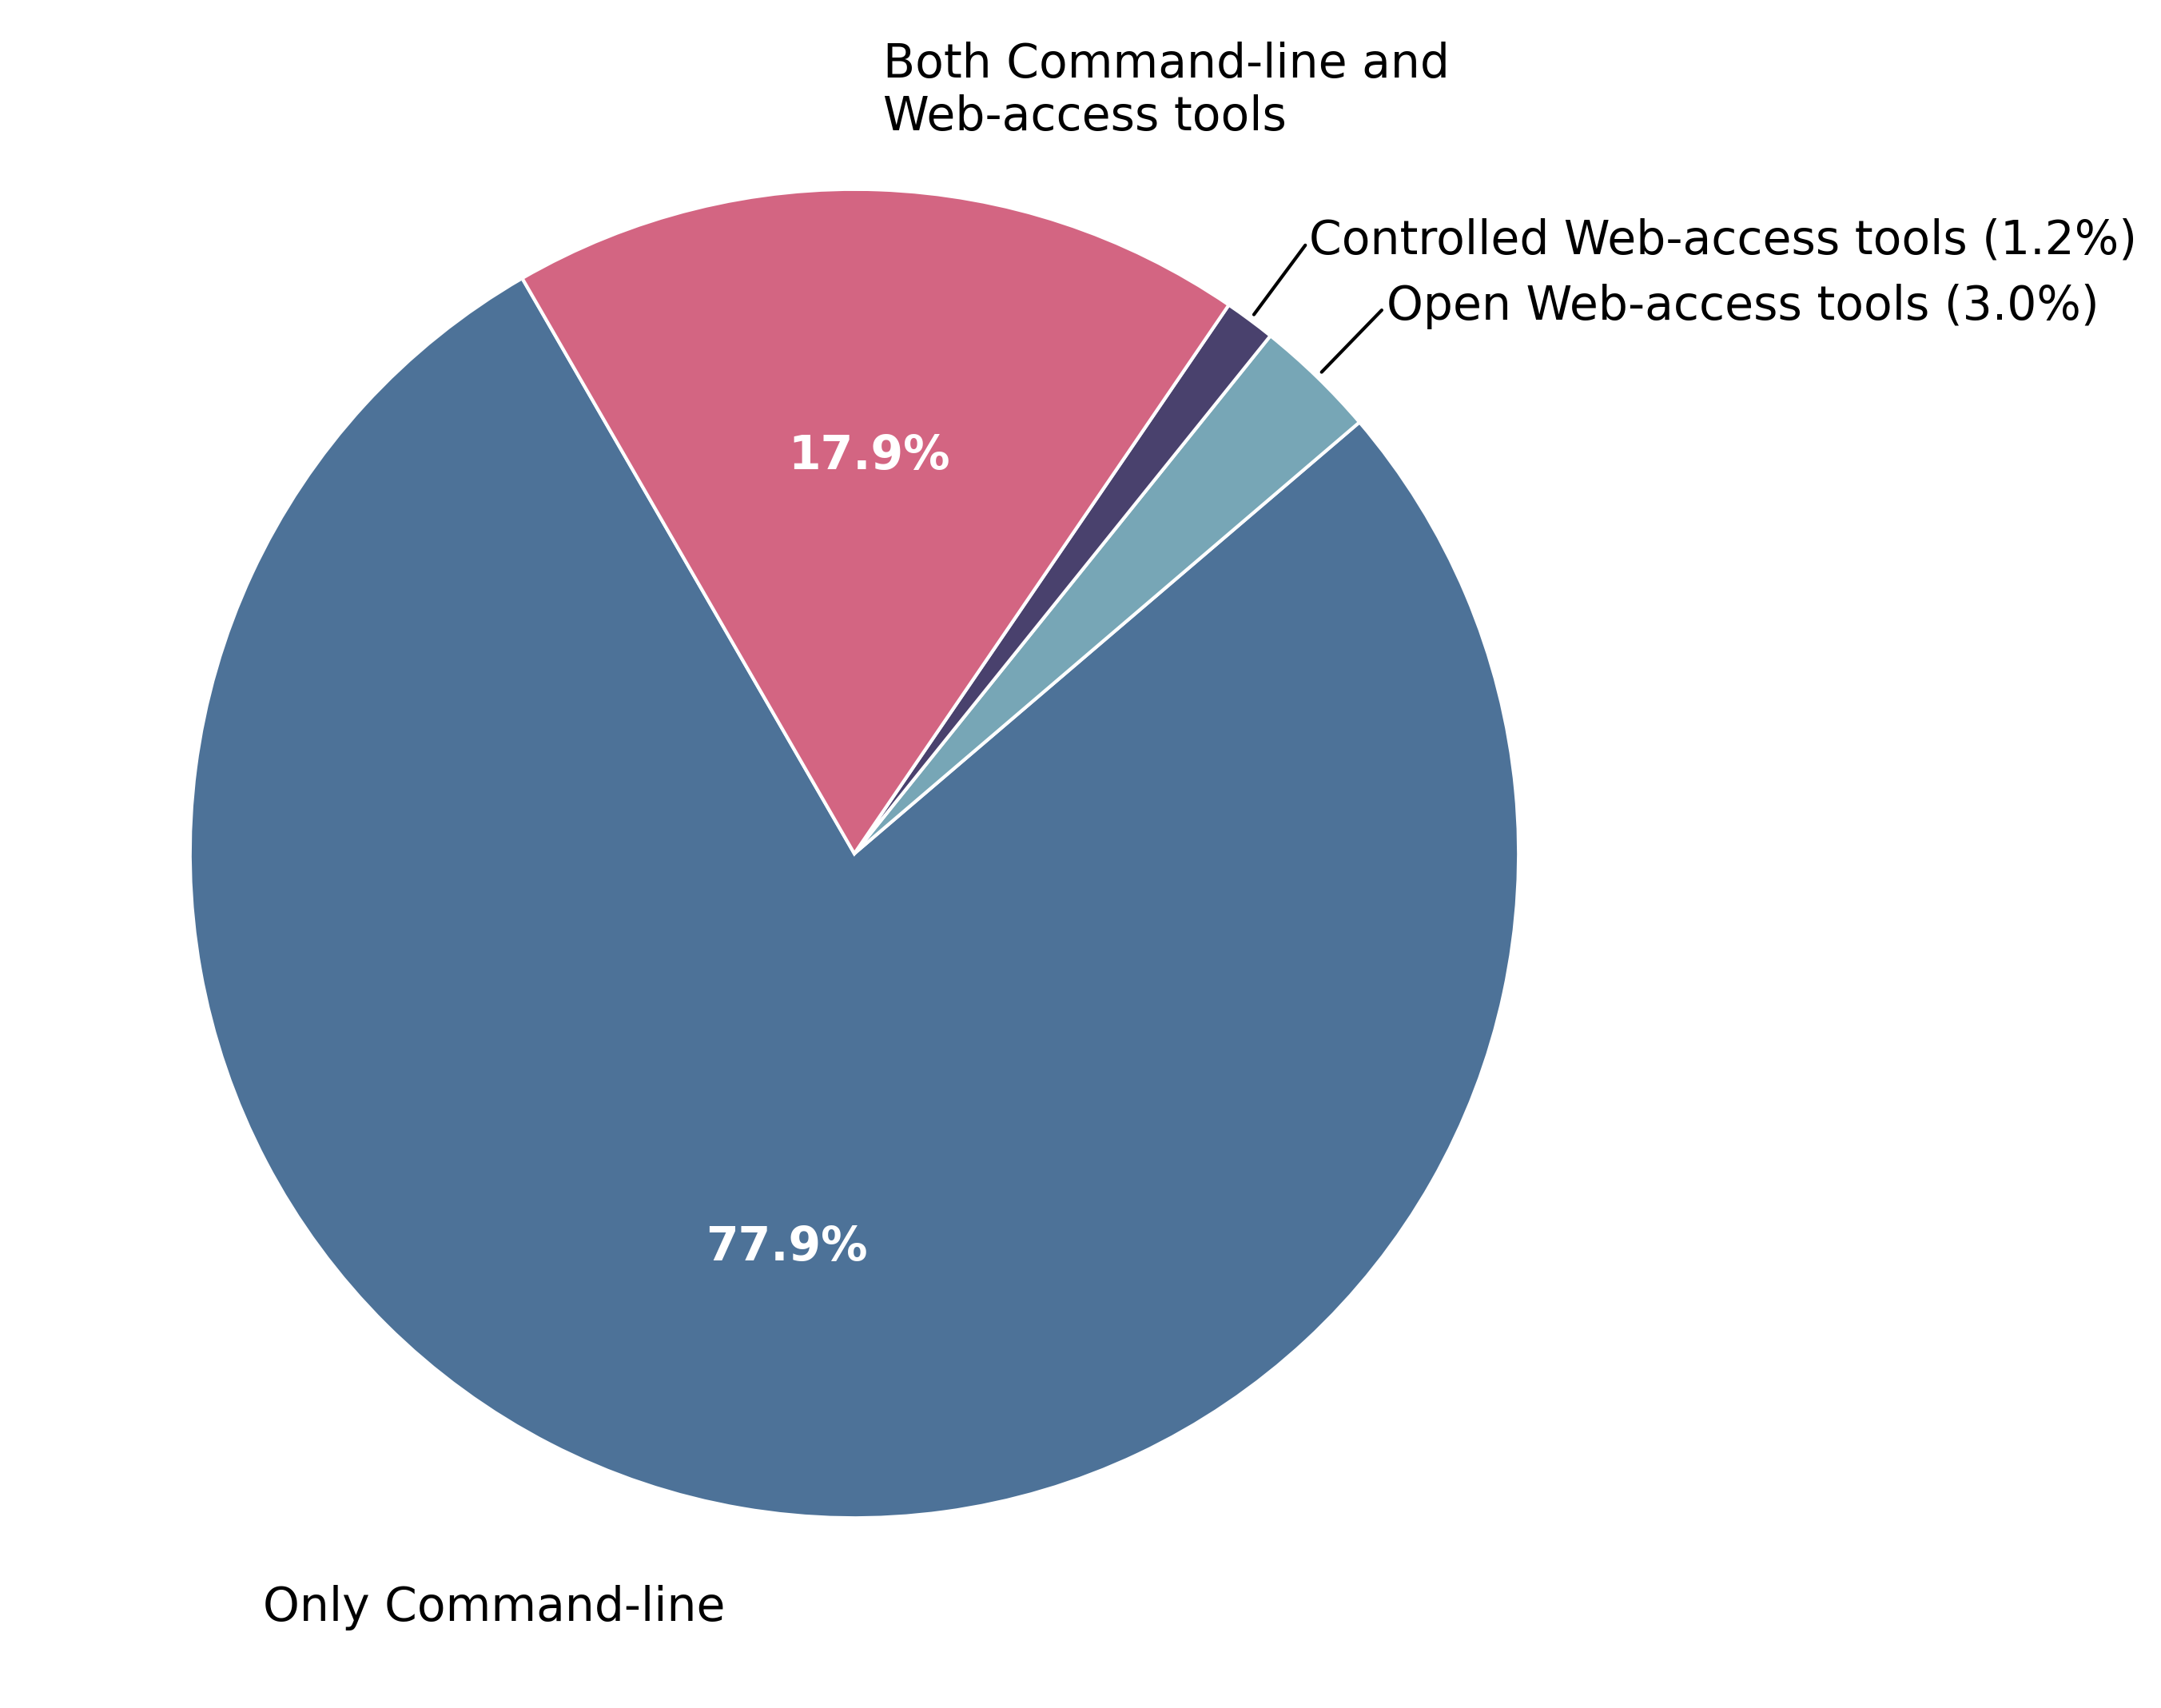

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Standardized Style ---
LABEL_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': LABEL_FONT_SIZE,
    'ytick.labelsize': LABEL_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Data ---
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

def to_bin(val):
    return 1 if str(val).strip().upper() == 'Y' else 0

data['Command-line'] = data['Command-line'].apply(to_bin)
data['Web-based'] = data['Web-based'].apply(to_bin)
data['Controlled access'] = data['Controlled access (for web-based): does it require login or sign up or payment?'].apply(to_bin)

only_cmd = ((data['Command-line'] == 1) & (data['Web-based'] == 0)).sum()
only_web_open = ((data['Command-line'] == 0) & (data['Web-based'] == 1) & (data['Controlled access'] == 0)).sum()
controlled_web = ((data['Command-line'] == 0) & (data['Web-based'] == 1) & (data['Controlled access'] == 1)).sum()
both = ((data['Command-line'] == 1) & (data['Web-based'] == 1)).sum()

sizes = [only_cmd, only_web_open, controlled_web, both]
total = sum(sizes)
percents = [100 * s / total for s in sizes]

# For controlled and open web, add % to label; for others, use plain label
labels = [
    'Only Command-line',
    f'Open Web-access tools ({percents[1]:.1f}%)',
    f'Controlled Web-access tools ({percents[2]:.1f}%)',
    'Both Command-line and \nWeb-access tools'
]
colors = ['#4D7298', '#77A6B6', '#49416D', '#D36582']

fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
wedges, texts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=120,
    textprops={'fontsize': LABEL_FONT_SIZE, 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    labeldistance=1.15
)

# Add white percent text INSIDE each wedge if >= 5%
for i, p in enumerate(wedges):
    if percents[i] >= 5:
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang)) * 0.6
        x = np.cos(np.deg2rad(ang)) * 0.6
        percent_text = f"{percents[i]:.1f}%"
        ax.text(
            x, y, percent_text,
            ha='center', va='center',
            fontsize=LABEL_FONT_SIZE,
            color='white',
            fontweight='bold'
        )

# Only add leader lines for Open Web-access and Controlled Web-access
for idx in [1, 2]:
    p = wedges[idx]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(
        '',
        xy=(x, y),
        xytext=(1.15 * x, 1.15 * y),
        arrowprops=dict(arrowstyle="-", color='black', connectionstyle=connectionstyle),
        size=LABEL_FONT_SIZE
    )

plt.tight_layout()
plt.show()


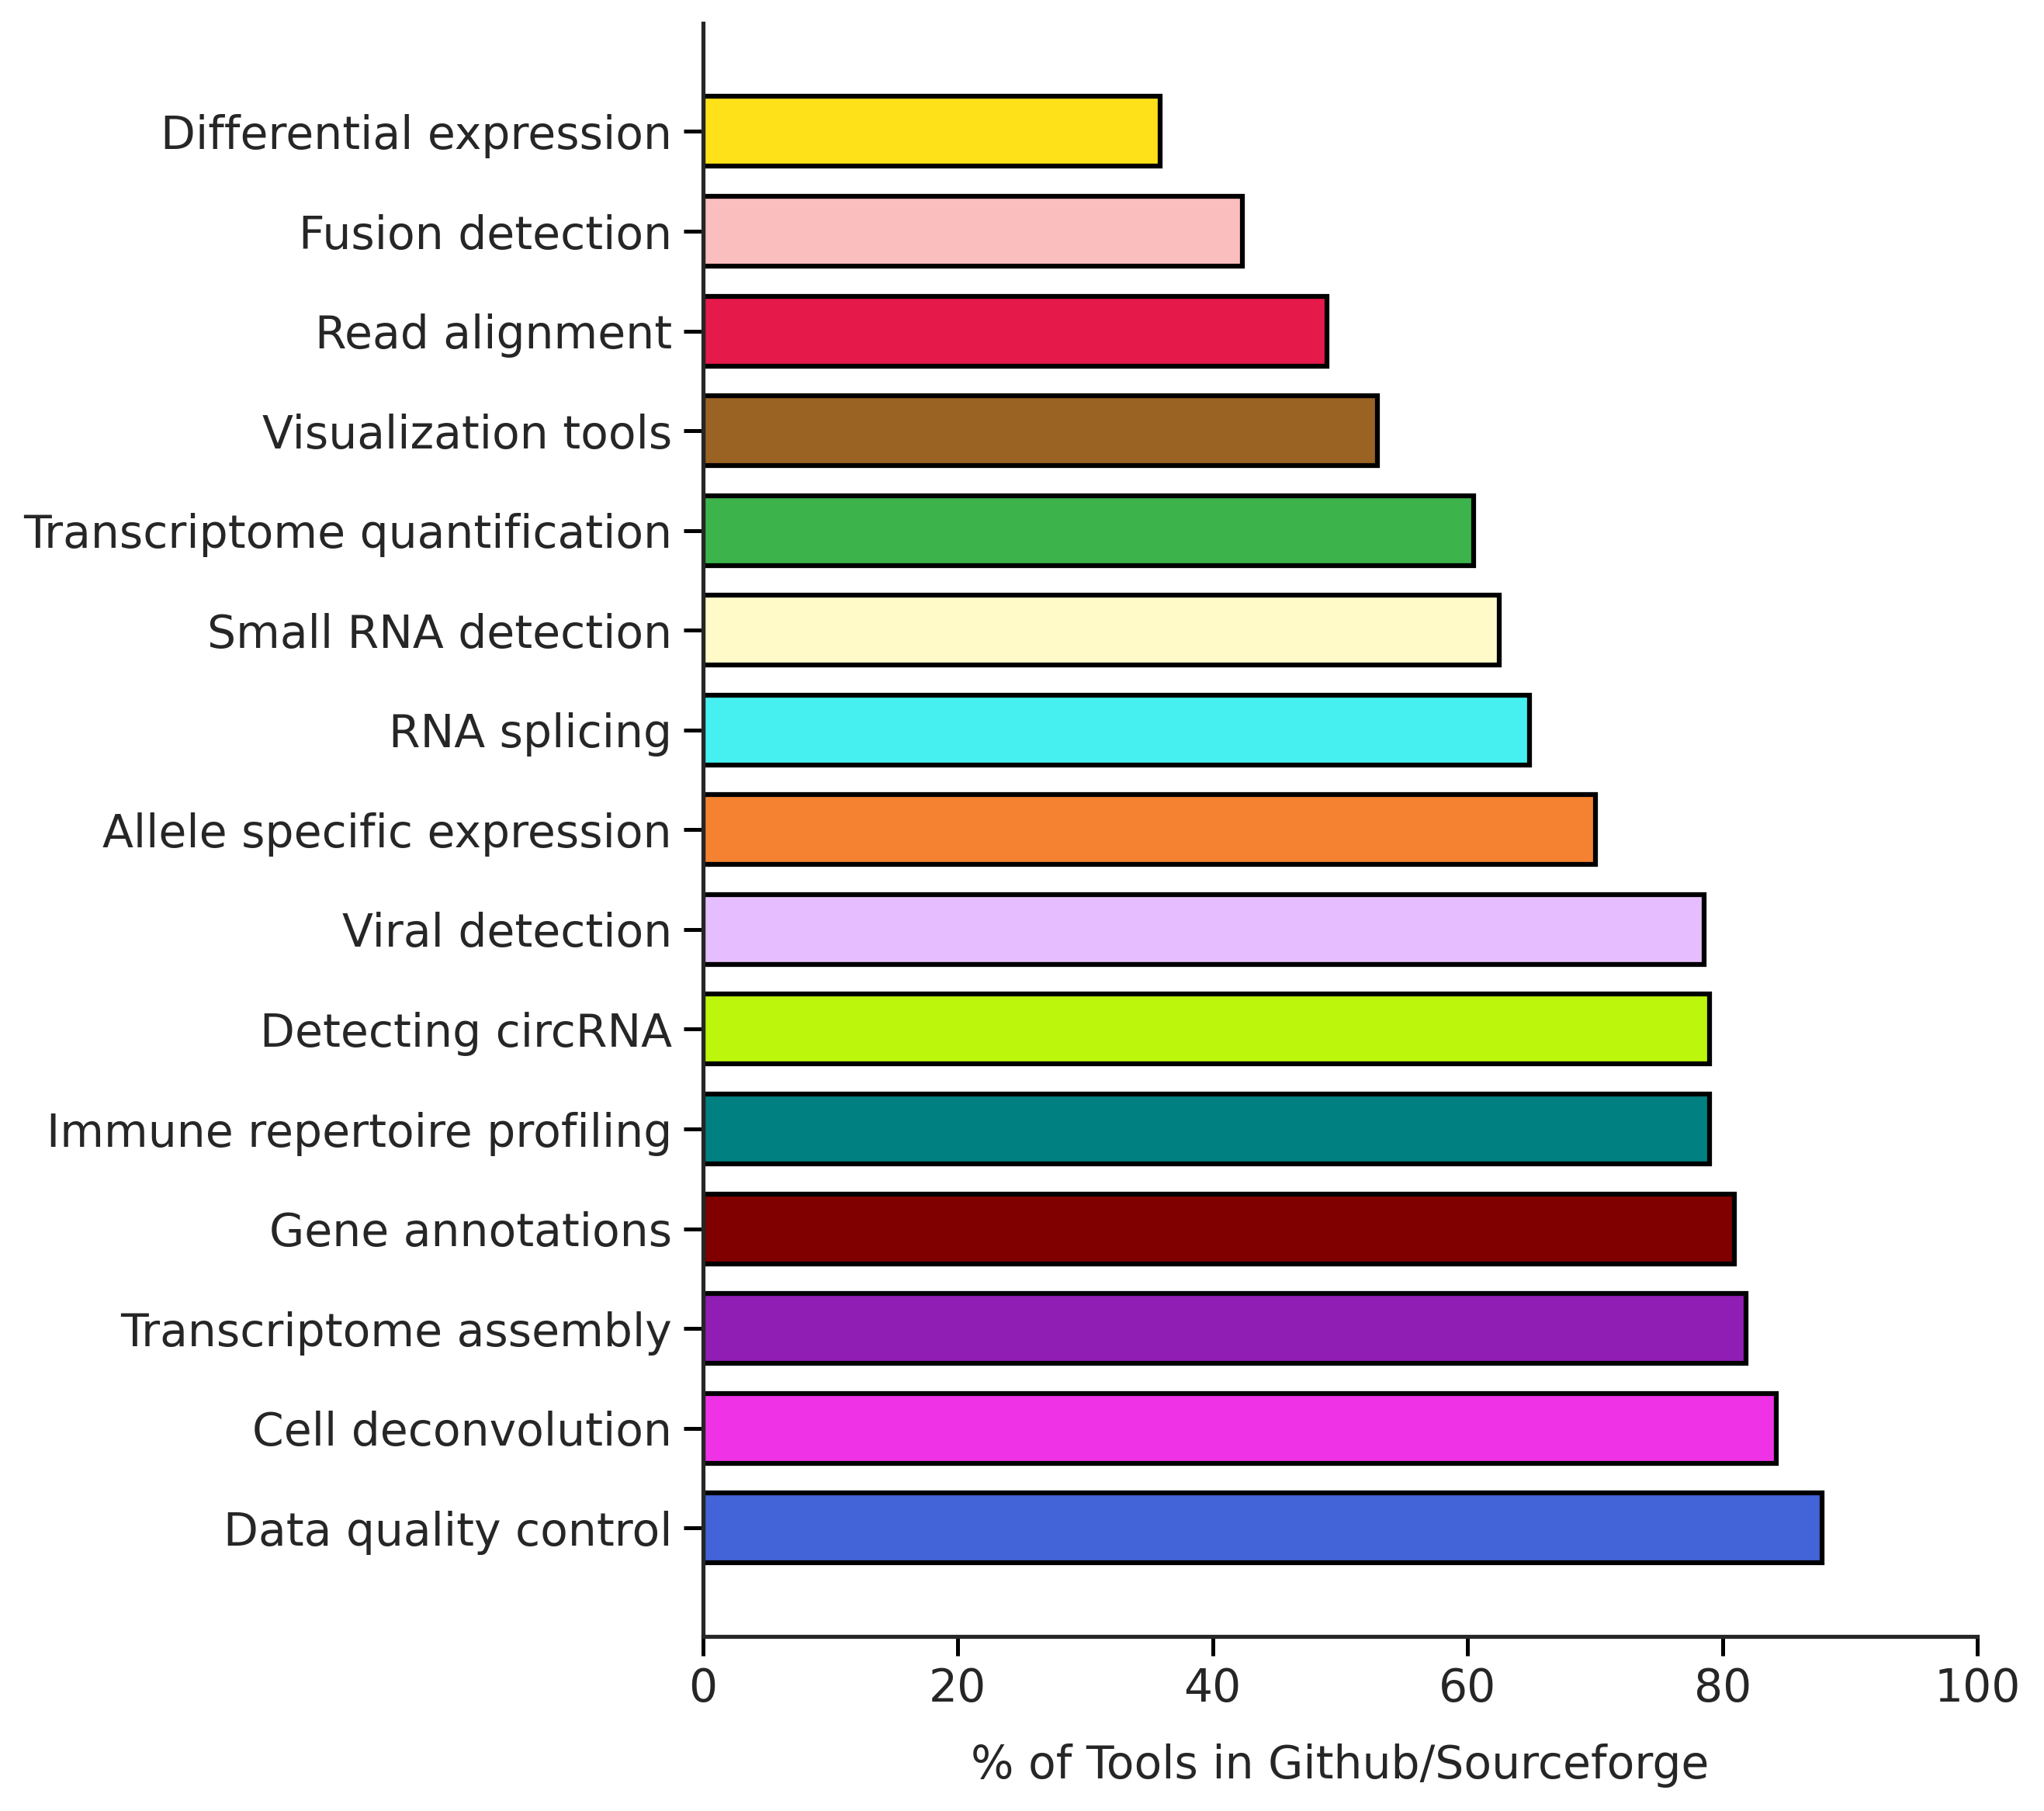

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Standardized style ---
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Domain color order ---
custom_order = [
    'Read alignment', 'Transcriptome quantification', 'Differential expression',
    'Data quality control', 'Allele specific expression', 'Transcriptome assembly',
    'RNA splicing', 'Cell deconvolution', 'Detecting circRNA', 'Fusion detection',
    'Immune repertoire profiling', 'Viral detection', 'Visualization tools',
    'Small RNA detection', 'Gene annotations'
]
custom_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000'
]

# --- Data loading and preparation ---
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()
data['Domain'] = data['Domain'].astype(str).str.strip()

col = 'Number of releases for Github/Sourceforget'
data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)
data['Has_Github'] = data[col].apply(lambda x: 1 if x > 0 else 0)

grouped = data.groupby('Domain')['Has_Github'].sum()
count_per_domain = data.groupby('Domain')['Tool names'].count()
percent_present = (grouped / count_per_domain * 100).fillna(0)
present_df = percent_present.reindex(custom_order).dropna()

# --- Sort in descending order ---
present_df = present_df.sort_values(ascending=False)

# --- Assign colors by domain for sorted DataFrame ---
domain_to_color = dict(zip(custom_order, custom_colors))
bar_colors = [domain_to_color[dom] for dom in present_df.index]

# --- Plot ---
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
bars = ax.barh(
    present_df.index,
    present_df.values,
    color=bar_colors,
    edgecolor='black',
    linewidth=1.5,
    height=0.7
)

ax.set_xlabel('% of Tools in Github/Sourceforge', fontsize=LABEL_FONT_SIZE, labelpad=10)
ax.set_ylabel('', fontsize=LABEL_FONT_SIZE)
ax.set_xlim(0, 100)

ax.tick_params(axis='y', which='major', direction='out', length=6, width=1.2, color='black', labelsize=LABEL_FONT_SIZE, left=True, right=False)
ax.tick_params(axis='x', which='major', direction='out', length=6, width=1.2, color='black', labelsize=LABEL_FONT_SIZE, bottom=True, top=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout()
plt.show()


/tmp/ipython-input-15-3391073950.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=1.2)


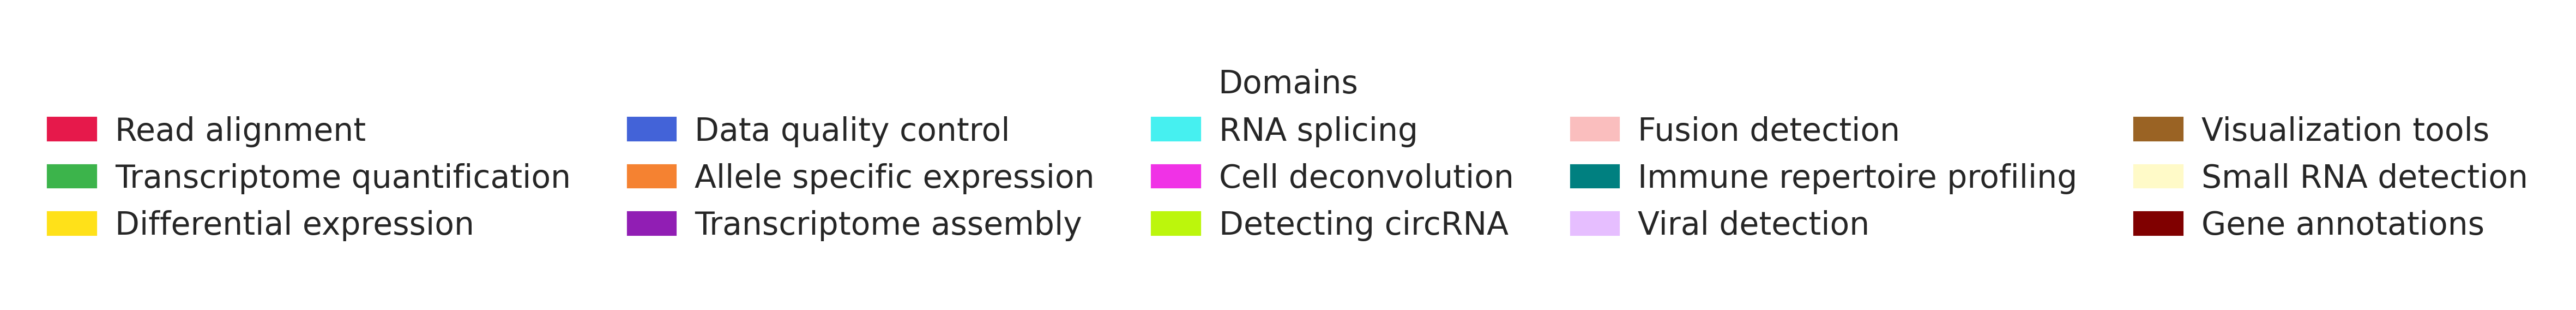

In [15]:
import matplotlib.pyplot as plt

# Your domain order and colors from earlier
custom_order = [
    'Read alignment', 'Transcriptome quantification', 'Differential expression',
    'Data quality control', 'Allele specific expression', 'Transcriptome assembly',
    'RNA splicing', 'Cell deconvolution', 'Detecting circRNA', 'Fusion detection',
    'Immune repertoire profiling', 'Viral detection', 'Visualization tools',
    'Small RNA detection', 'Gene annotations'
]
custom_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
    '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
    '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000'
]

LABEL_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# Create color handles for the legend
handles = [
    plt.Rectangle((0, 0), 1, 1, color=custom_colors[i])
    for i in range(len(custom_order))
]

# --- Create the figure and legend only ---
fig, ax = plt.subplots(figsize=(8, 2.2), dpi=300)
ax.axis('off')  # Hide axes

# Place the legend: 5 columns, 3 rows
legend = ax.legend(
    handles, custom_order,
    loc='center',
    ncol=5,  # 5 per row
    frameon=False,
    borderpad=1.0,
    handlelength=1.5,
    columnspacing=1.8,
    handletextpad=0.6,
    bbox_to_anchor=(0.5, 0.5),
    fontsize=LABEL_FONT_SIZE,
    title='Domains'
)

plt.tight_layout(pad=1.2)
plt.show()


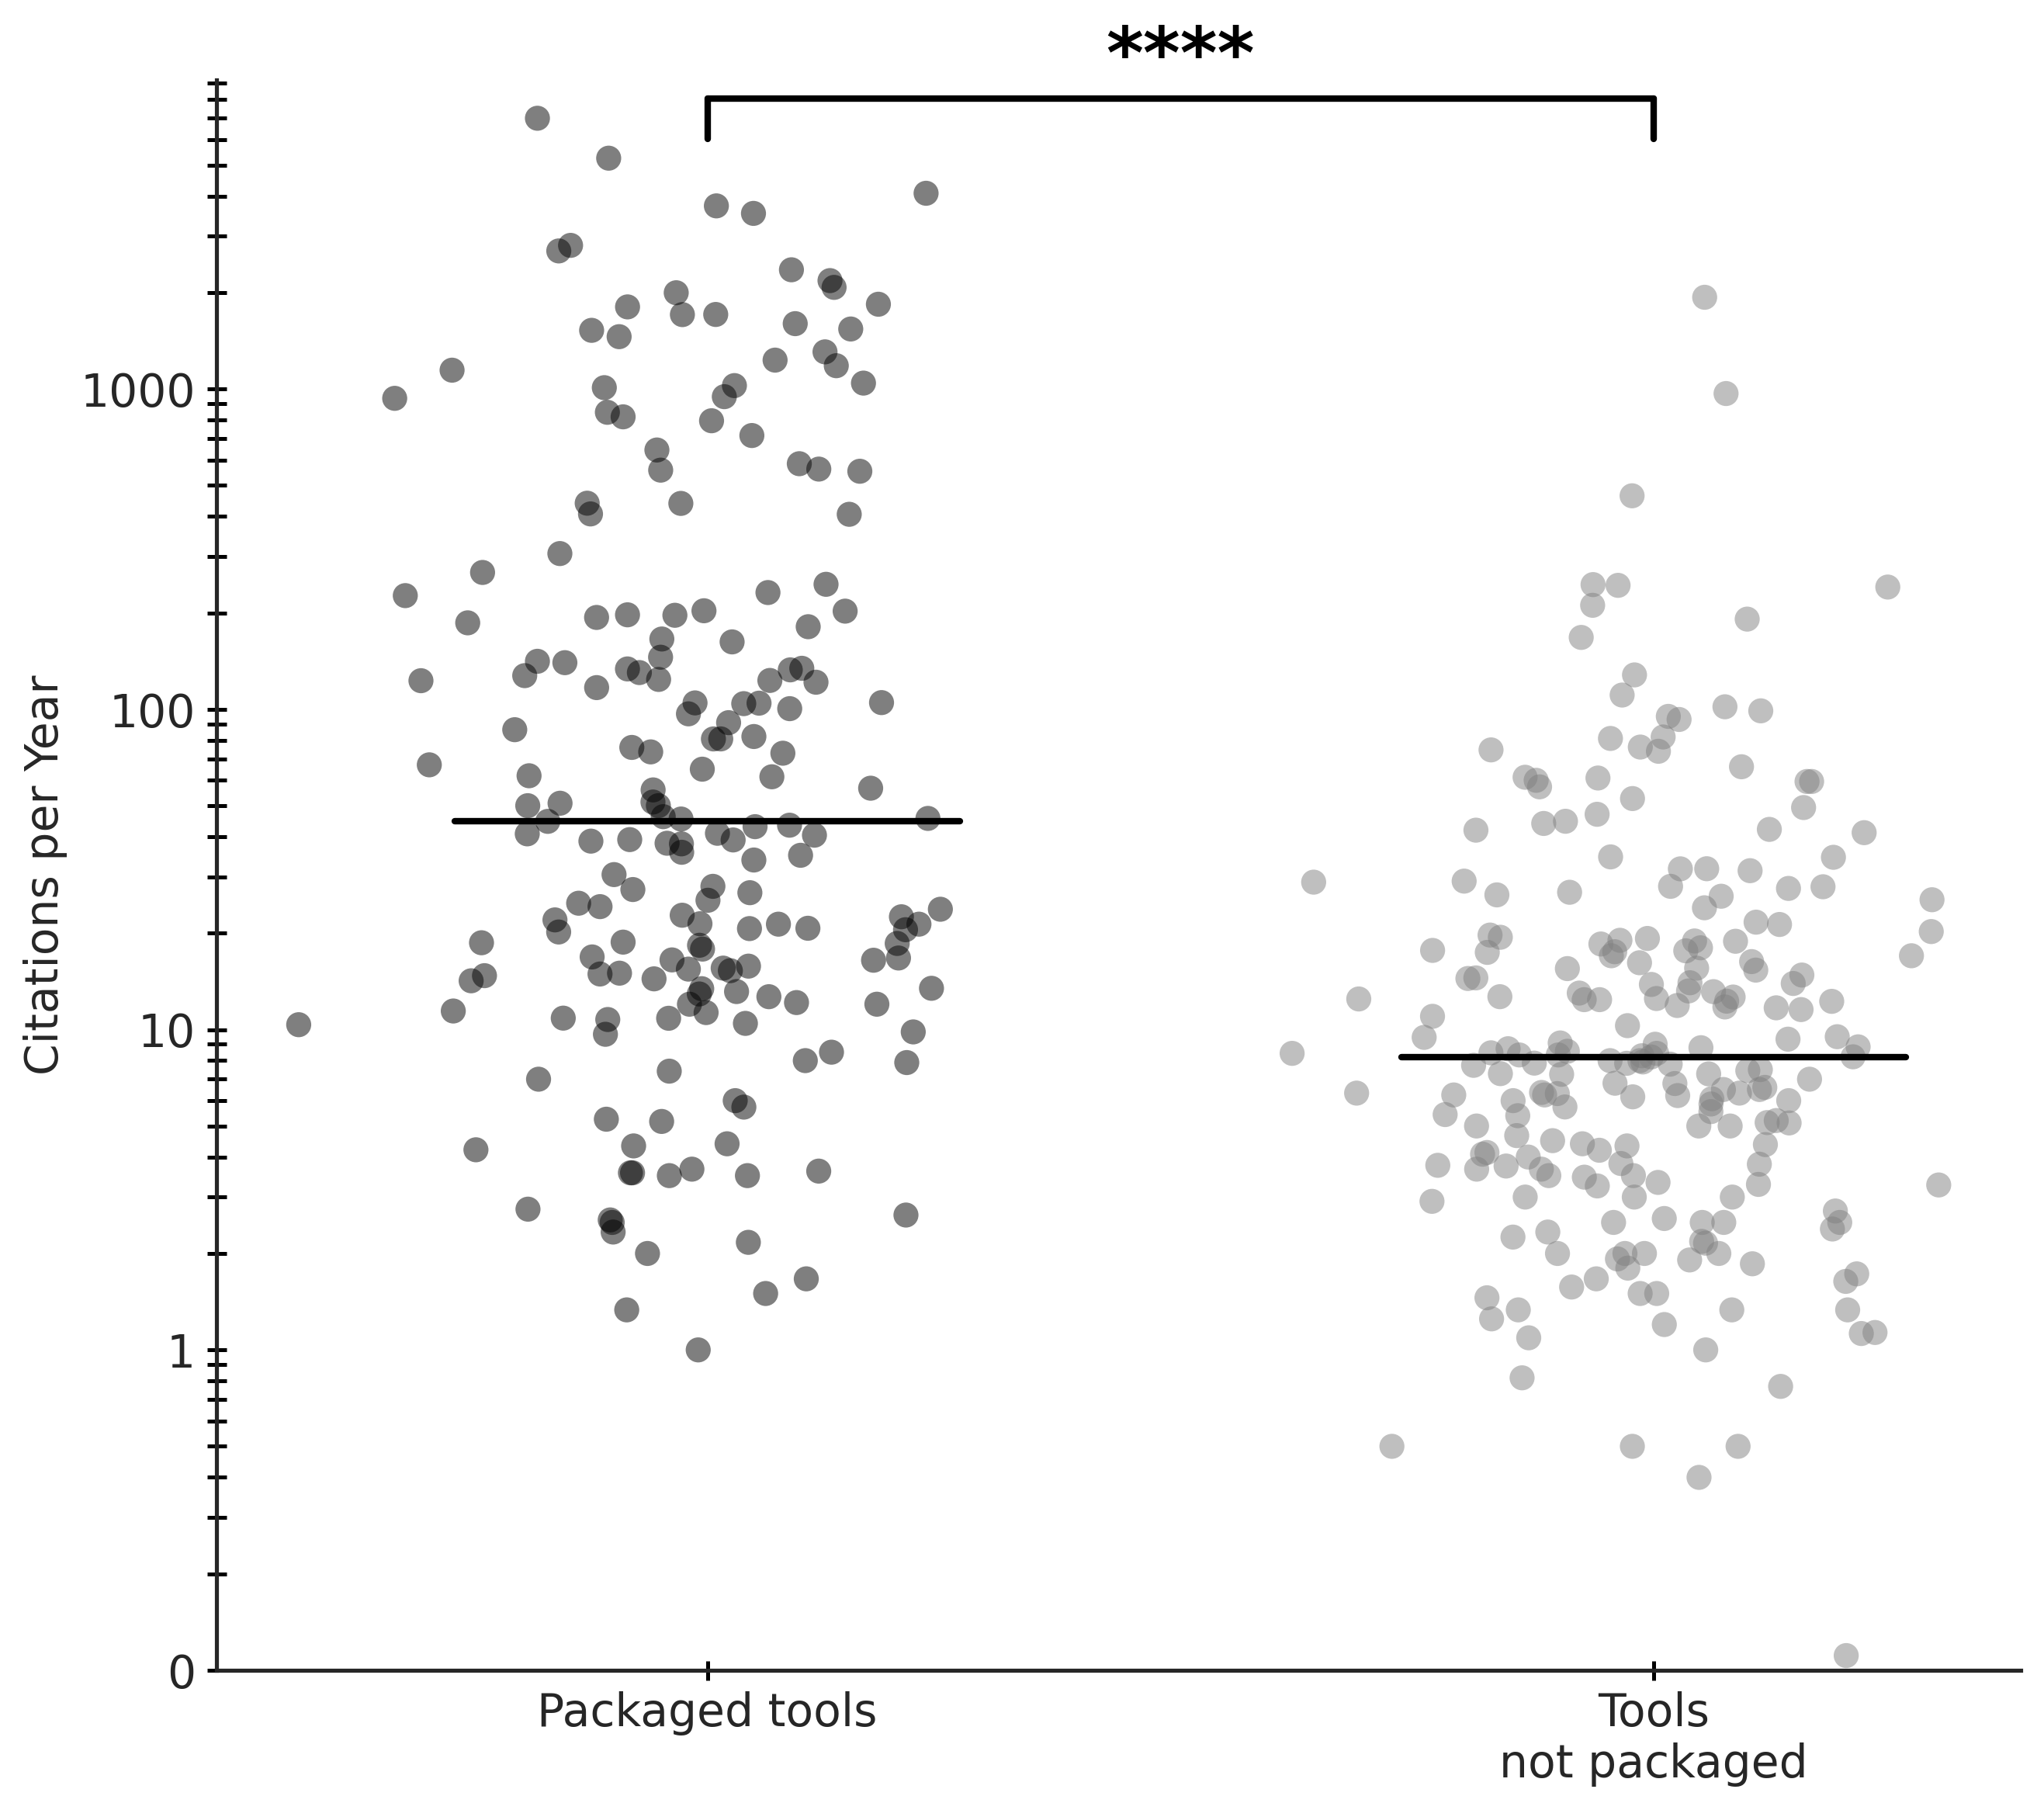

Mann-Whitney U Test Results: (Package Manager)
U statistic: 9622.50
P-value: 1.04e-21
Packaged tools: 191
Tools
not packaged: 222
--------------------------------------------------


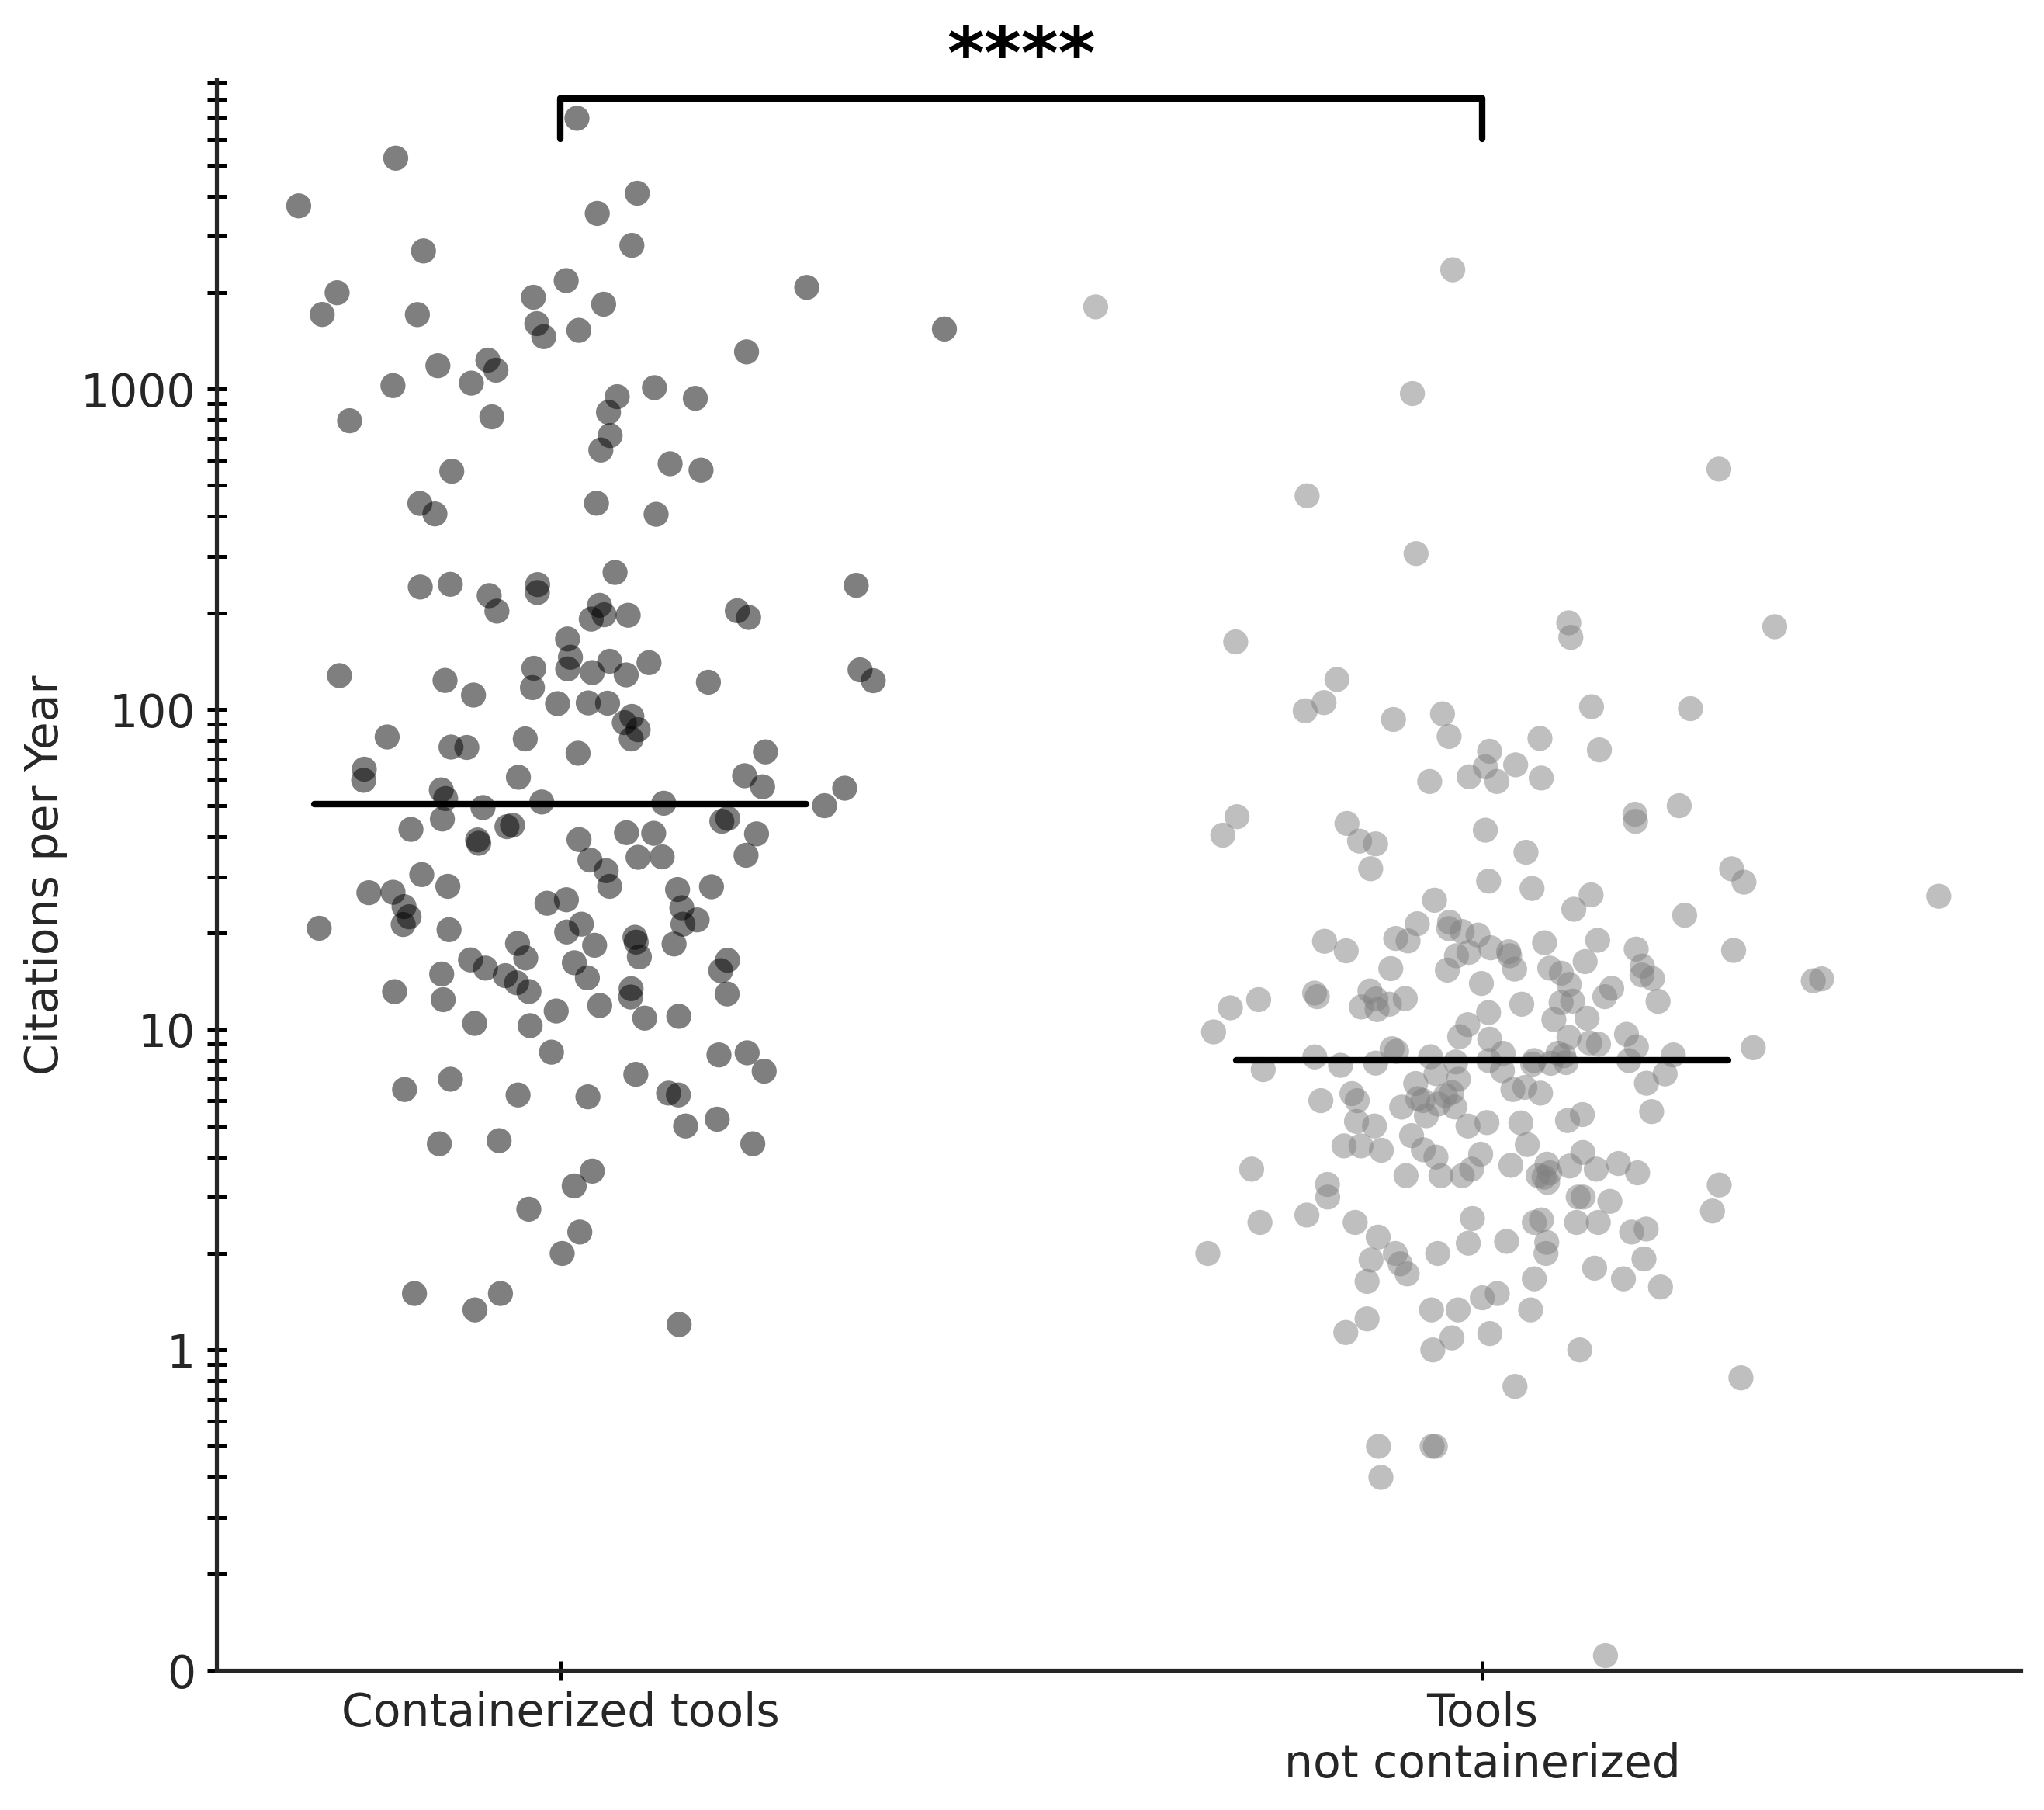

Mann-Whitney U Test Results: (Docker)
U statistic: 8312.00
P-value: 4.96e-26
Containerized tools: 182
Tools
not containerized: 231
--------------------------------------------------


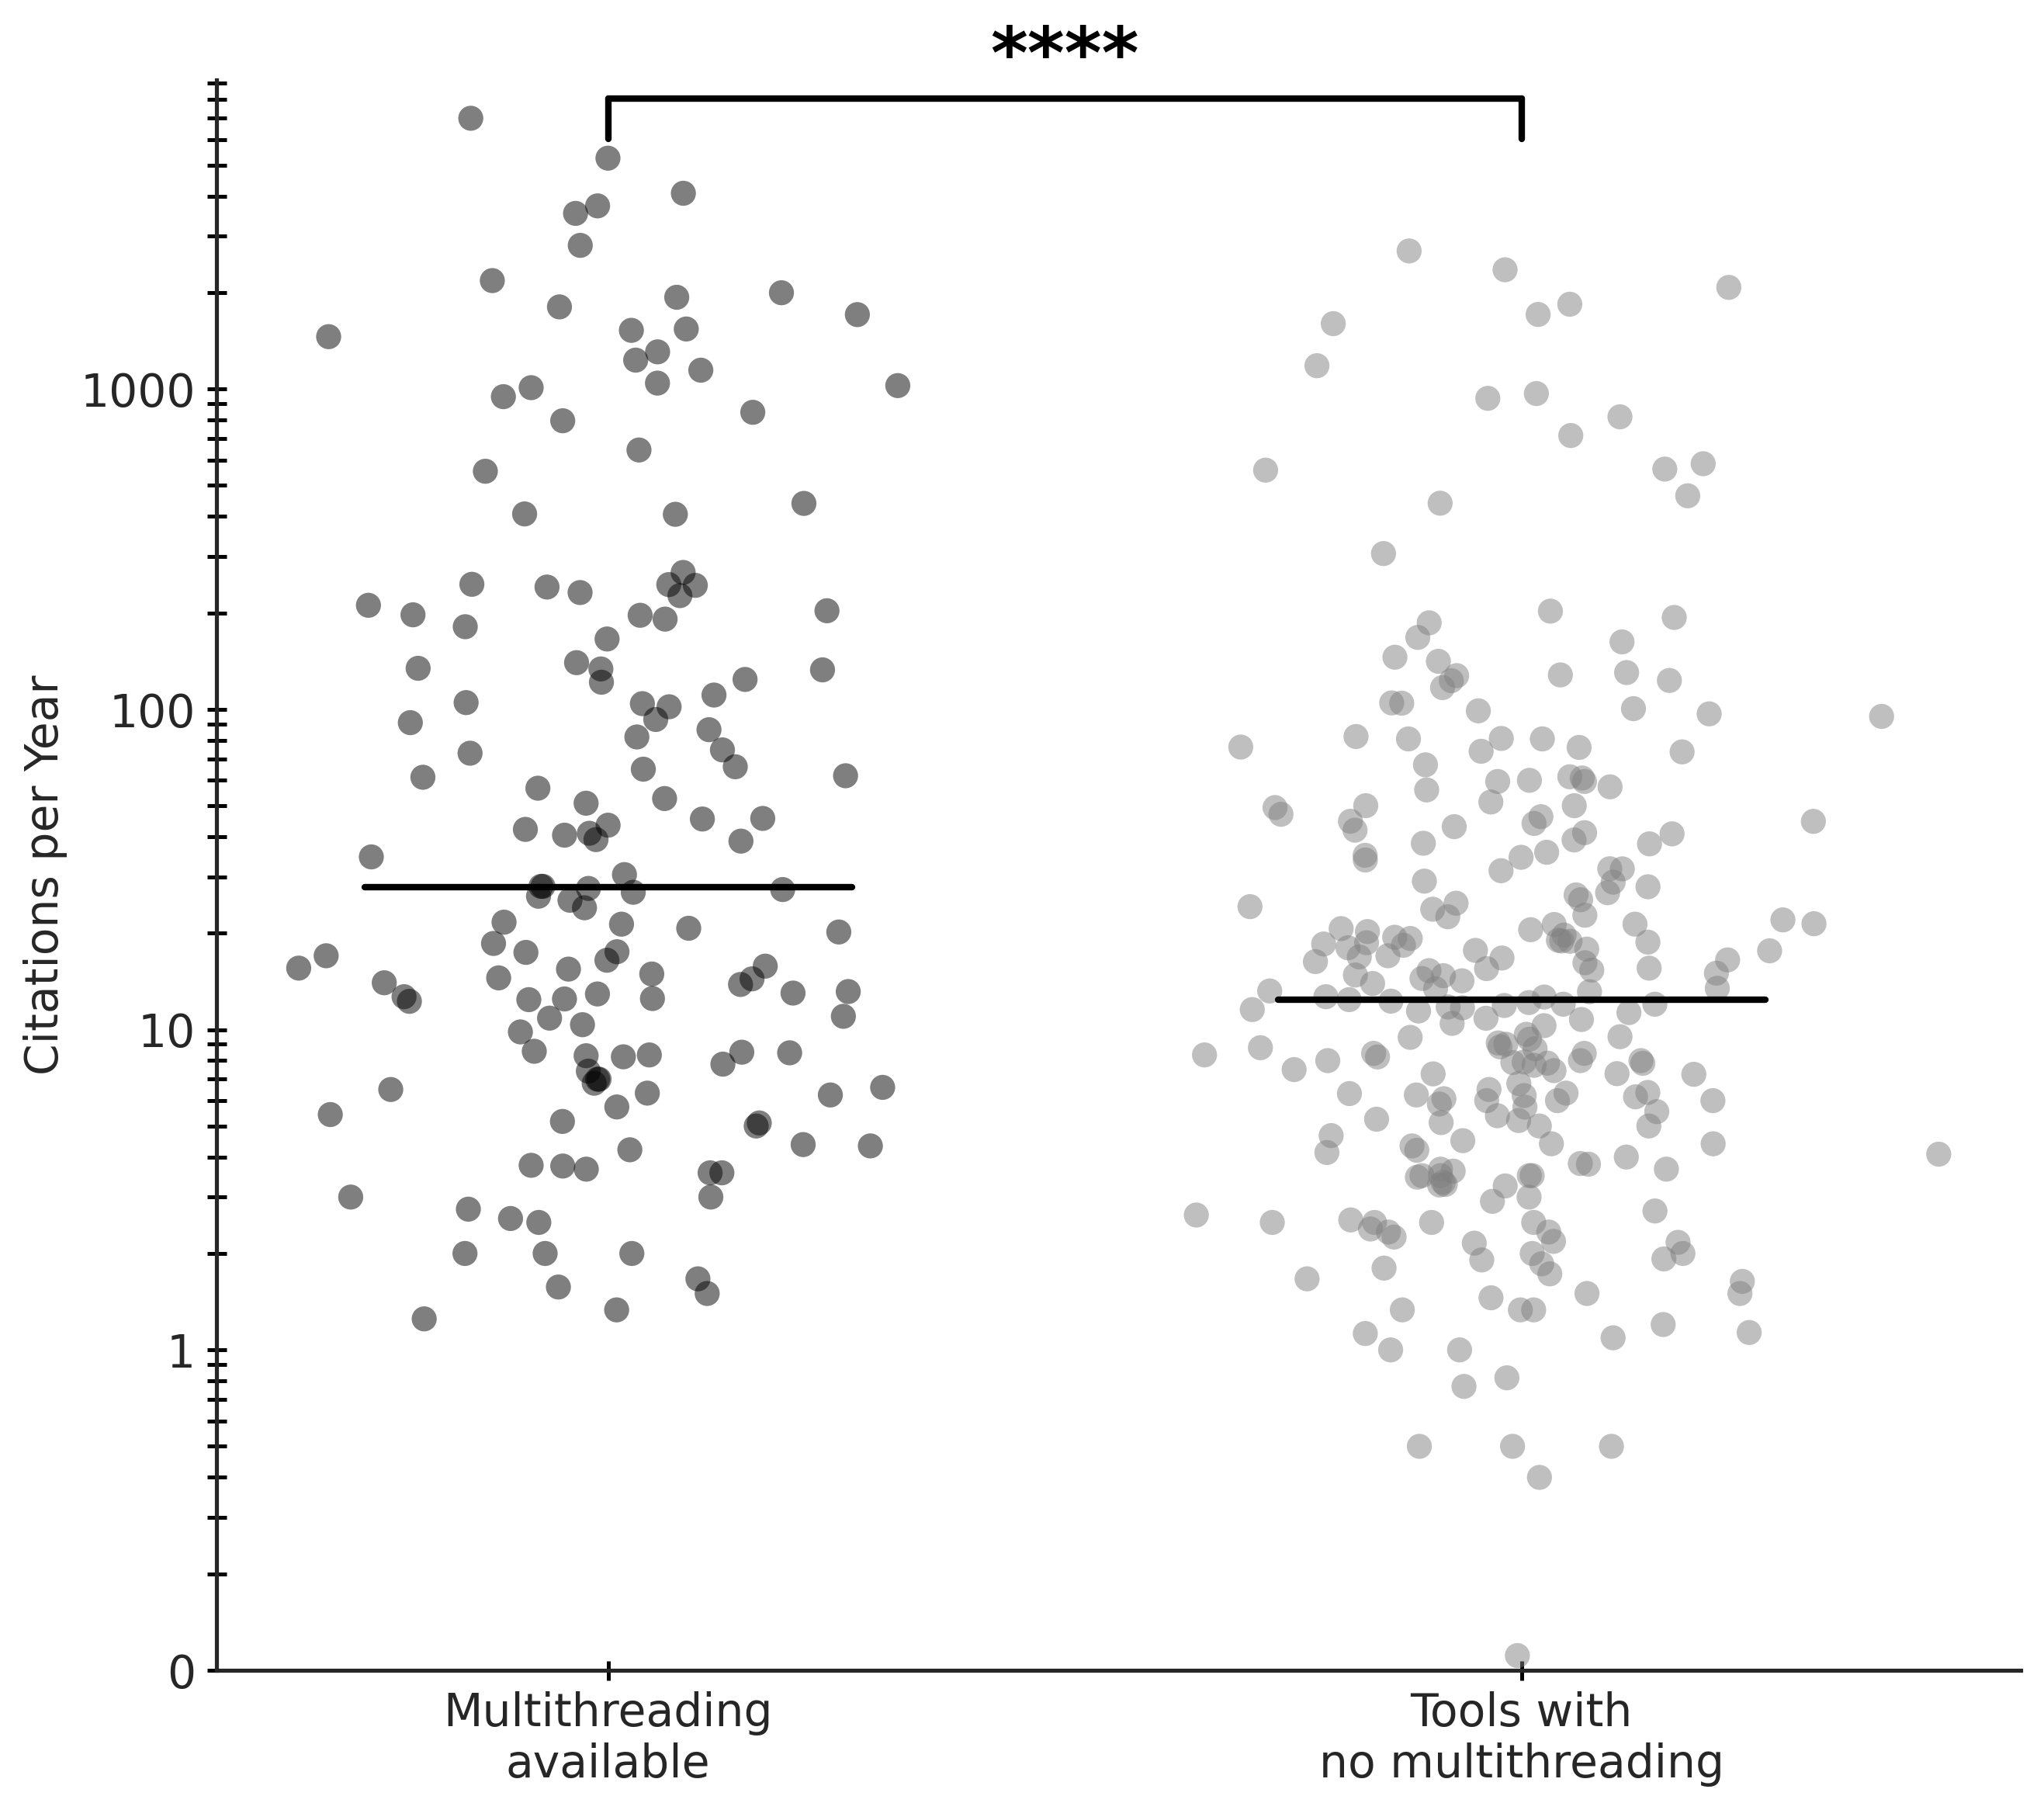

Mann-Whitney U Test Results: (Multithreading)
U statistic: 14212.00
P-value: 1.03e-06
Multithreading
available: 154
Tools with
no multithreading: 259
--------------------------------------------------


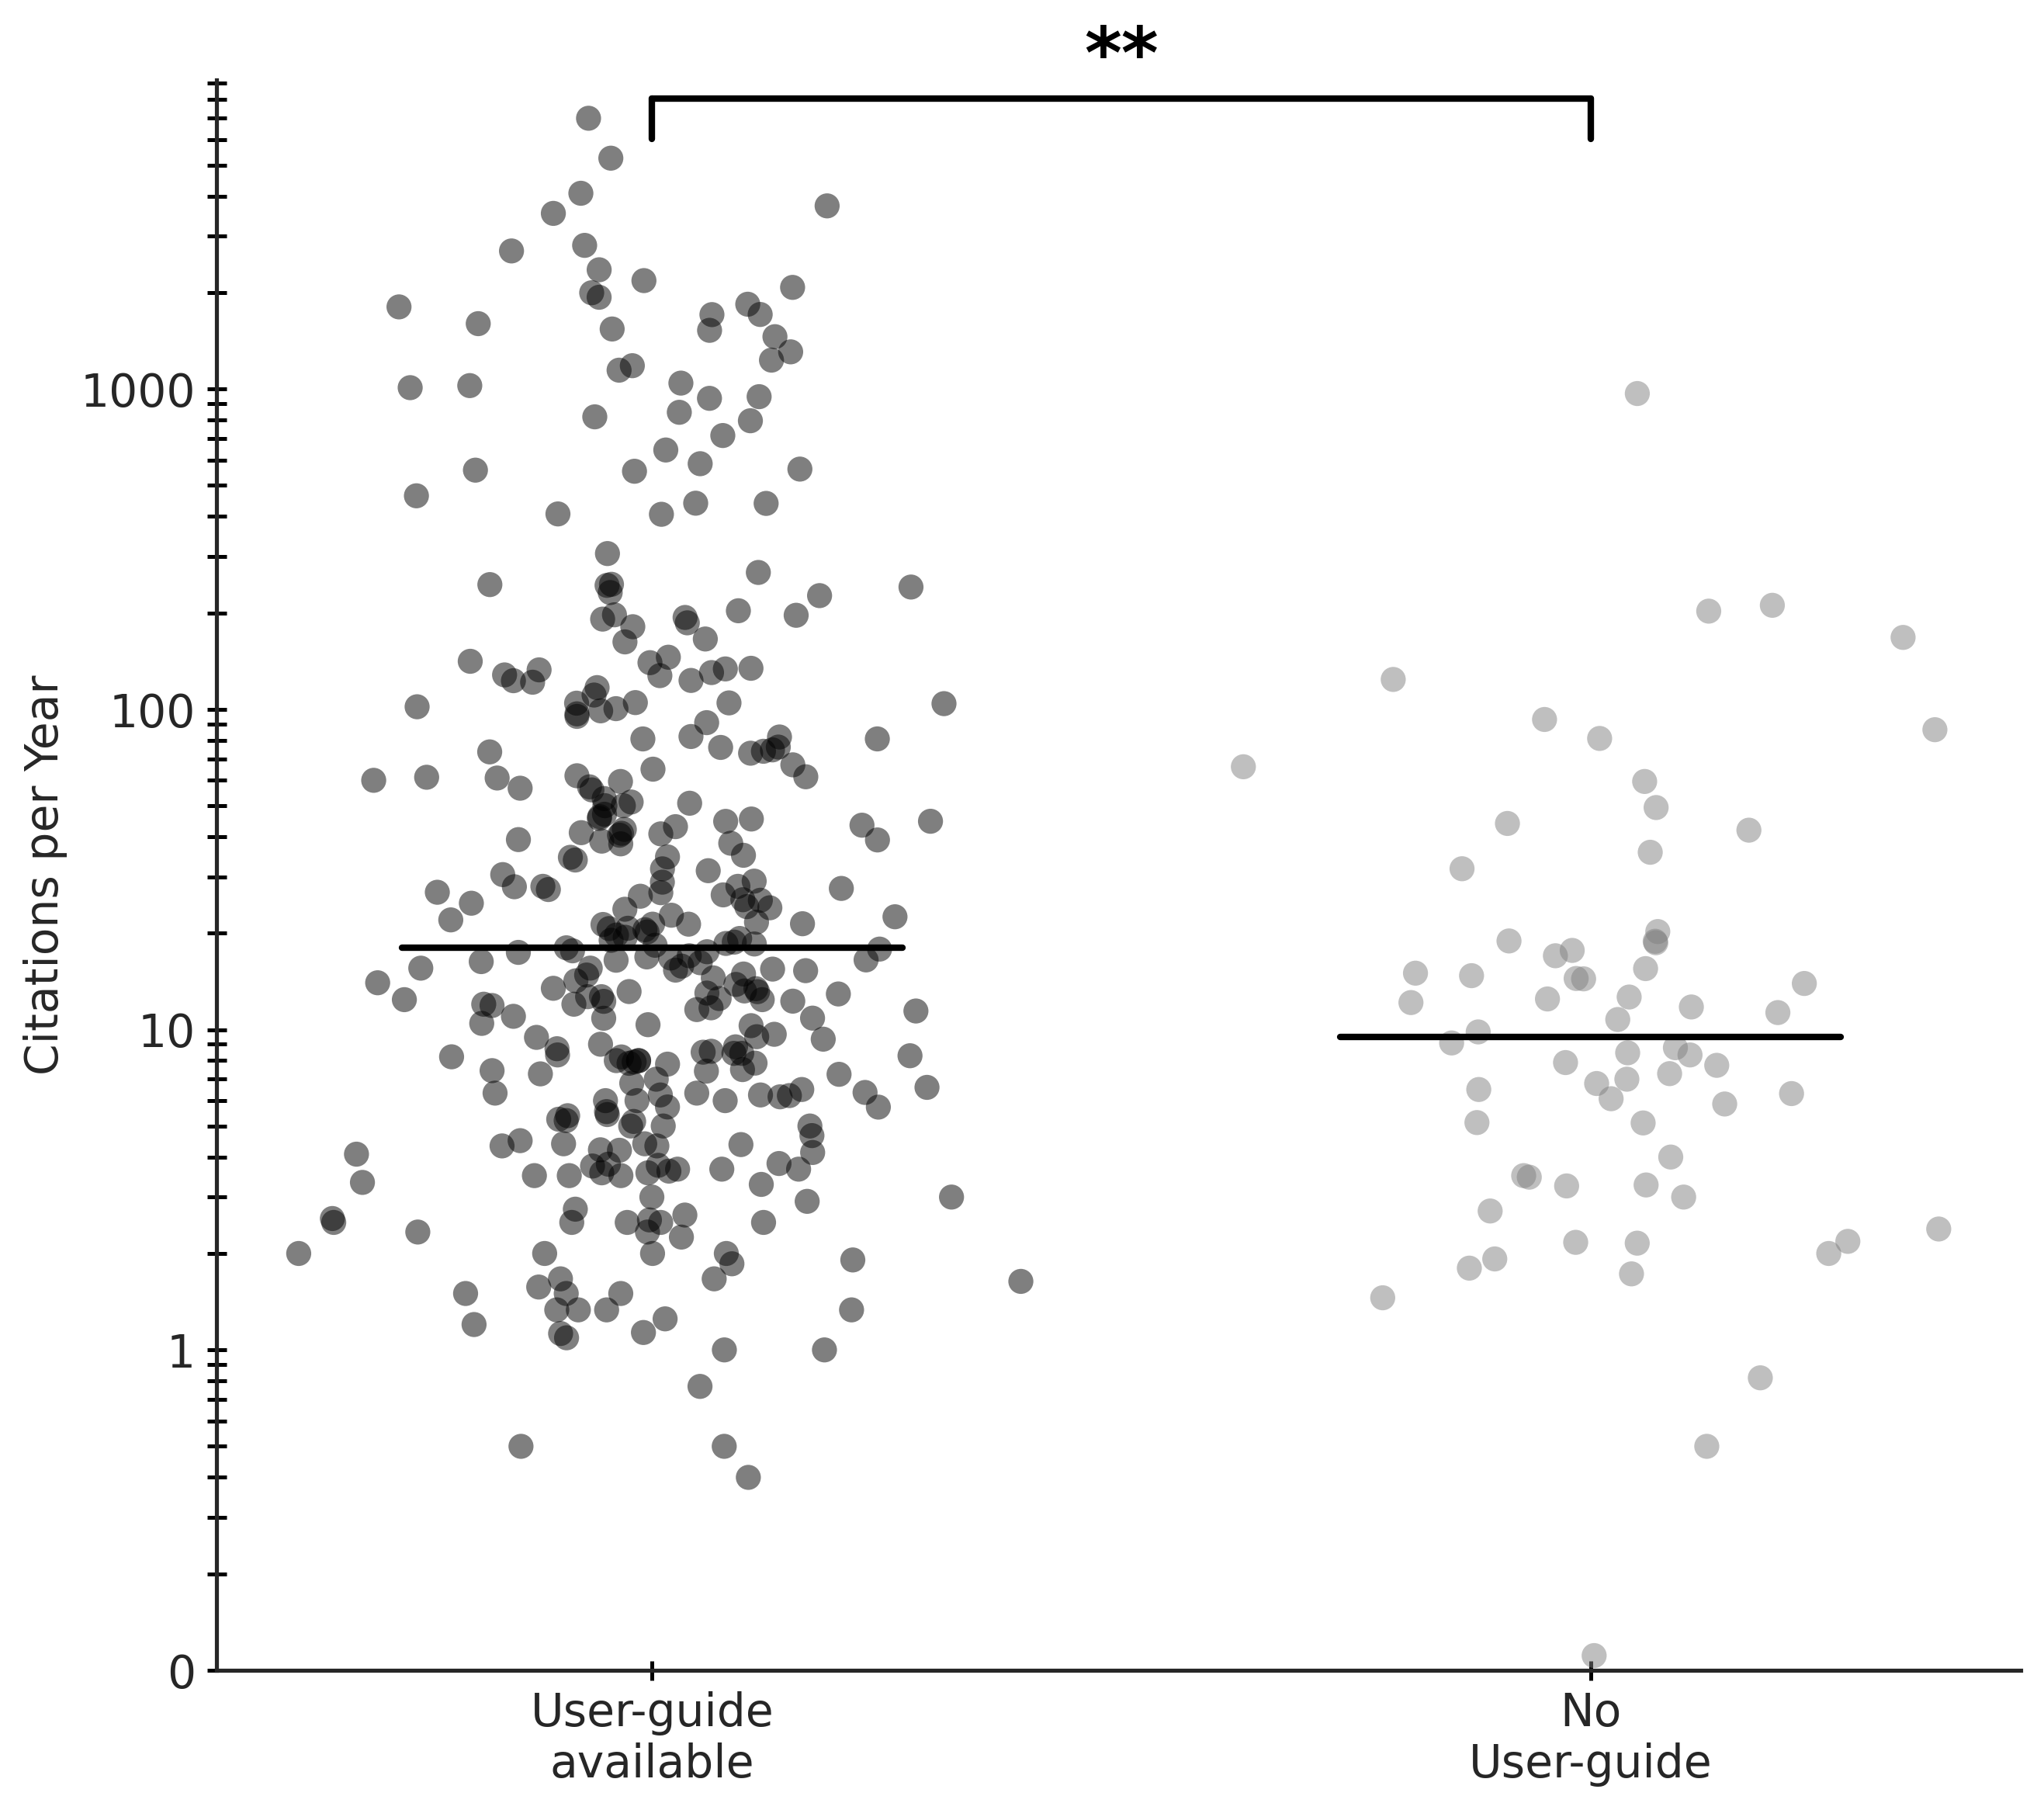

Mann-Whitney U Test Results: (User-guides)
U statistic: 8793.00
P-value: 1.10e-03
User-guide
available: 345
No
User-guide: 68
--------------------------------------------------


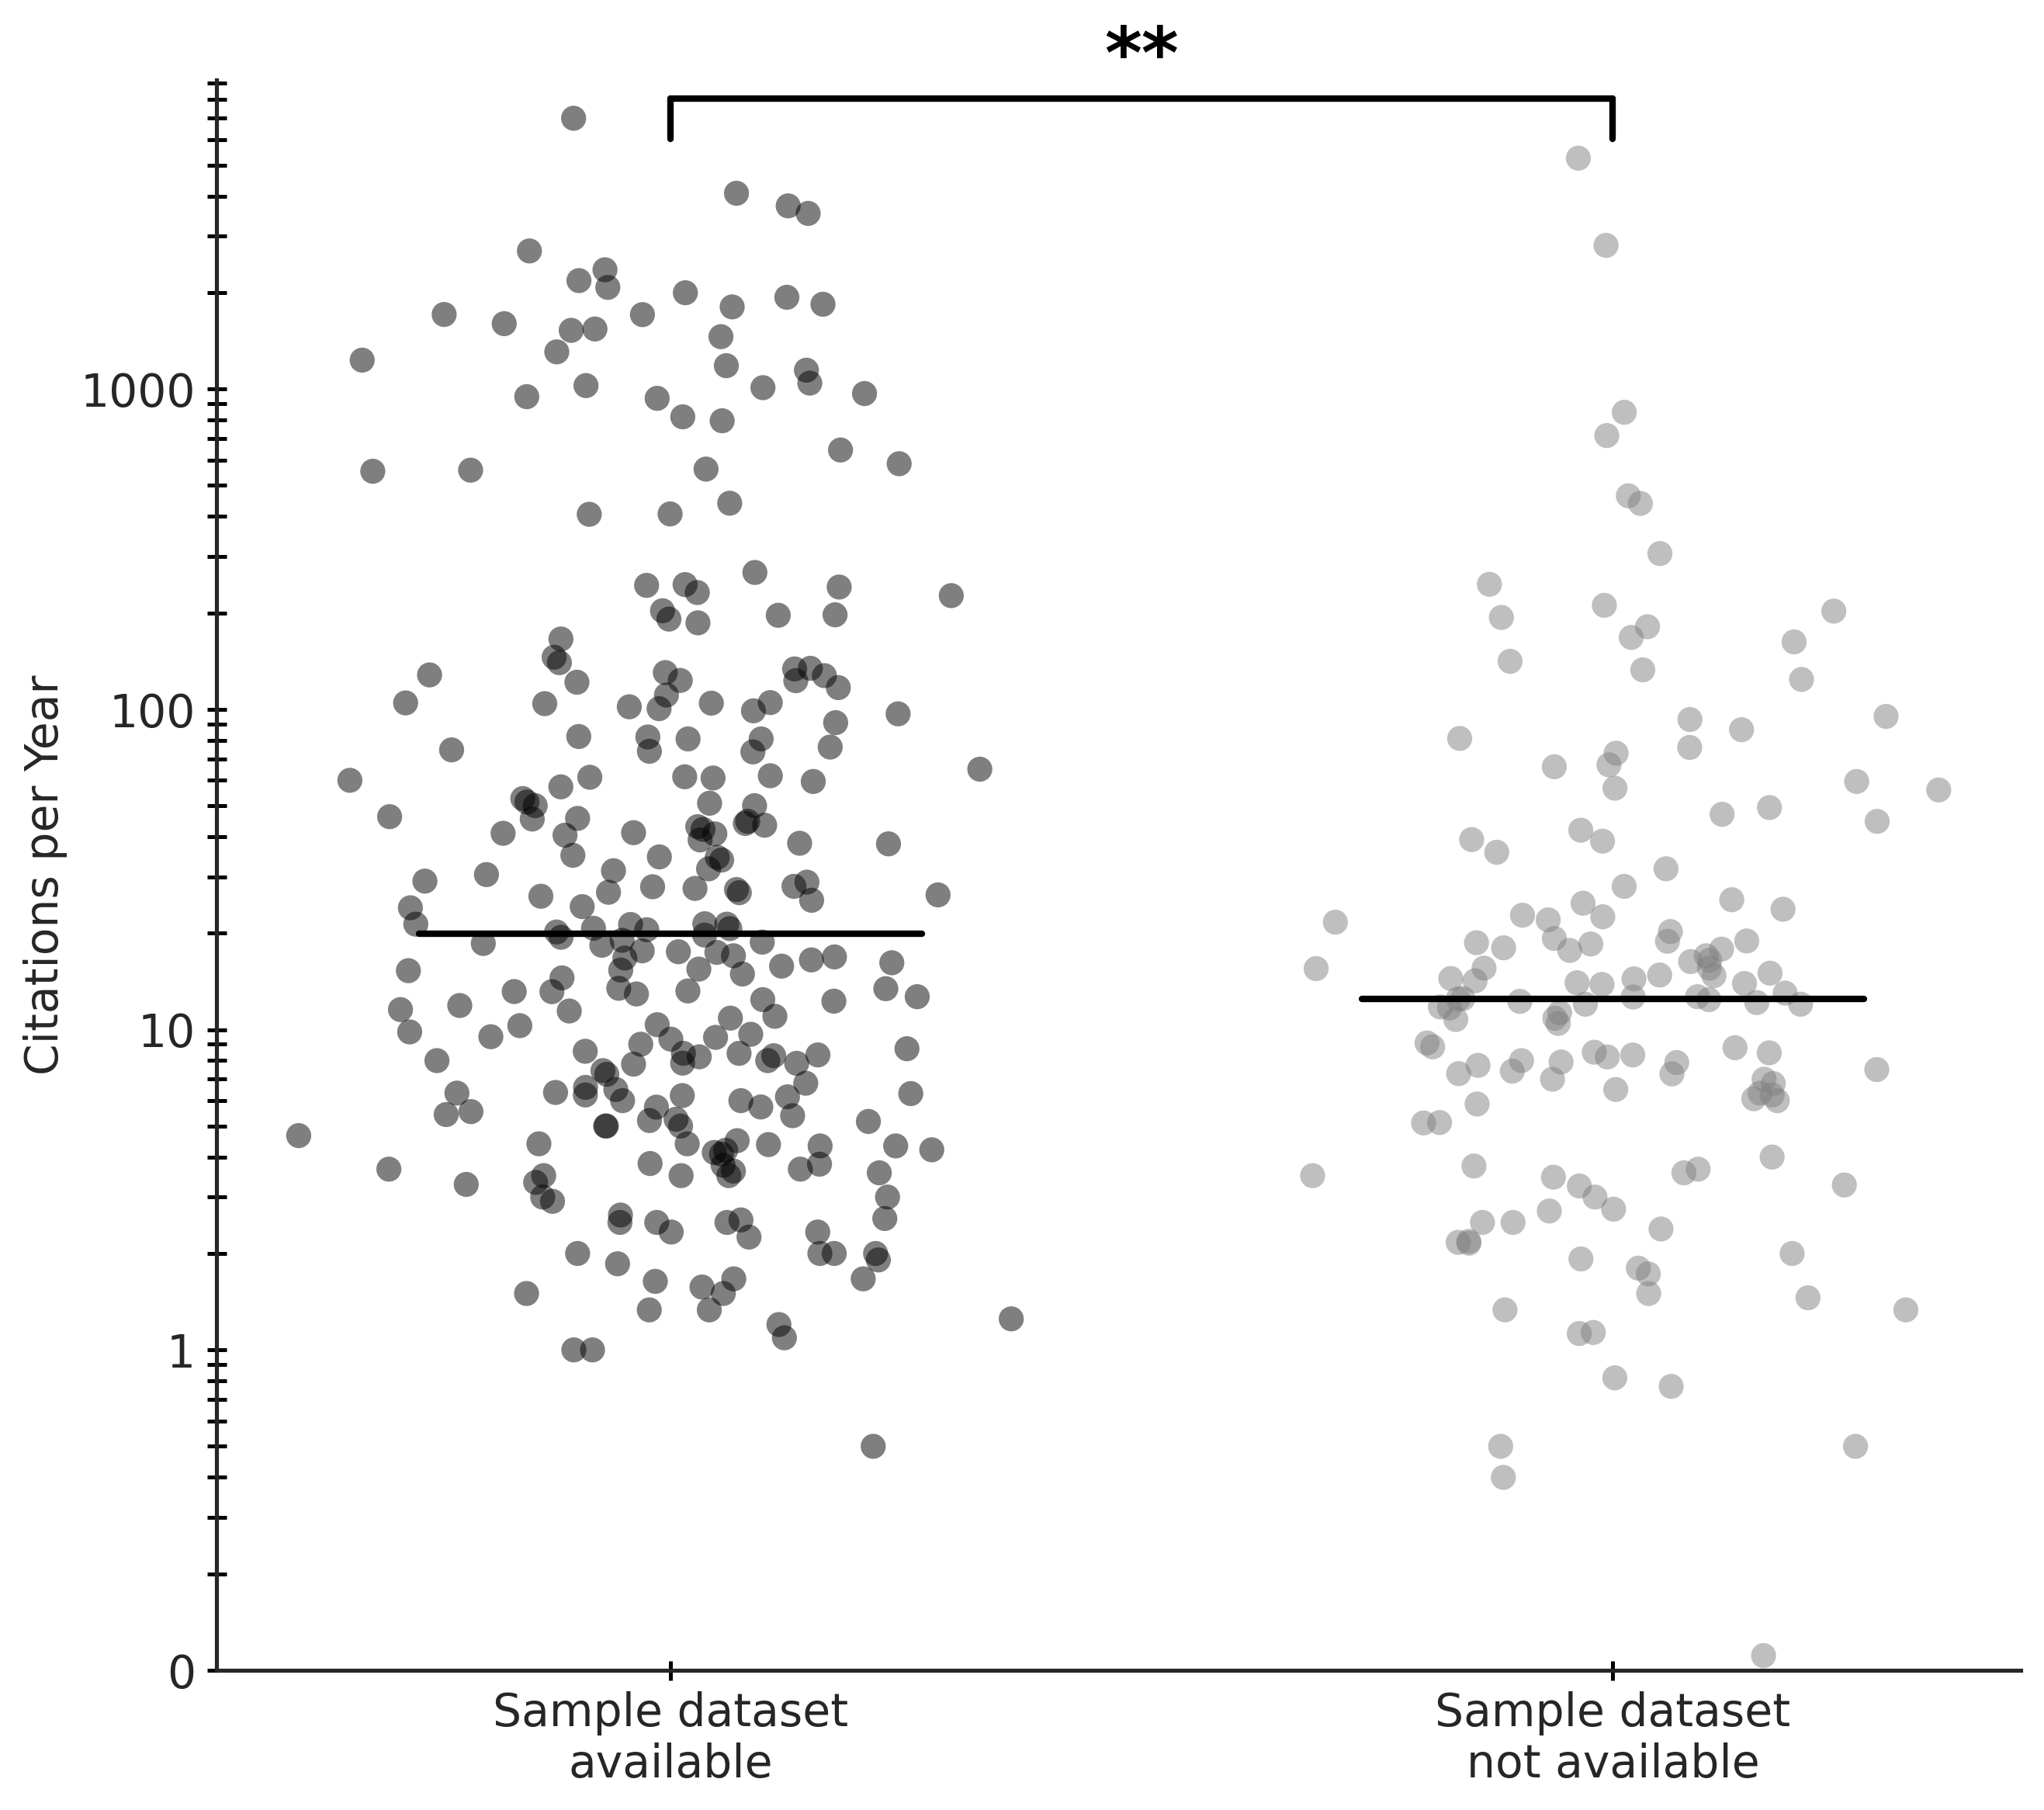

Mann-Whitney U Test Results: (Toy Examples)
U statistic: 15963.50
P-value: 3.79e-03
Sample dataset
available: 270
Sample dataset
not available: 143
--------------------------------------------------


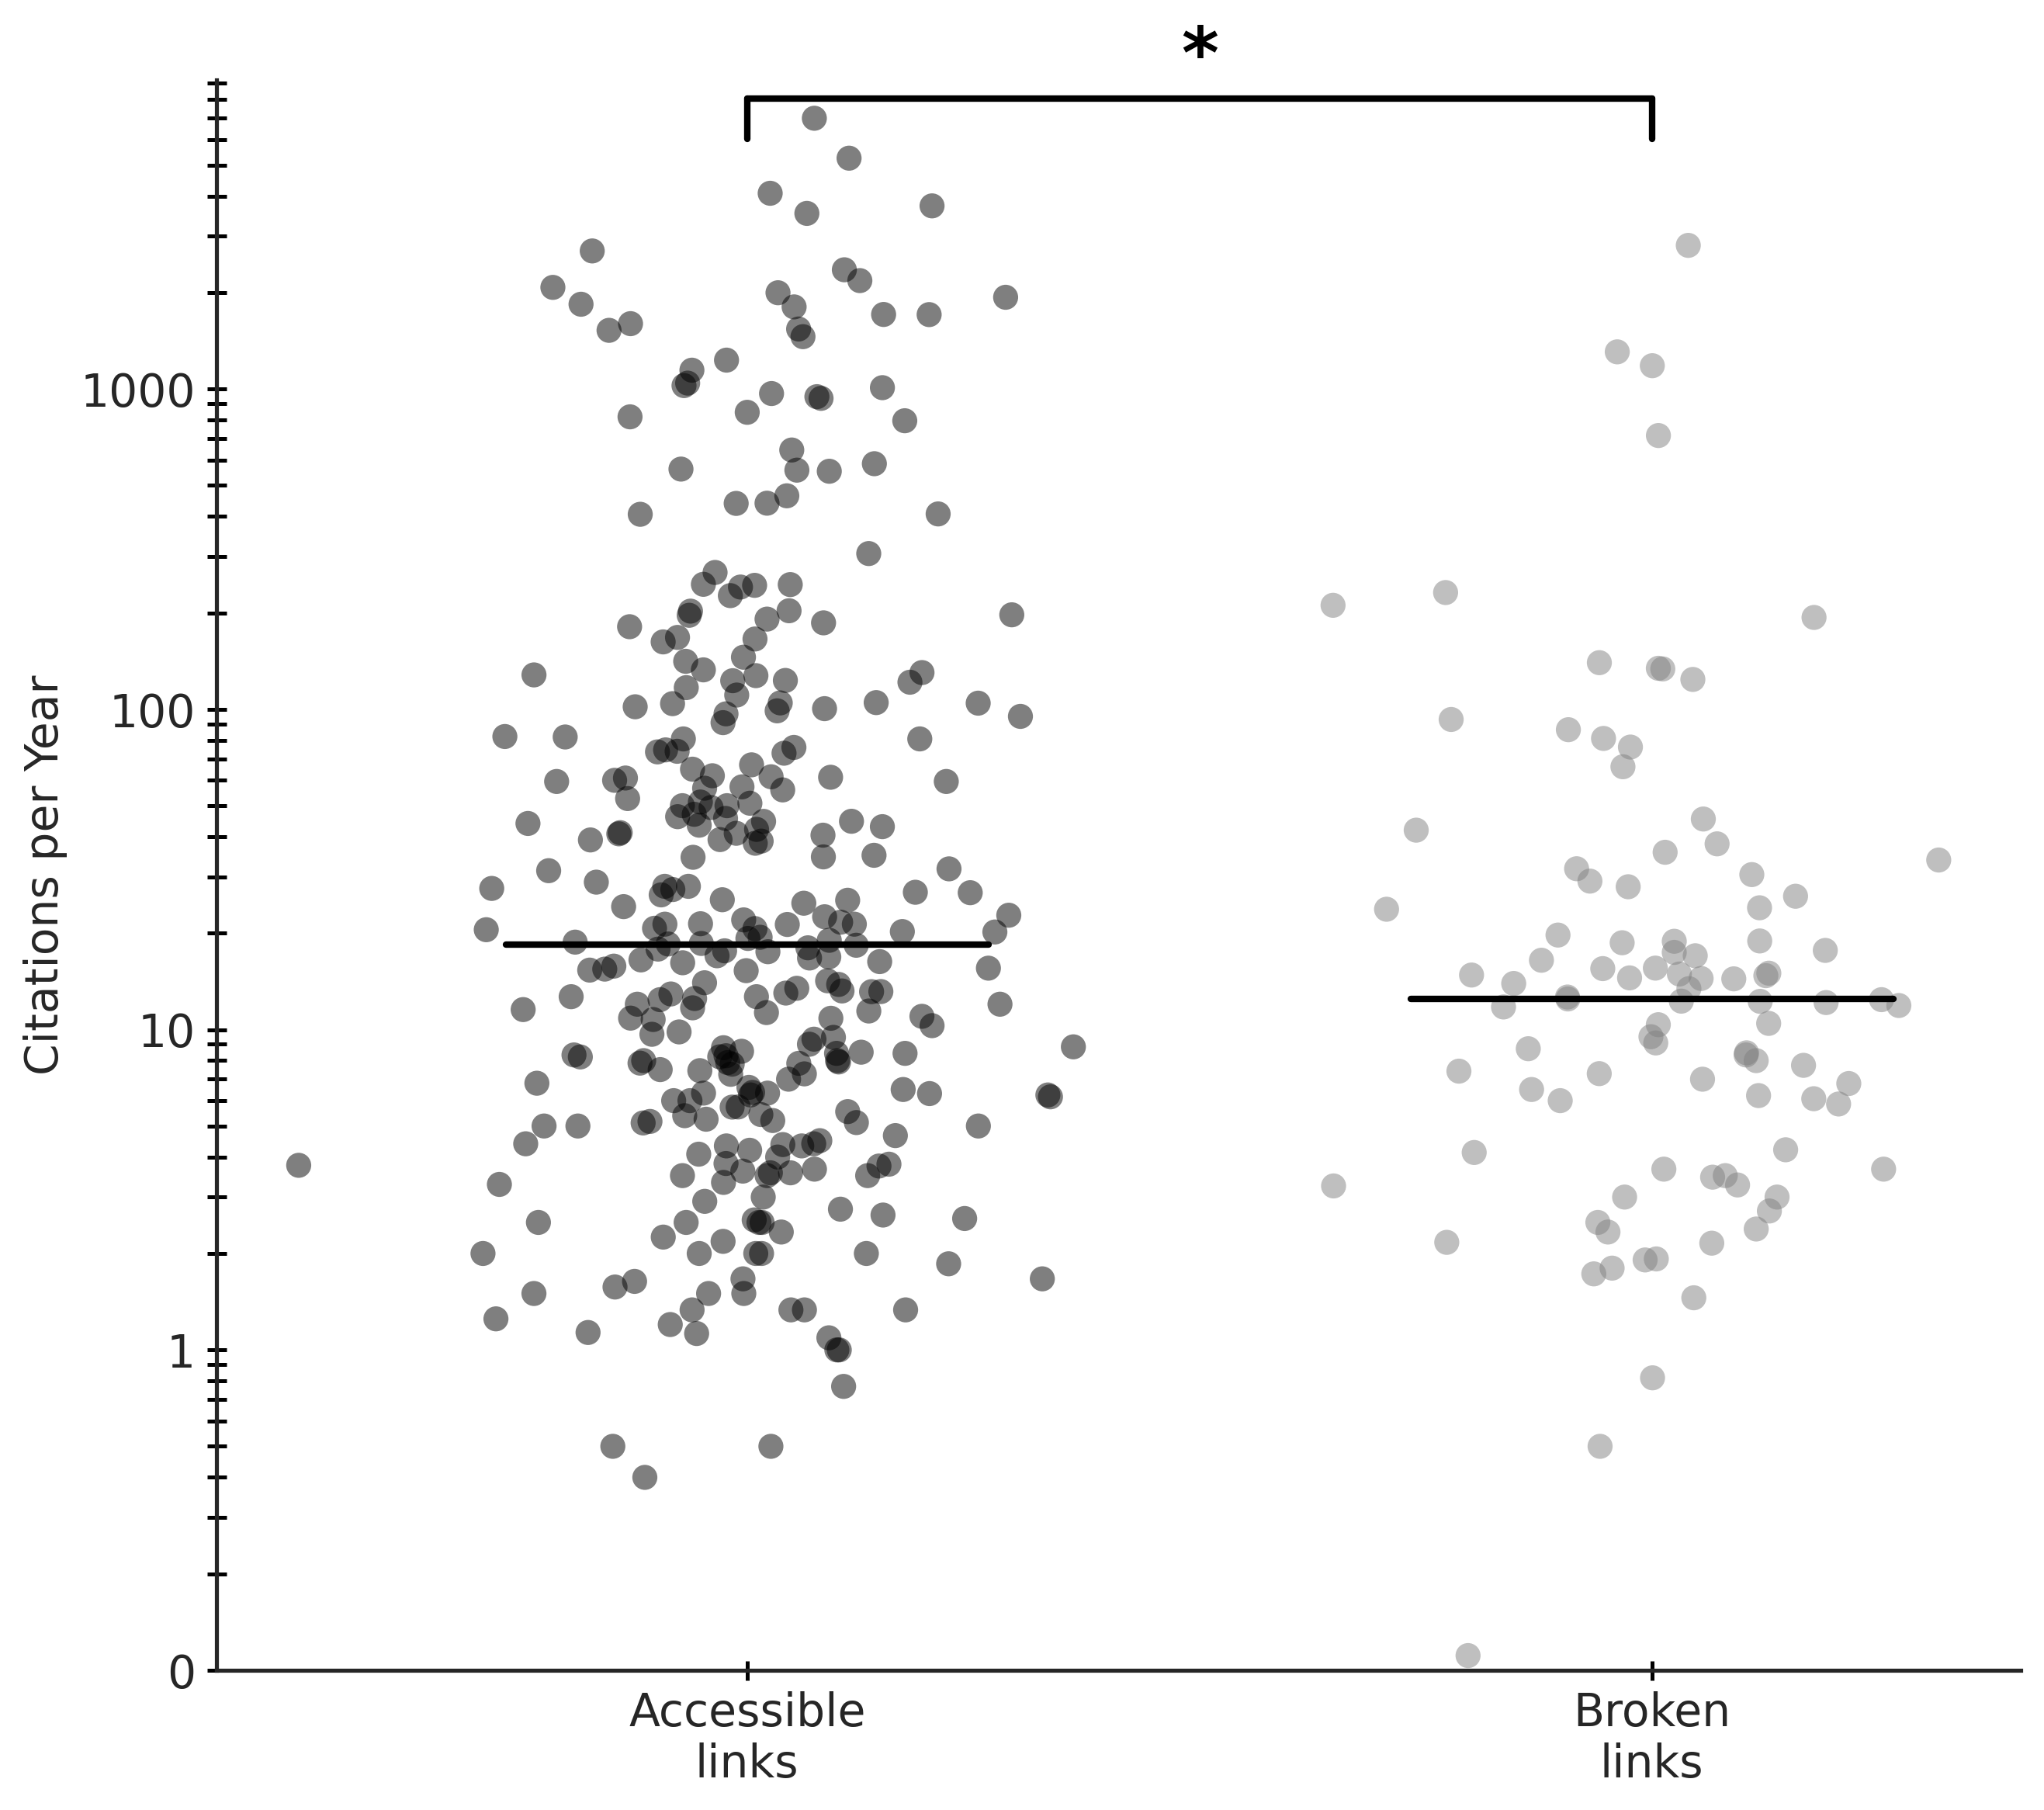

Mann-Whitney U Test Results: (Link Accessibility)
U statistic: 12904.50
P-value: 1.86e-02
Accessible
links: 316
Broken
links: 97
--------------------------------------------------


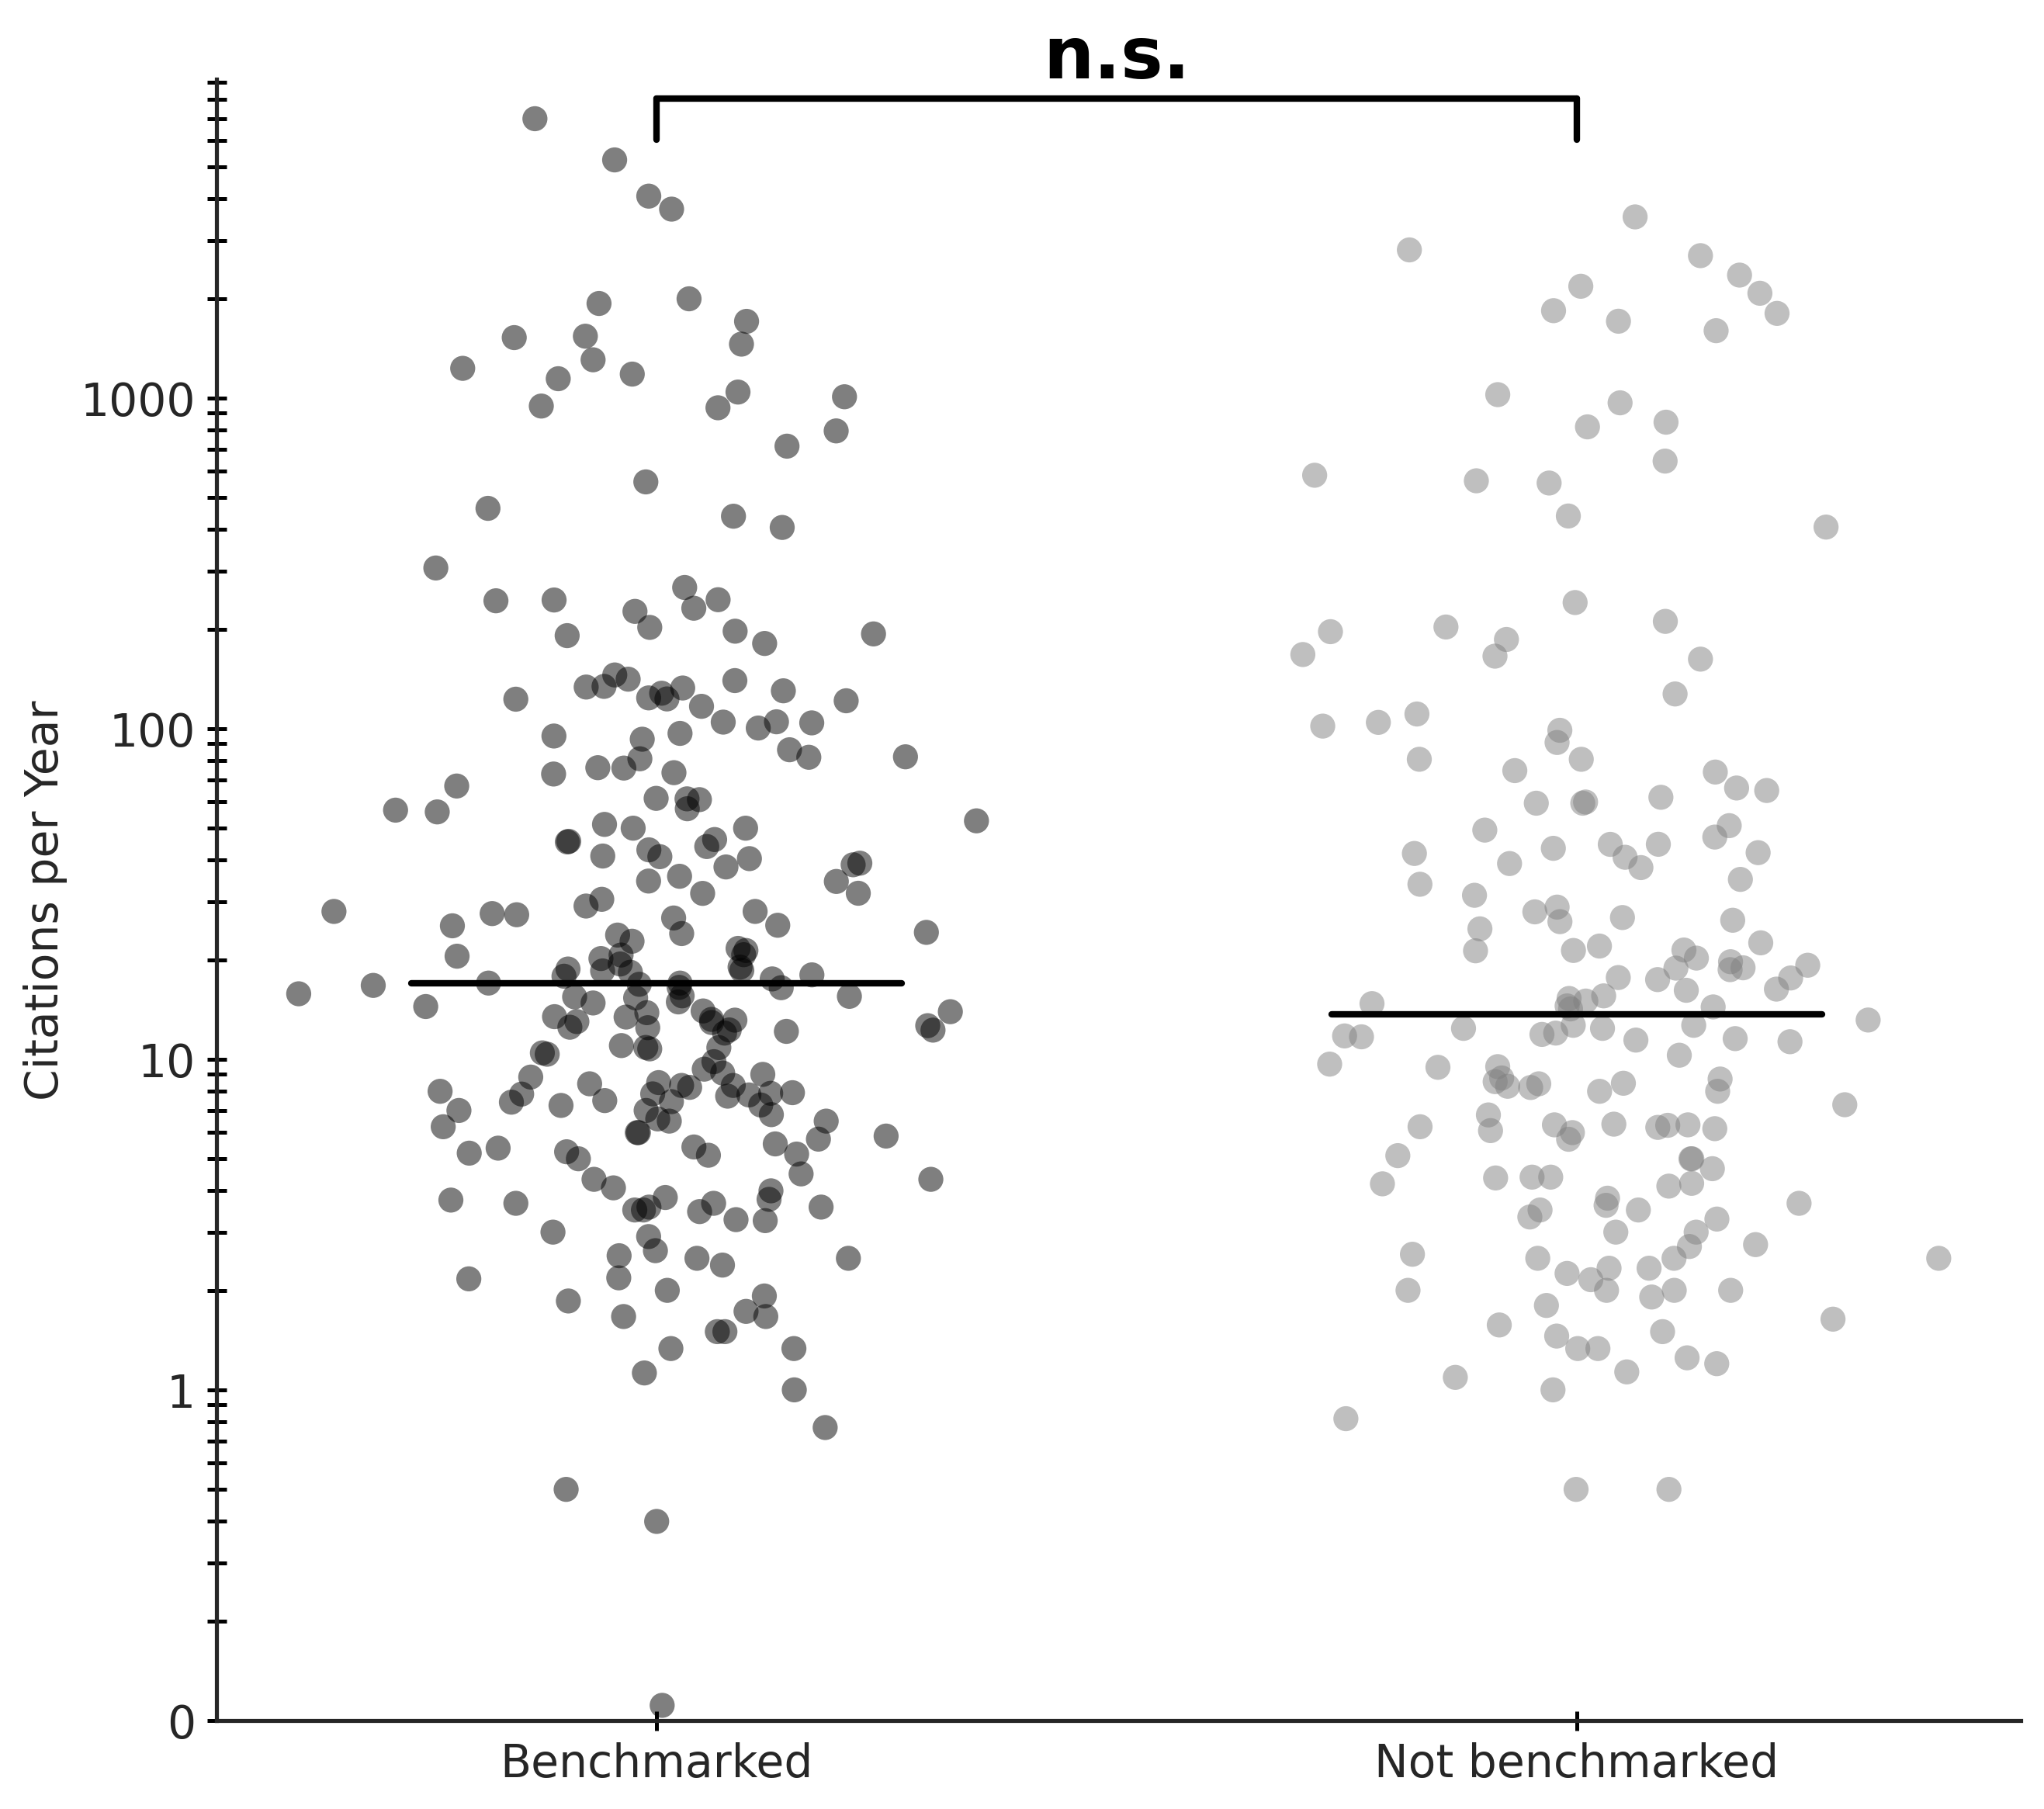

Mann-Whitney U Test Results: (Benchmarking)
U statistic: 18807.00
P-value: 9.74e-02
Benchmarked: 239
Not benchmarked: 174
--------------------------------------------------


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.ticker as mticker

# --- Standardized Style ---
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Load data once ---
df = pd.read_csv('/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv')

# --- Define plot settings for each test ---
tests = [
    {
        'name': 'Package Manager',
        'column': None,
        'new_col': 'Has_Package_Manager',
        'labels': ['Packaged tools', 'Tools\nnot packaged'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d.assign(**{
            'Has_Package_Manager': d[
                [
                    'Package manager availability - Anaconda',
                    'Package manager availability - Bioconductor',
                    'Package manager availability - R package manager (includes CRAN)',
                    'Package manager availability - Python based package manager (includes pypi)',
                    'Package manager availability - Other (homebrew and ubuntu)'
                ]
            ].apply(lambda row: 'Y' if 'Y' in [str(x).upper().strip() for x in row.values] else 'N', axis=1)
        }),
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    },
    {
        'name': 'Docker',
        'column': 'Docker support',
        'labels': ['Containerized tools', 'Tools\nnot containerized'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    },
    {
        'name': 'Multithreading',
        'column': 'Thread availability',
        'labels': ['Multithreading\navailable', 'Tools with\nno multithreading'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    },
    {
        'name': 'User-guides',
        'column': 'Has_Documentation',
        'labels': ['User-guide\navailable', 'No\nUser-guide'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    },
    {
        'name': 'Toy Examples',
        'column': 'Has_Toy_Examples',
        'labels': ['Sample dataset\navailable', 'Sample dataset\nnot available'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    },
    {
        'name': 'Link Accessibility',
        'column': 'Link is Broken',
        'labels': ['Accessible\nlinks', 'Broken\nlinks'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'N',  # "Accessible" means NOT broken!
        'value_for_no': 'Y'
    },
    {
        'name': 'Benchmarking',
        'column': 'Comparison to other tools in the original publication - only note whether benchmarked or not.',
        'labels': ['Benchmarked', 'Not benchmarked'],
        'colors': ['black', 'gray'],
        'prep': lambda d: d,
        'value_for_yes': 'Y',
        'value_for_no': 'N'
    }
]

# --- Preprocessing to standardize columns ---
for col in [
    'Docker support',
    'Thread availability',
    'Has_Documentation',
    'Has_Toy_Examples',
    'Link is Broken',
    'Comparison to other tools in the original publication - only note whether benchmarked or not.'
]:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 'Y' if str(x).upper().strip() in ['Y', 'YES'] else 'N')

# --- Main plotting loop ---
for test in tests:
    # Prepare column if needed (e.g., Has_Package_Manager)
    df_test = test['prep'](df.copy())
    value_col = test['column'] if test['column'] else test['new_col']
    if value_col not in df_test.columns:
        continue

    # Prepare data
    df_test['Citations per year'] = pd.to_numeric(df_test['Citations per year'], errors='coerce')
    df_test = df_test.dropna(subset=['Citations per year'])

    # Order: [available group, unavailable/broken group]
    available = df_test[df_test[value_col] == test['value_for_yes']]['Citations per year']
    unavailable = df_test[df_test[value_col] == test['value_for_no']]['Citations per year']

    # For plotting: replace zeros for log scale
    min_non_zero = df_test[df_test['Citations per year'] > 0]['Citations per year'].min()
    min_non_zero = min_non_zero if pd.notna(min_non_zero) and min_non_zero > 0 else 0.1
    available = available.replace(0, min_non_zero / 10)
    unavailable = unavailable.replace(0, min_non_zero / 10)

    # Mann-Whitney U test
    stat, p = mannwhitneyu(unavailable, available, alternative='two-sided')

    # Plot
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
    group_positions = [1.0, 1.3]
    labels = test['labels']
    colors = test['colors']
    plot_groups = [available, unavailable]

    # Scatter and median
    for i, group in enumerate(plot_groups):
        x = np.random.normal(group_positions[i], 0.04, size=len(group))
        ax.scatter(x, group, color=colors[i], alpha=0.5, s=60, edgecolor='none', zorder=2)
        median = np.median(group)
        ax.plot([group_positions[i] - 0.08, group_positions[i] + 0.08], [median, median], color='black', linewidth=2, zorder=3)

    # Axis setup
    ax.set_yscale('log')
    ax.set_ylabel('Citations per Year', fontsize=LABEL_FONT_SIZE)
    ax.set_xlabel('', fontsize=LABEL_FONT_SIZE)
    ax.set_xticks(group_positions)
    ax.set_xticklabels(labels, fontsize=LABEL_FONT_SIZE)

    # Ticks
    ax.tick_params(axis='x', which='both', direction='inout', length=6, width=1.2, color='black', bottom=True, labelsize=LABEL_FONT_SIZE)
    ax.tick_params(axis='y', which='both', direction='inout', length=6, width=1.2, color='black', left=True, labelsize=LABEL_FONT_SIZE)

    # Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

    # Y-ticks
    yticks = [0.1, 1, 10, 100, 1000, 10000]
    ax.set_yticks(yticks)
    ax.get_yaxis().set_major_formatter(mticker.ScalarFormatter())

    # Significance annotation
    all_y = np.concatenate(plot_groups)
    max_dot = np.max(all_y)
    bar_y = max_dot * 1.15
    star_y = max_dot * 1.20
    ax.set_ylim(min(yticks), star_y * 1.10)

    ax.plot([group_positions[0], group_positions[1]], [bar_y, bar_y], color='black', lw=2)
    tick_height = 0.75
    ax.plot([group_positions[0], group_positions[0]], [bar_y * tick_height, bar_y], color='black', lw=2)
    ax.plot([group_positions[1], group_positions[1]], [bar_y * tick_height, bar_y], color='black', lw=2)

    if p < 0.0001:
        star_label = '****'
    elif p < 0.001:
        star_label = '***'
    elif p < 0.01:
        star_label = '**'
    elif p < 0.05:
        star_label = '*'
    else:
        star_label = 'n.s.'
    ax.text(np.mean(group_positions), star_y, star_label,
            ha='center', va='bottom', color='black', fontsize=22, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print results
    print(f"Mann-Whitney U Test Results: ({test['name']})")
    print(f"U statistic: {stat:.2f}")
    print(f"P-value: {p:.2e}")
    print(f"{labels[0]}: {len(available)}")
    print(f"{labels[1]}: {len(unavailable)}")
    print('-' * 50)


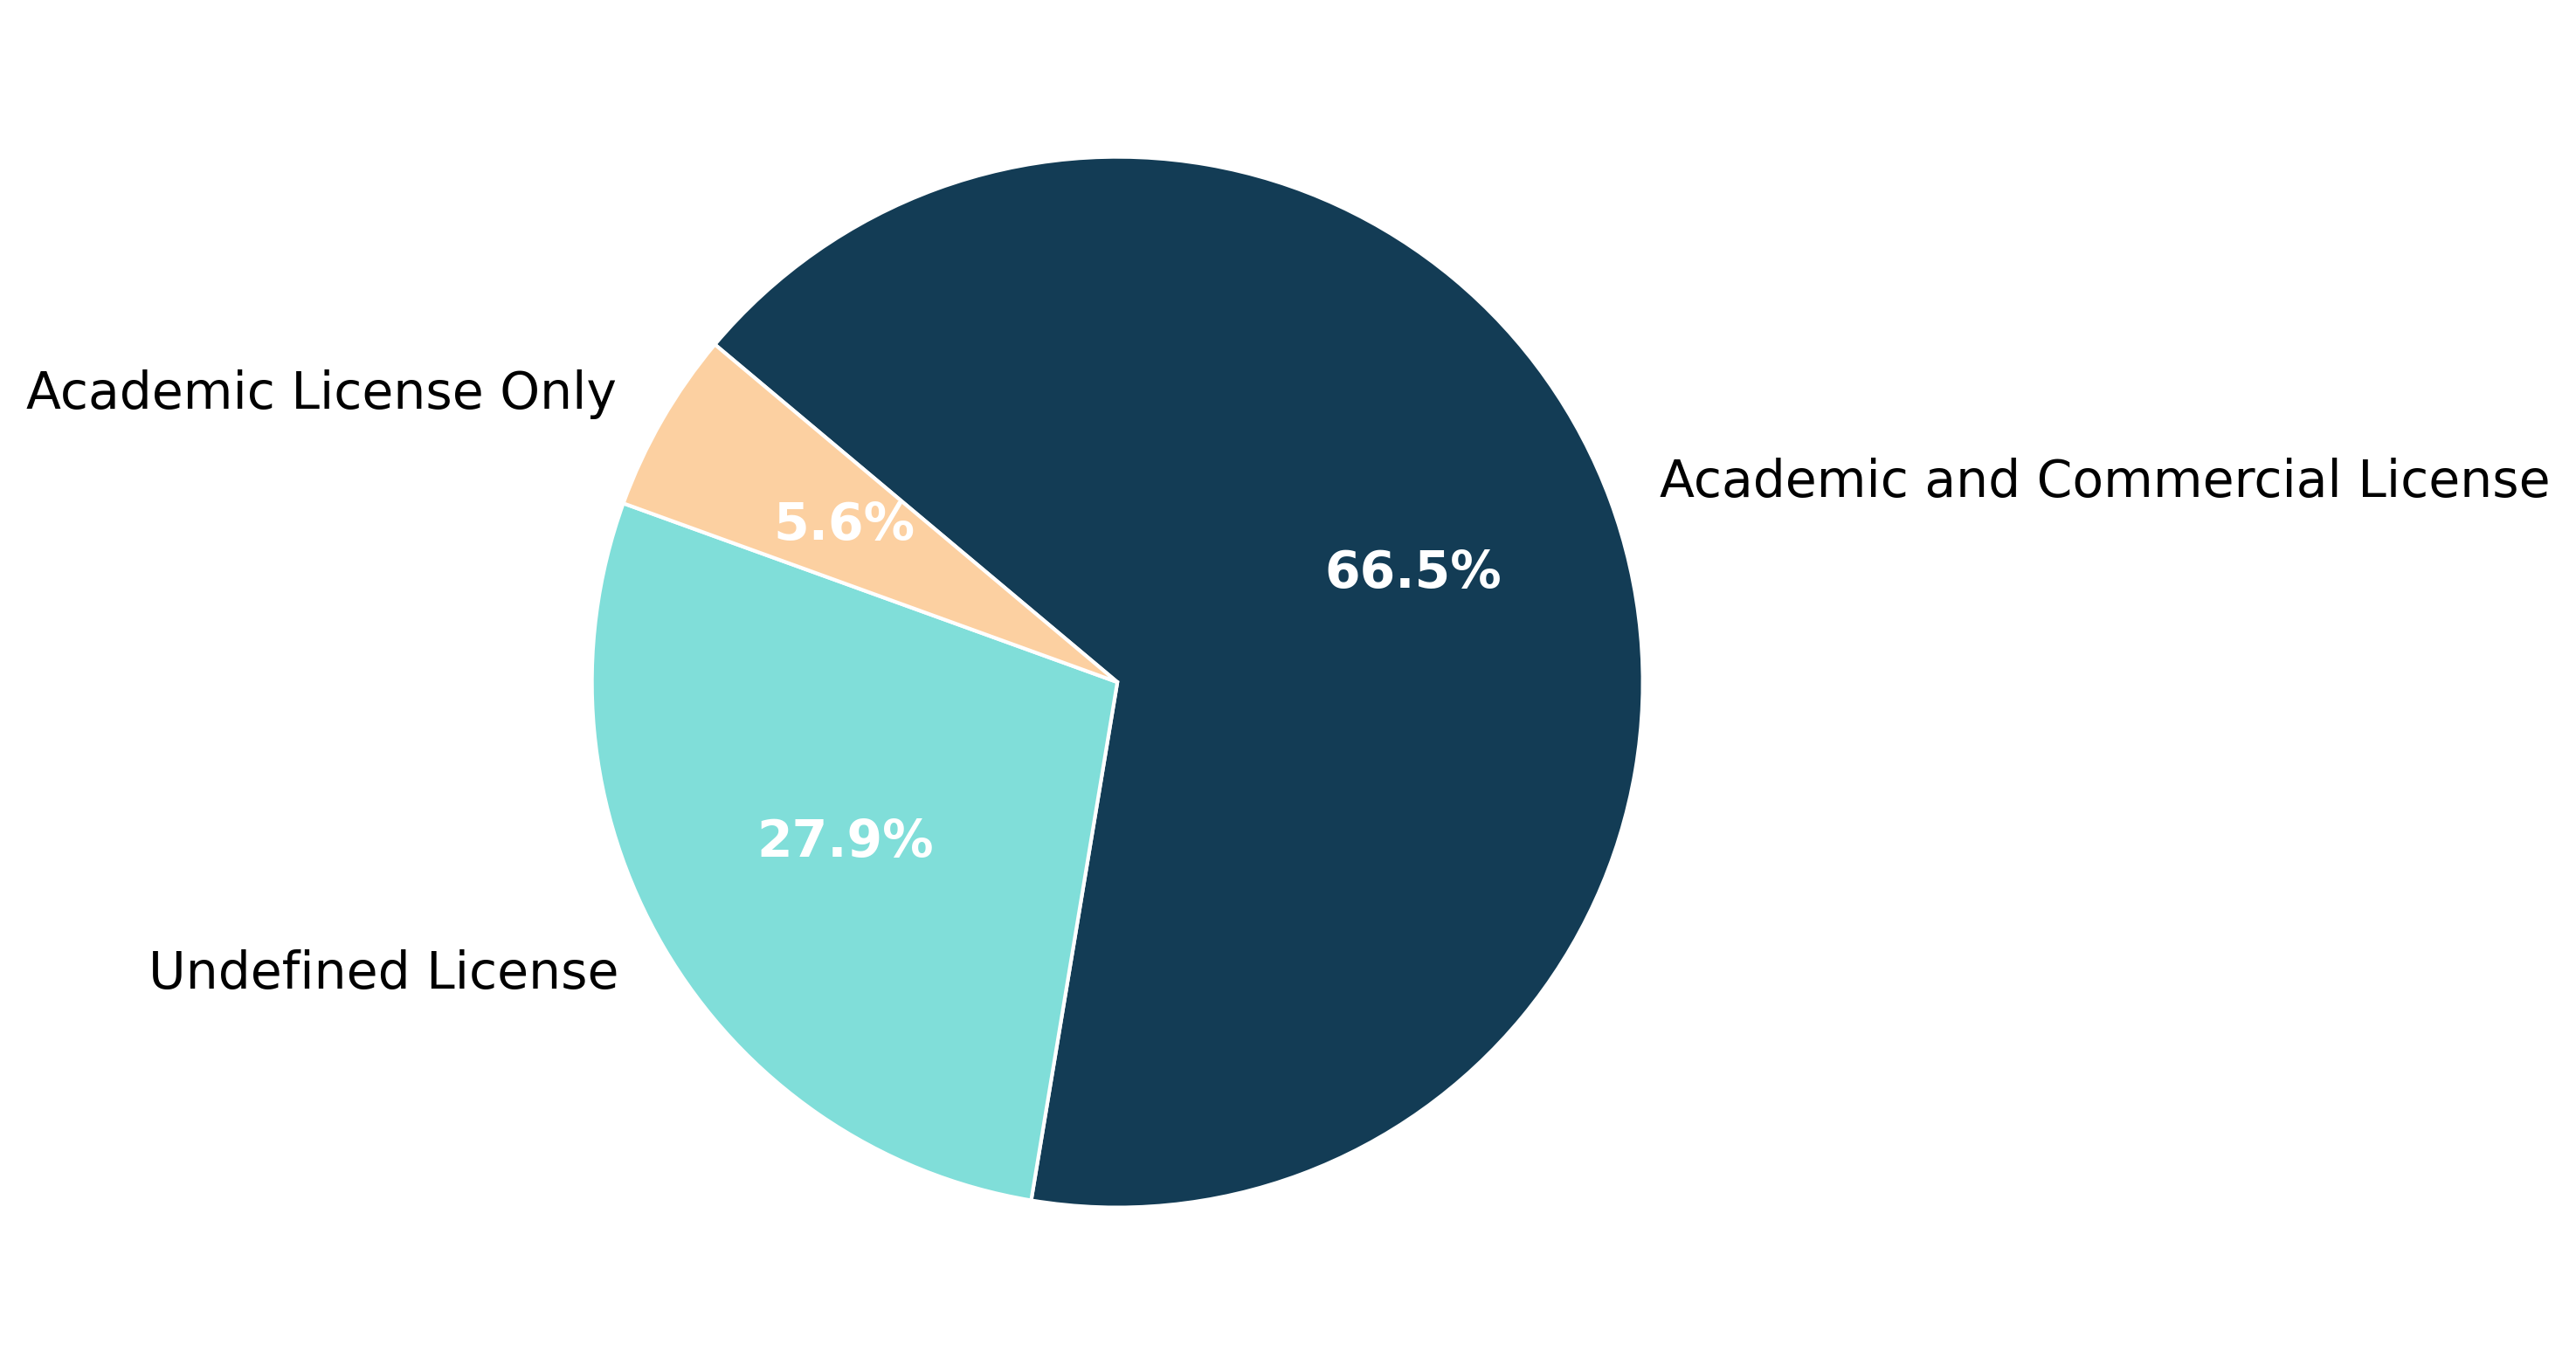

=== License Categories Breakdown ===

▶ Academic and Commercial License (286 tools):
   - GPL (124 tools)
   - MIT (64 tools)
   - GPL  (15 tools)
   - BSD (10 tools)
   - Artistic-2.0 (6 tools)
   - Artistic 2.0 (6 tools)
   - Apache 2.0 (6 tools)
   - MIT  (5 tools)
   - Free (4 tools)
   - LGPL (4 tools)
   - GNU (4 tools)
   - BSD  (3 tools)
   - GNU  (3 tools)
   - AGPL (3 tools)
   - Apache-2.0  (2 tools)
   - Boost Software License (2 tools)
   - MIT License (2 tools)
   - BDS (2 tools)
   - Free  (1 tools)
   - Mozilla Public License 1.1 (1 tools)
   - Creative Commons Attribution License (1 tools)
   - MIT license (1 tools)
   - BSD, GPL-3 (1 tools)
   - Creative Commons 3.0 (1 tools)
   - EUPL  (1 tools)
   - Creative Commons 1.0 (1 tools)
   - BCCA  (1 tools)
   - Creative Commons  (1 tools)
   - MiLaboratories Inc. (1 tools)
   - Creative Commons License (1 tools)
   - Artistic License (1 tools)
   - BSD   (1 tools)
   - Artistic license (1 tools)
   - BSL (1 tools)
   - Cr

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Standardized Style ---
LABEL_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': LABEL_FONT_SIZE,
    'ytick.labelsize': LABEL_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# Load dataset
file_path = '/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv'
df = pd.read_csv(file_path)

# Normalize license column
df['License_clean'] = df['License'].astype(str).str.strip().str.lower()

# Classification map (exact matches)
license_map = {
    # Academic Only
    'academic': 'Academic License Only',
    'copyright': 'Academic License Only',
    'ludwig institute for cancer research ltd': 'Academic License Only',
    'the university of texas southwestern medical center': 'Academic License Only',
    'the broad institute, inc.': 'Academic License Only',
    'the university of north carolina at chapel hill': 'Academic License Only',
    'university of pennsylvania copyright': 'Academic License Only',
    'bc cancer agency': 'Academic License Only',
    '"oregon state university all rights reserved."': 'Academic License Only',
    'ucsc university license': 'Academic License Only',
    'ucsf license for academic and non-profit use': 'Academic License Only',
    'cc by-nc-sa 4.0': 'Academic License Only',

    # Academic and Commercial
    'gpl': 'Academic and Commercial License',
    'gnu': 'Academic and Commercial License',
    'lgpl': 'Academic and Commercial License',
    'agpl': 'Academic and Commercial License',
    'mit': 'Academic and Commercial License',
    'bsd': 'Academic and Commercial License',
    'bds': 'Academic and Commercial License',
    'apache': 'Academic and Commercial License',
    'artistic': 'Academic and Commercial License',
    'mozilla public license': 'Academic and Commercial License',
    'boost software license': 'Academic and Commercial License',
    'bsl': 'Academic and Commercial License',
    'eupl': 'Academic and Commercial License',
    'cecill': 'Academic and Commercial License',
    'free': 'Academic and Commercial License',
    'free ': 'Academic and Commercial License',
    'common public license': 'Academic and Commercial License',
    'milaboratories inc.': 'Academic and Commercial License',
    'creative commons attribution license': 'Academic and Commercial License',
    'creative commons 3.0': 'Academic and Commercial License',
    'creative commons 1.0': 'Academic and Commercial License',
    'creative commons': 'Academic and Commercial License',
    'creative commons license': 'Academic and Commercial License',
    'creative commons license ': 'Academic and Commercial License',
    'bcca': 'Academic and Commercial License',

    # Undefined
    'n': 'Undefined License',
    'no license': 'Undefined License',
    'none': 'Undefined License',
    'na': 'Undefined License',
    'nan': 'Undefined License',
    '': 'Undefined License'
}

def classify_license(license_str):
    key = str(license_str).strip().lower()
    if key in license_map:
        return license_map[key]
    # Pattern-based mapping
    if any(word in key for word in ['gpl', 'gnu', 'lgpl', 'agpl']):
        return 'Academic and Commercial License'
    if key.startswith('mit'):
        return 'Academic and Commercial License'
    if 'bsd' in key or 'bds' in key:
        return 'Academic and Commercial License'
    if 'apache' in key:
        return 'Academic and Commercial License'
    if 'artistic' in key:
        return 'Academic and Commercial License'
    if 'mozilla public license' in key:
        return 'Academic and Commercial License'
    if 'boost software license' in key or key == 'bsl':
        return 'Academic and Commercial License'
    if 'eupl' in key:
        return 'Academic and Commercial License'
    if 'cecill' in key:
        return 'Academic and Commercial License'
    if 'non-commercial' in key or 'non commercial' in key or 'trinity software license' in key:
        return 'Academic License Only'
    return 'Undefined License'

df['License_use_rights'] = df['License_clean'].apply(classify_license)

# Count categories
category_counts = df['License_use_rights'].value_counts()
labels = category_counts.index.tolist()
sizes = category_counts.values.tolist()

# Define corresponding colors
color_map = {
    'Academic and Commercial License': '#133C55',
    'Academic License Only': '#FCD0A1',
    'Undefined License': '#80DED9'
}
colors = [color_map[label] for label in labels]

# --- Plot Pie Chart ---
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}%' if pct > 2 else '',
    startangle=140,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': LABEL_FONT_SIZE, 'color': 'black'}
)

# Customize percentage font: white, bold, size 12
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(LABEL_FONT_SIZE)

plt.tight_layout()
plt.show()

# === Print Breakdown of Each Category ===
print("=== License Categories Breakdown ===\n")
for category in ['Academic and Commercial License', 'Academic License Only', 'Undefined License']:
    matched = df[df['License_use_rights'] == category]['License'].value_counts()
    print(f"▶ {category} ({matched.sum()} tools):")
    for lic, count in matched.items():
        print(f"   - {lic} ({count} tools)")
    print()

print("--- End of Breakdown ---")


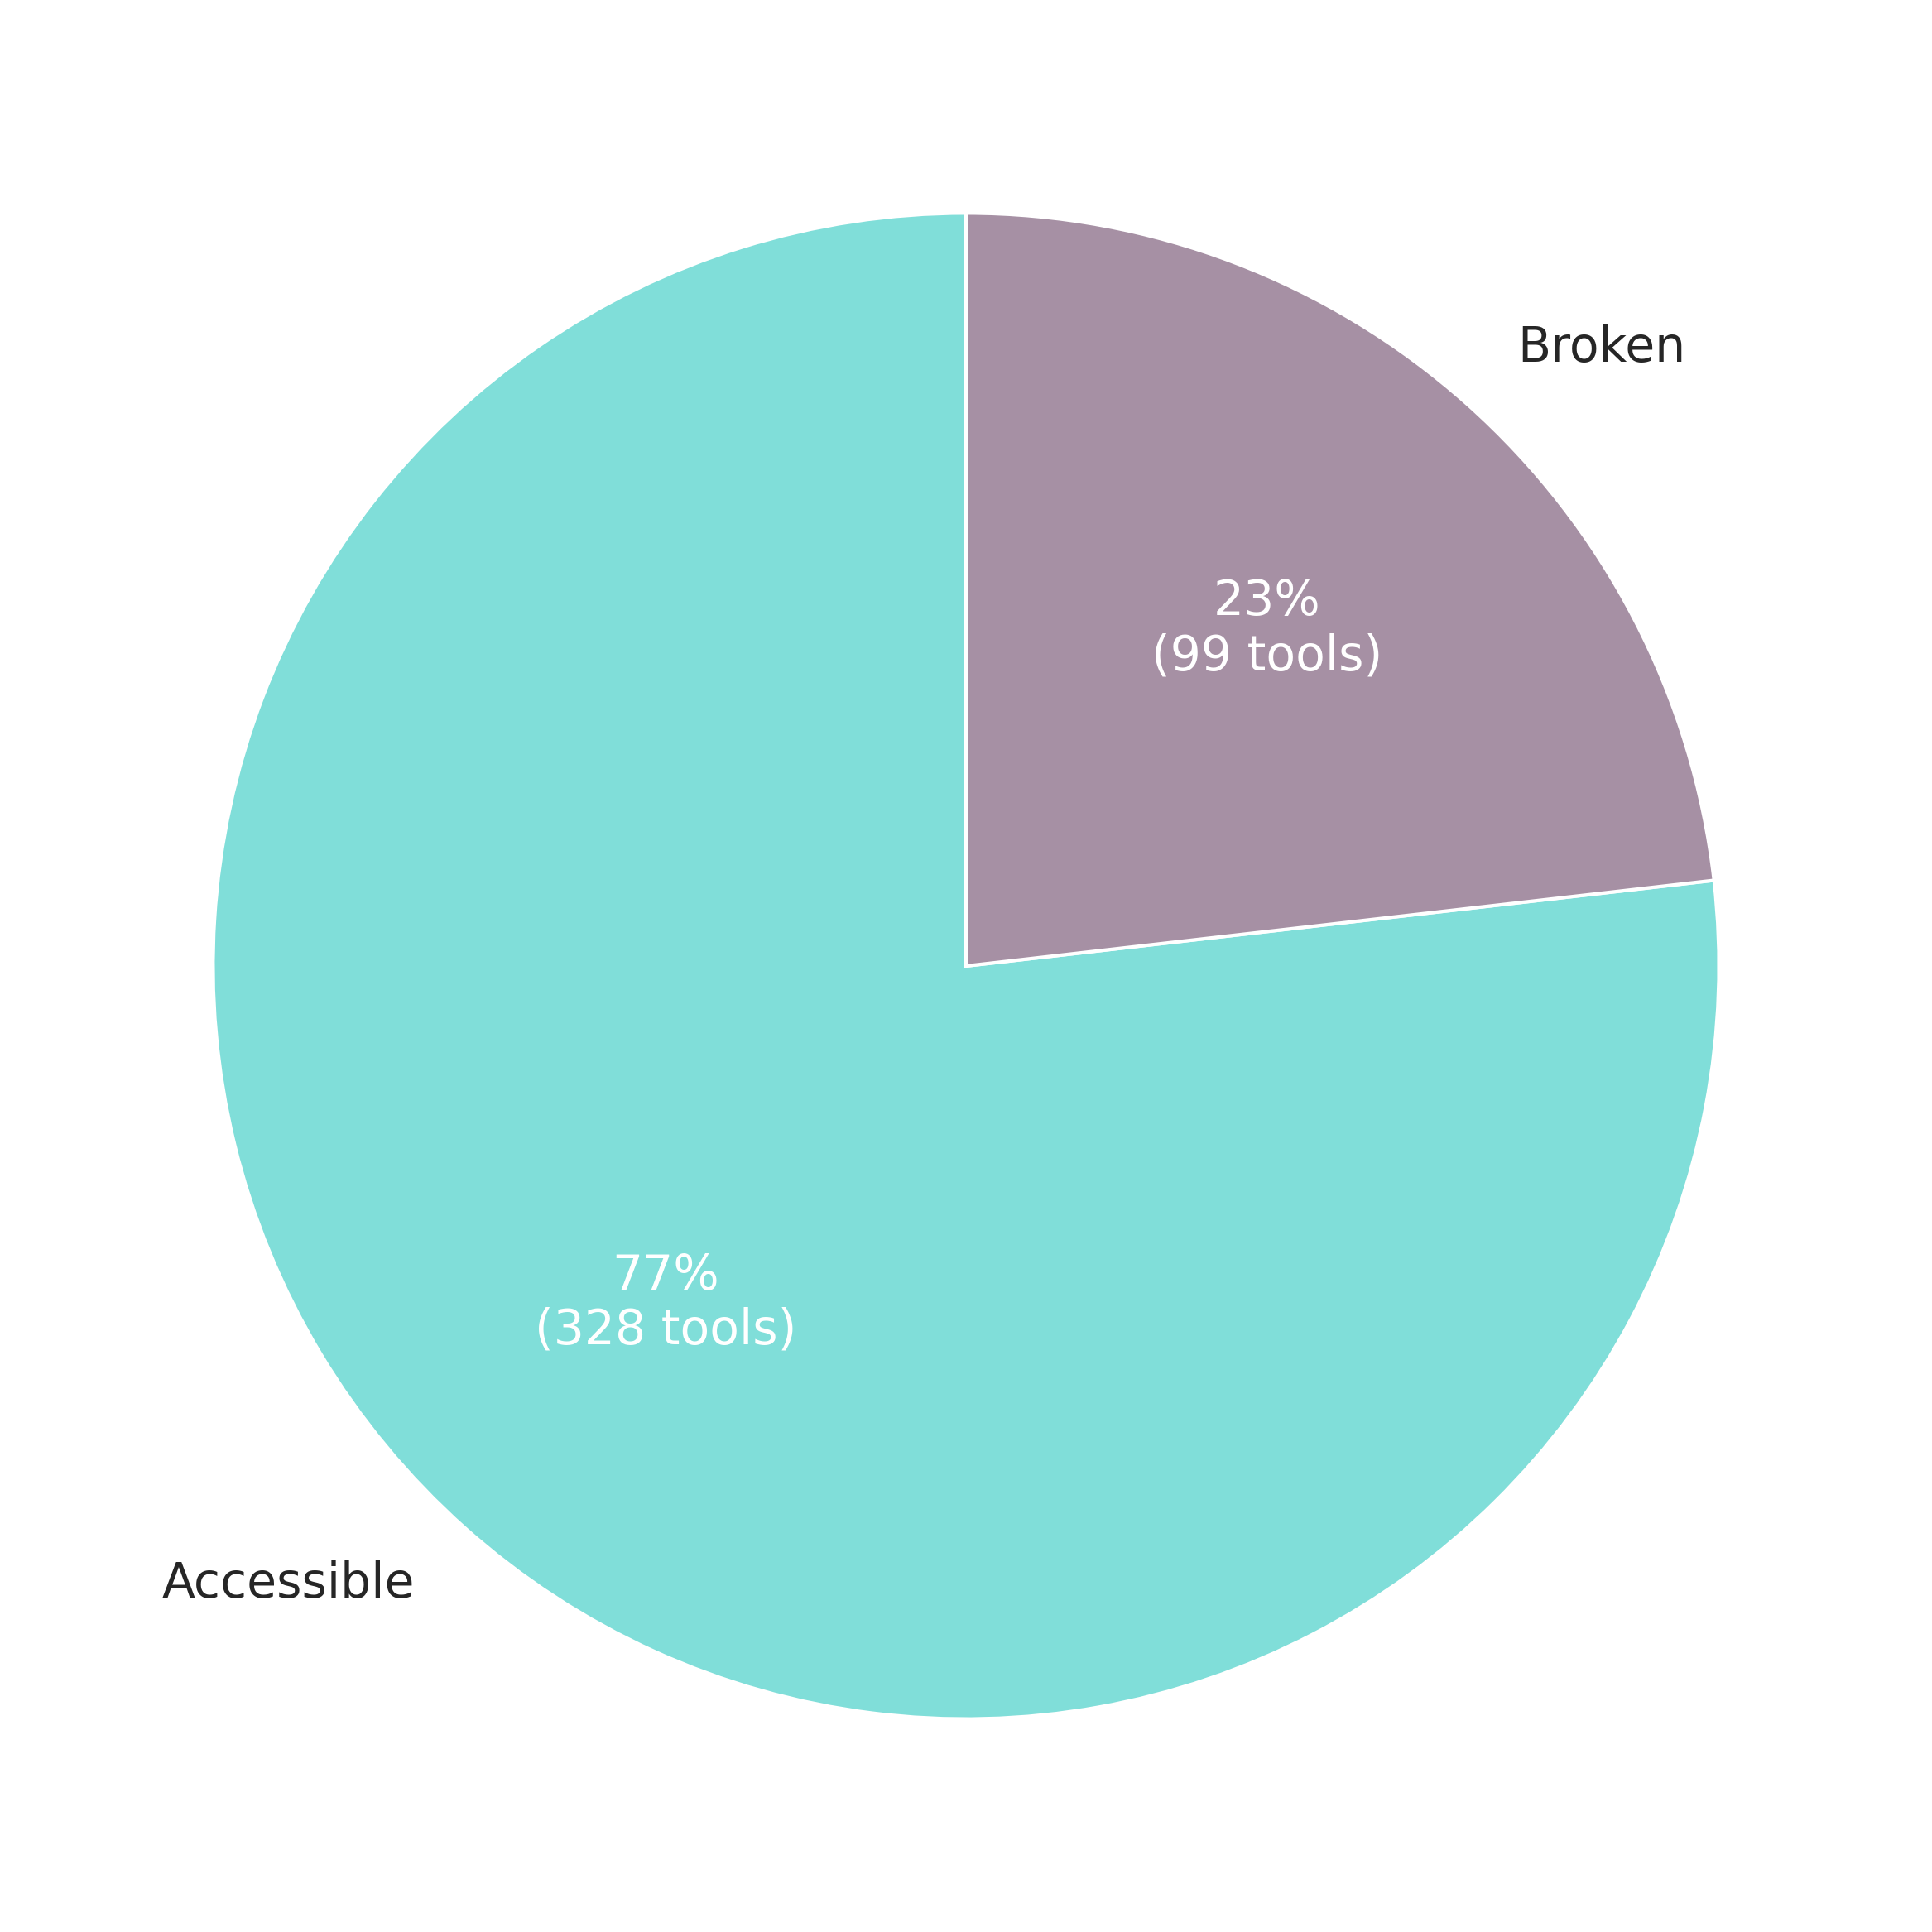

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Standardized Style ---
LABEL_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': LABEL_FONT_SIZE,
    'ytick.labelsize': LABEL_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# Load and clean data
df = pd.read_csv('/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv')
df['Link is Broken'] = df['Link is Broken'].str.upper().str.strip().fillna('N')
link_counts = df['Link is Broken'].value_counts()
link_status = link_counts.reindex(['N', 'Y'], fill_value=0)  # N = accessible, Y = broken

labels = ['Accessible', 'Broken']
values = [link_status['N'], link_status['Y']]
pie_colors = ['#80DED9', '#A690A4']

# Pie chart
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    colors=pie_colors,
    startangle=90,
    autopct=lambda pct: f'{int(round(pct))}%\n({int(round(pct/100*sum(values)))} tools)',
    textprops={'fontsize': LABEL_FONT_SIZE},
    wedgeprops=dict(edgecolor='white', linewidth=1)
)

for autotext in autotexts:
    autotext.set_color('white')

plt.tight_layout()
plt.show()


/tmp/ipython-input-12-169645917.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cmd_tools[col] = cmd_tools[col].astype(str).str.lower().str.strip().map({'y': True, 'n': False, 'yes': True, 'no': False}).fillna(False)


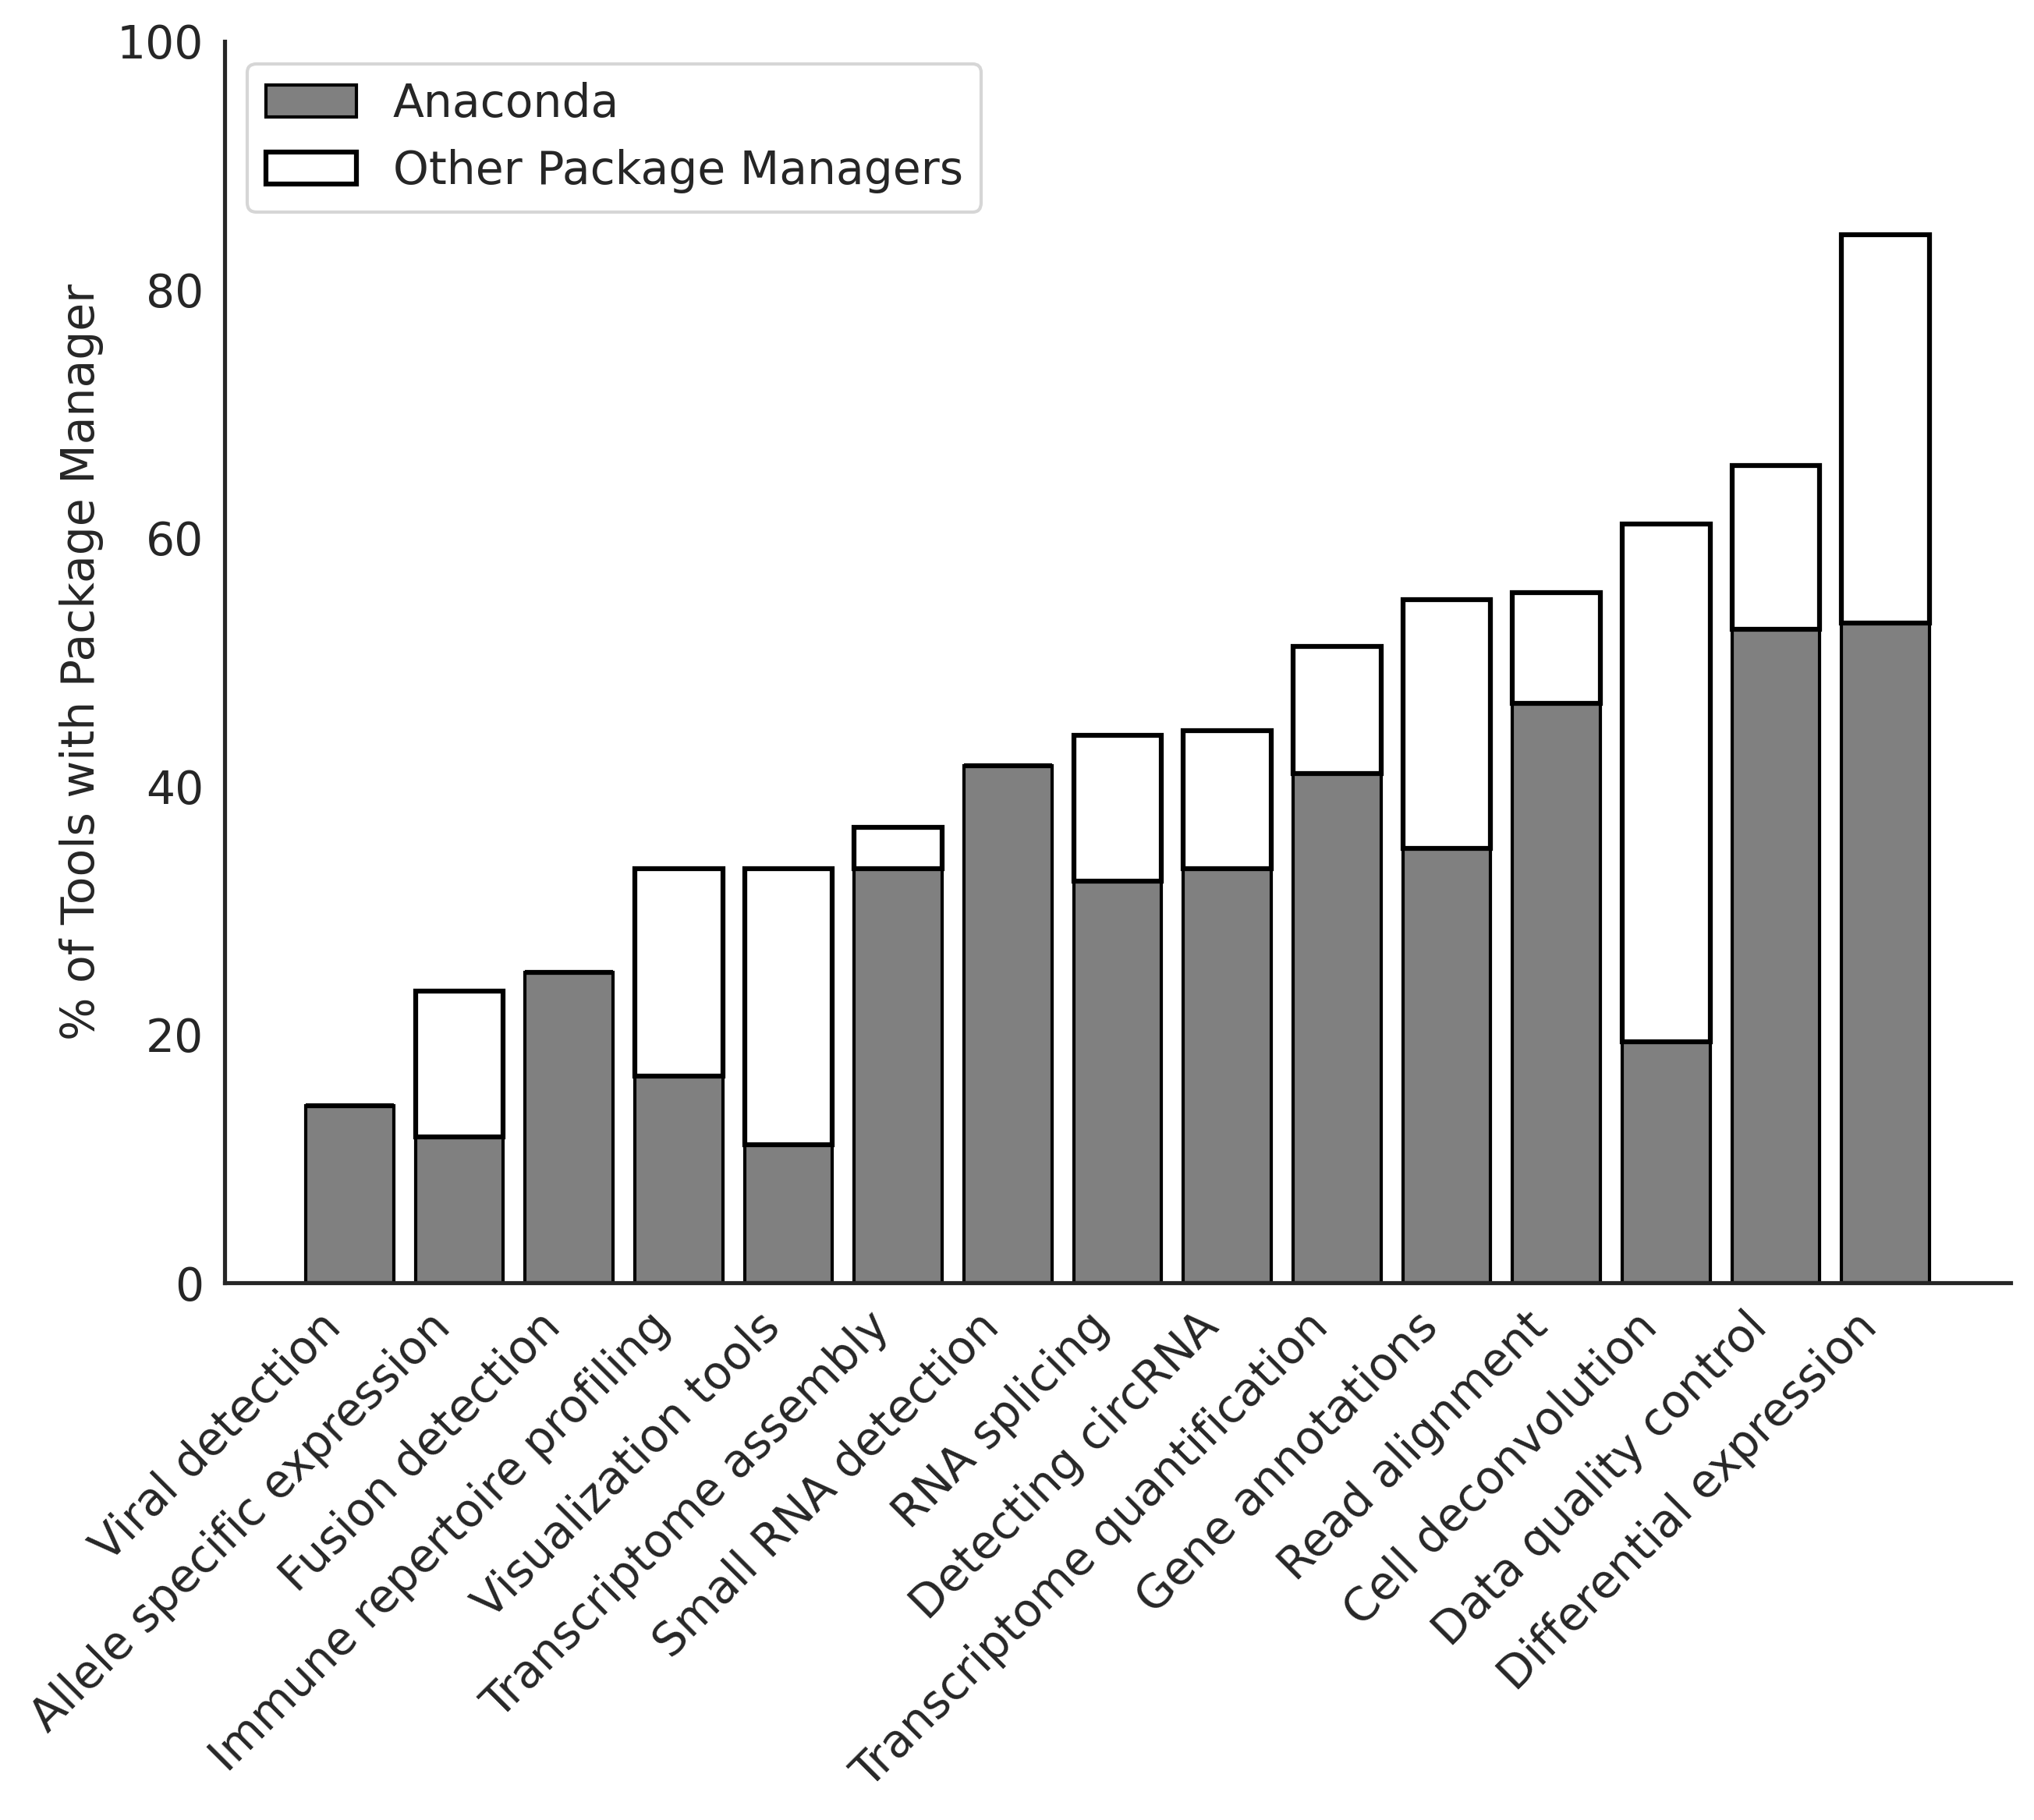

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Formatting ---
LABEL_FONT_SIZE = 14
TICK_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': TICK_FONT_SIZE,
    'ytick.labelsize': TICK_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Load and Clean Data ---
file_path = '/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Domain'] = df['Domain'].str.replace(r'^[a-zA-Z]\.\s*', '', regex=True).str.strip()

# Keep only command-line tools
df['Command-line'] = df['Command-line'].astype(str).str.strip().str.lower().map({'y': True, 'n': False, 'yes': True, 'no': False})
cmd_tools = df[df['Command-line'] == True].copy()

# Standardize package manager columns
package_cols = {
    'Anaconda': 'Package manager availability - Anaconda',
    'Bioconductor': 'Package manager availability - Bioconductor',
    'CRAN': 'Package manager availability - R package manager (includes CRAN)',
    'PyPI': 'Package manager availability - Python based package manager (includes pypi)',
    'Other': 'Package manager availability - Other (homebrew and ubuntu)'
}
for col in package_cols.values():
    cmd_tools[col] = cmd_tools[col].astype(str).str.lower().str.strip().map({'y': True, 'n': False, 'yes': True, 'no': False}).fillna(False)

# Assign categories
def classify_pm(row):
    if row[package_cols['Anaconda']]:
        return 'Anaconda'
    elif any([row[package_cols[c]] for c in ['Bioconductor', 'CRAN', 'PyPI', 'Other']]):
        return 'Other_PM'
    else:
        return 'None'

cmd_tools['PM_Category'] = cmd_tools.apply(classify_pm, axis=1)

# Counts and percentages
total_tools = cmd_tools.groupby('Domain').size()
pm_counts = cmd_tools.groupby(['Domain', 'PM_Category']).size().unstack(fill_value=0)

combined = pd.DataFrame({
    'Anaconda': pm_counts.get('Anaconda', 0),
    'Other_PM': pm_counts.get('Other_PM', 0),
    'None': pm_counts.get('None', 0),
    'Total': total_tools
})
combined['Anaconda_pct'] = combined['Anaconda'] / combined['Total'] * 100
combined['Other_PM_pct'] = combined['Other_PM'] / combined['Total'] * 100
combined['None_pct'] = combined['None'] / combined['Total'] * 100

# Sort by % tools with any PM
combined['Total_PM'] = combined['Anaconda_pct'] + combined['Other_PM_pct']
combined = combined.sort_values('Total_PM', ascending=True)
fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)

# Plot Anaconda (bottom layer)
bars1 = ax.bar(
    combined.index,
    combined['Anaconda_pct'],
    color='gray',
    edgecolor='black',
    linewidth=1,
    label='Anaconda'
)

# Plot Other Package Managers (middle layer)
bars2 = ax.bar(
    combined.index,
    combined['Other_PM_pct'],
    bottom=combined['Anaconda_pct'],
    color='white',
    edgecolor='black',
    linewidth=1.5,
    label='Other Package Managers',
    zorder=3
)

# Plot None (blank top area)
bars3 = ax.bar(
    combined.index,
    combined['None_pct'],
    bottom=combined['Anaconda_pct'] + combined['Other_PM_pct'],
    color='none',
    edgecolor='none'
)

# Axis & formatting
ax.set_ylabel('% of Tools with Package Manager')
ax.set_ylim(0, 100)
ax.set_xticks(range(len(combined)))
ax.set_xticklabels(combined.index, rotation=45, ha='right')

# Ticks & spines
ax.tick_params(axis='x', direction='inout', length=6, width=1)
ax.tick_params(axis='y', direction='inout', length=6, width=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()



/tmp/ipython-input-13-1050057814.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[manager] = data[col].astype(str).str.lower().map({'y': True, 'n': False, 'yes': True, 'no': False}).fillna(False)


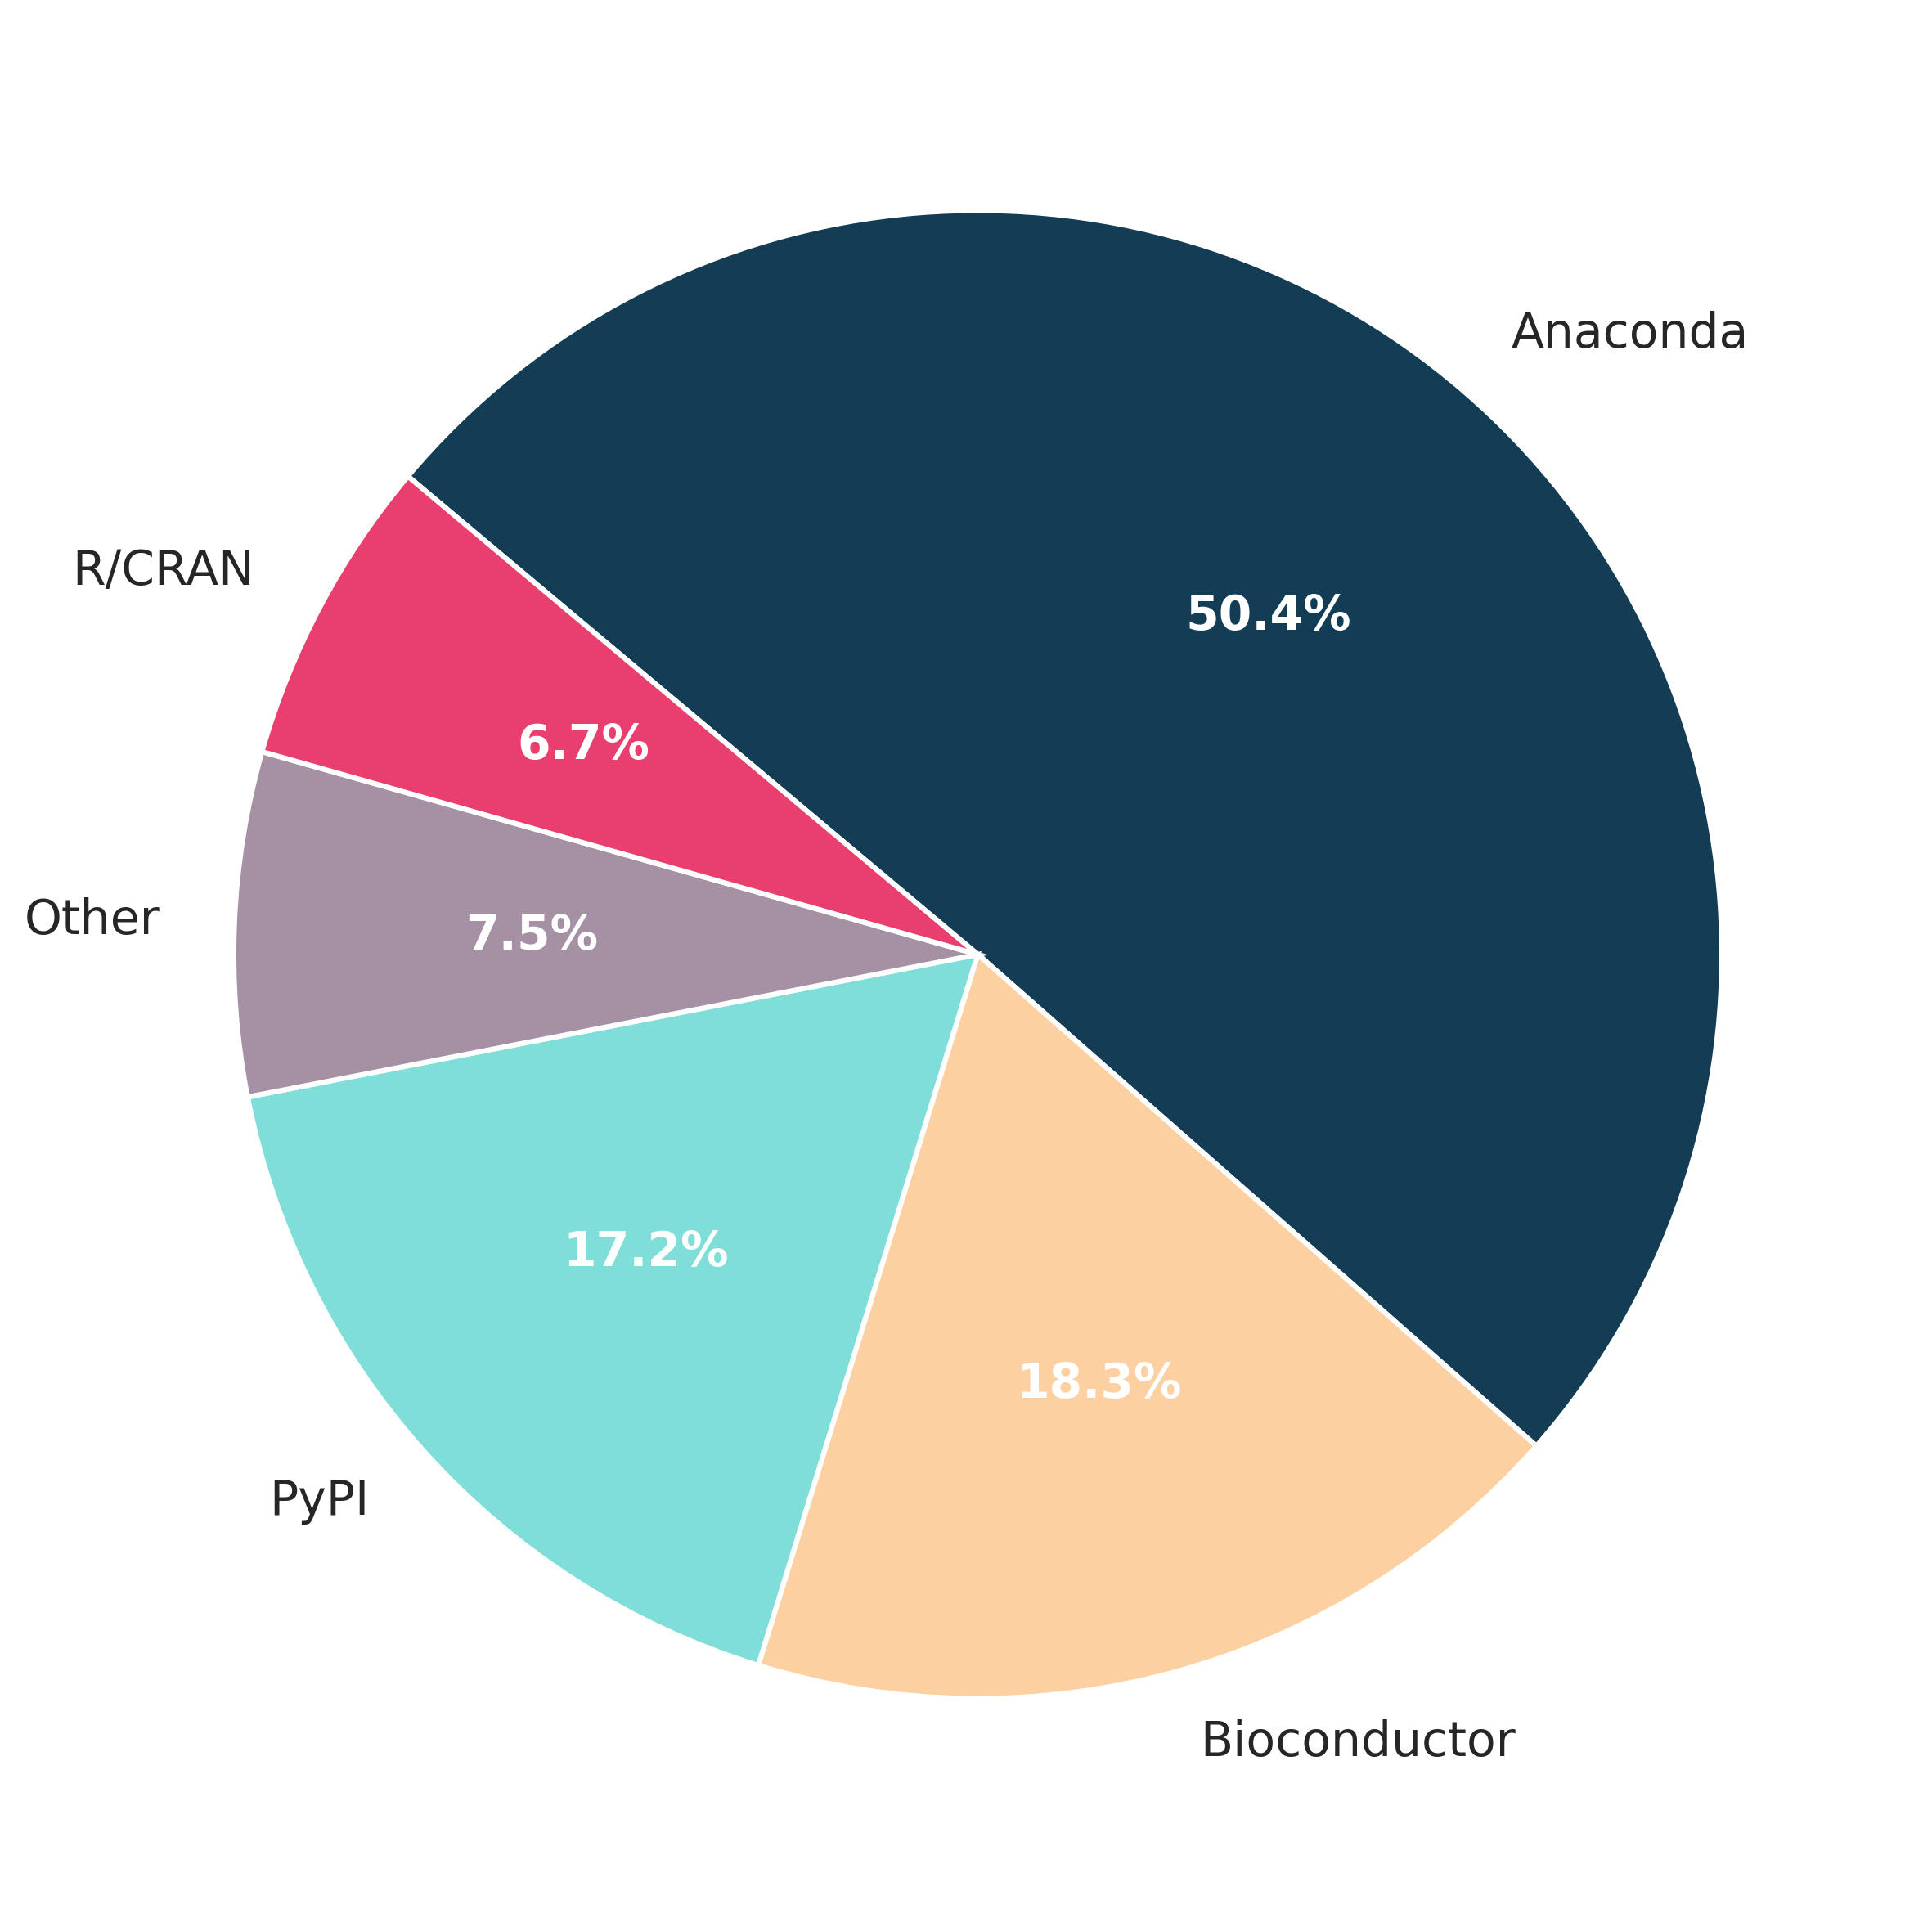

The domain with the highest number of tools supporting Anaconda is 'Data quality control' with 21 tools.
On average, each domain has 9.00 tools that support Anaconda.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Standardized Style ---
LABEL_FONT_SIZE = 14
FONT_FAMILY = 'DejaVu Sans'
FIG_SIZE = (9, 8)

plt.rcParams.update({
    'font.size': LABEL_FONT_SIZE,
    'font.family': FONT_FAMILY,
    'axes.labelsize': LABEL_FONT_SIZE,
    'axes.titlesize': LABEL_FONT_SIZE,
    'xtick.labelsize': LABEL_FONT_SIZE,
    'ytick.labelsize': LABEL_FONT_SIZE,
    'legend.fontsize': LABEL_FONT_SIZE,
    'legend.title_fontsize': LABEL_FONT_SIZE
})

# --- Load data ---
data = pd.read_csv('/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv')

# Define package manager columns
package_managers = {
    'Anaconda': 'Package manager availability - Anaconda',
    'Bioconductor': 'Package manager availability - Bioconductor',
    'R/CRAN': 'Package manager availability - R package manager (includes CRAN)',
    'PyPI': 'Package manager availability - Python based package manager (includes pypi)',
    'Other': 'Package manager availability - Other (homebrew and ubuntu)'
}

# Normalize and convert to boolean
for manager, col in package_managers.items():
    data[manager] = data[col].astype(str).str.lower().map({'y': True, 'n': False, 'yes': True, 'no': False}).fillna(False)

# Count tools supporting each package manager
pm_counts = data[list(package_managers.keys())].sum().sort_values(ascending=False)

# --- Pie Chart ---
custom_colors = ['#133C55', '#FCD0A1', '#80DED9', '#A690A4', '#E83F6F']

fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=300)
wedges, texts, autotexts = ax.pie(
    pm_counts.values,
    labels=pm_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False,
    colors=custom_colors,
    wedgeprops=dict(edgecolor='white', linewidth=1.5)
)

# Set percent labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(LABEL_FONT_SIZE)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

# --- Domain analysis (unchanged) ---
domain_col = 'Domain'
anaconda_by_domain = data[data['Anaconda']].groupby(domain_col).size()
top_domain = anaconda_by_domain.idxmax()
top_count = anaconda_by_domain.max()
print(f"The domain with the highest number of tools supporting Anaconda is '{top_domain}' with {top_count} tools.")
average_anaconda_per_domain = anaconda_by_domain.mean()
print(f"On average, each domain has {average_anaconda_per_domain:.2f} tools that support Anaconda.")


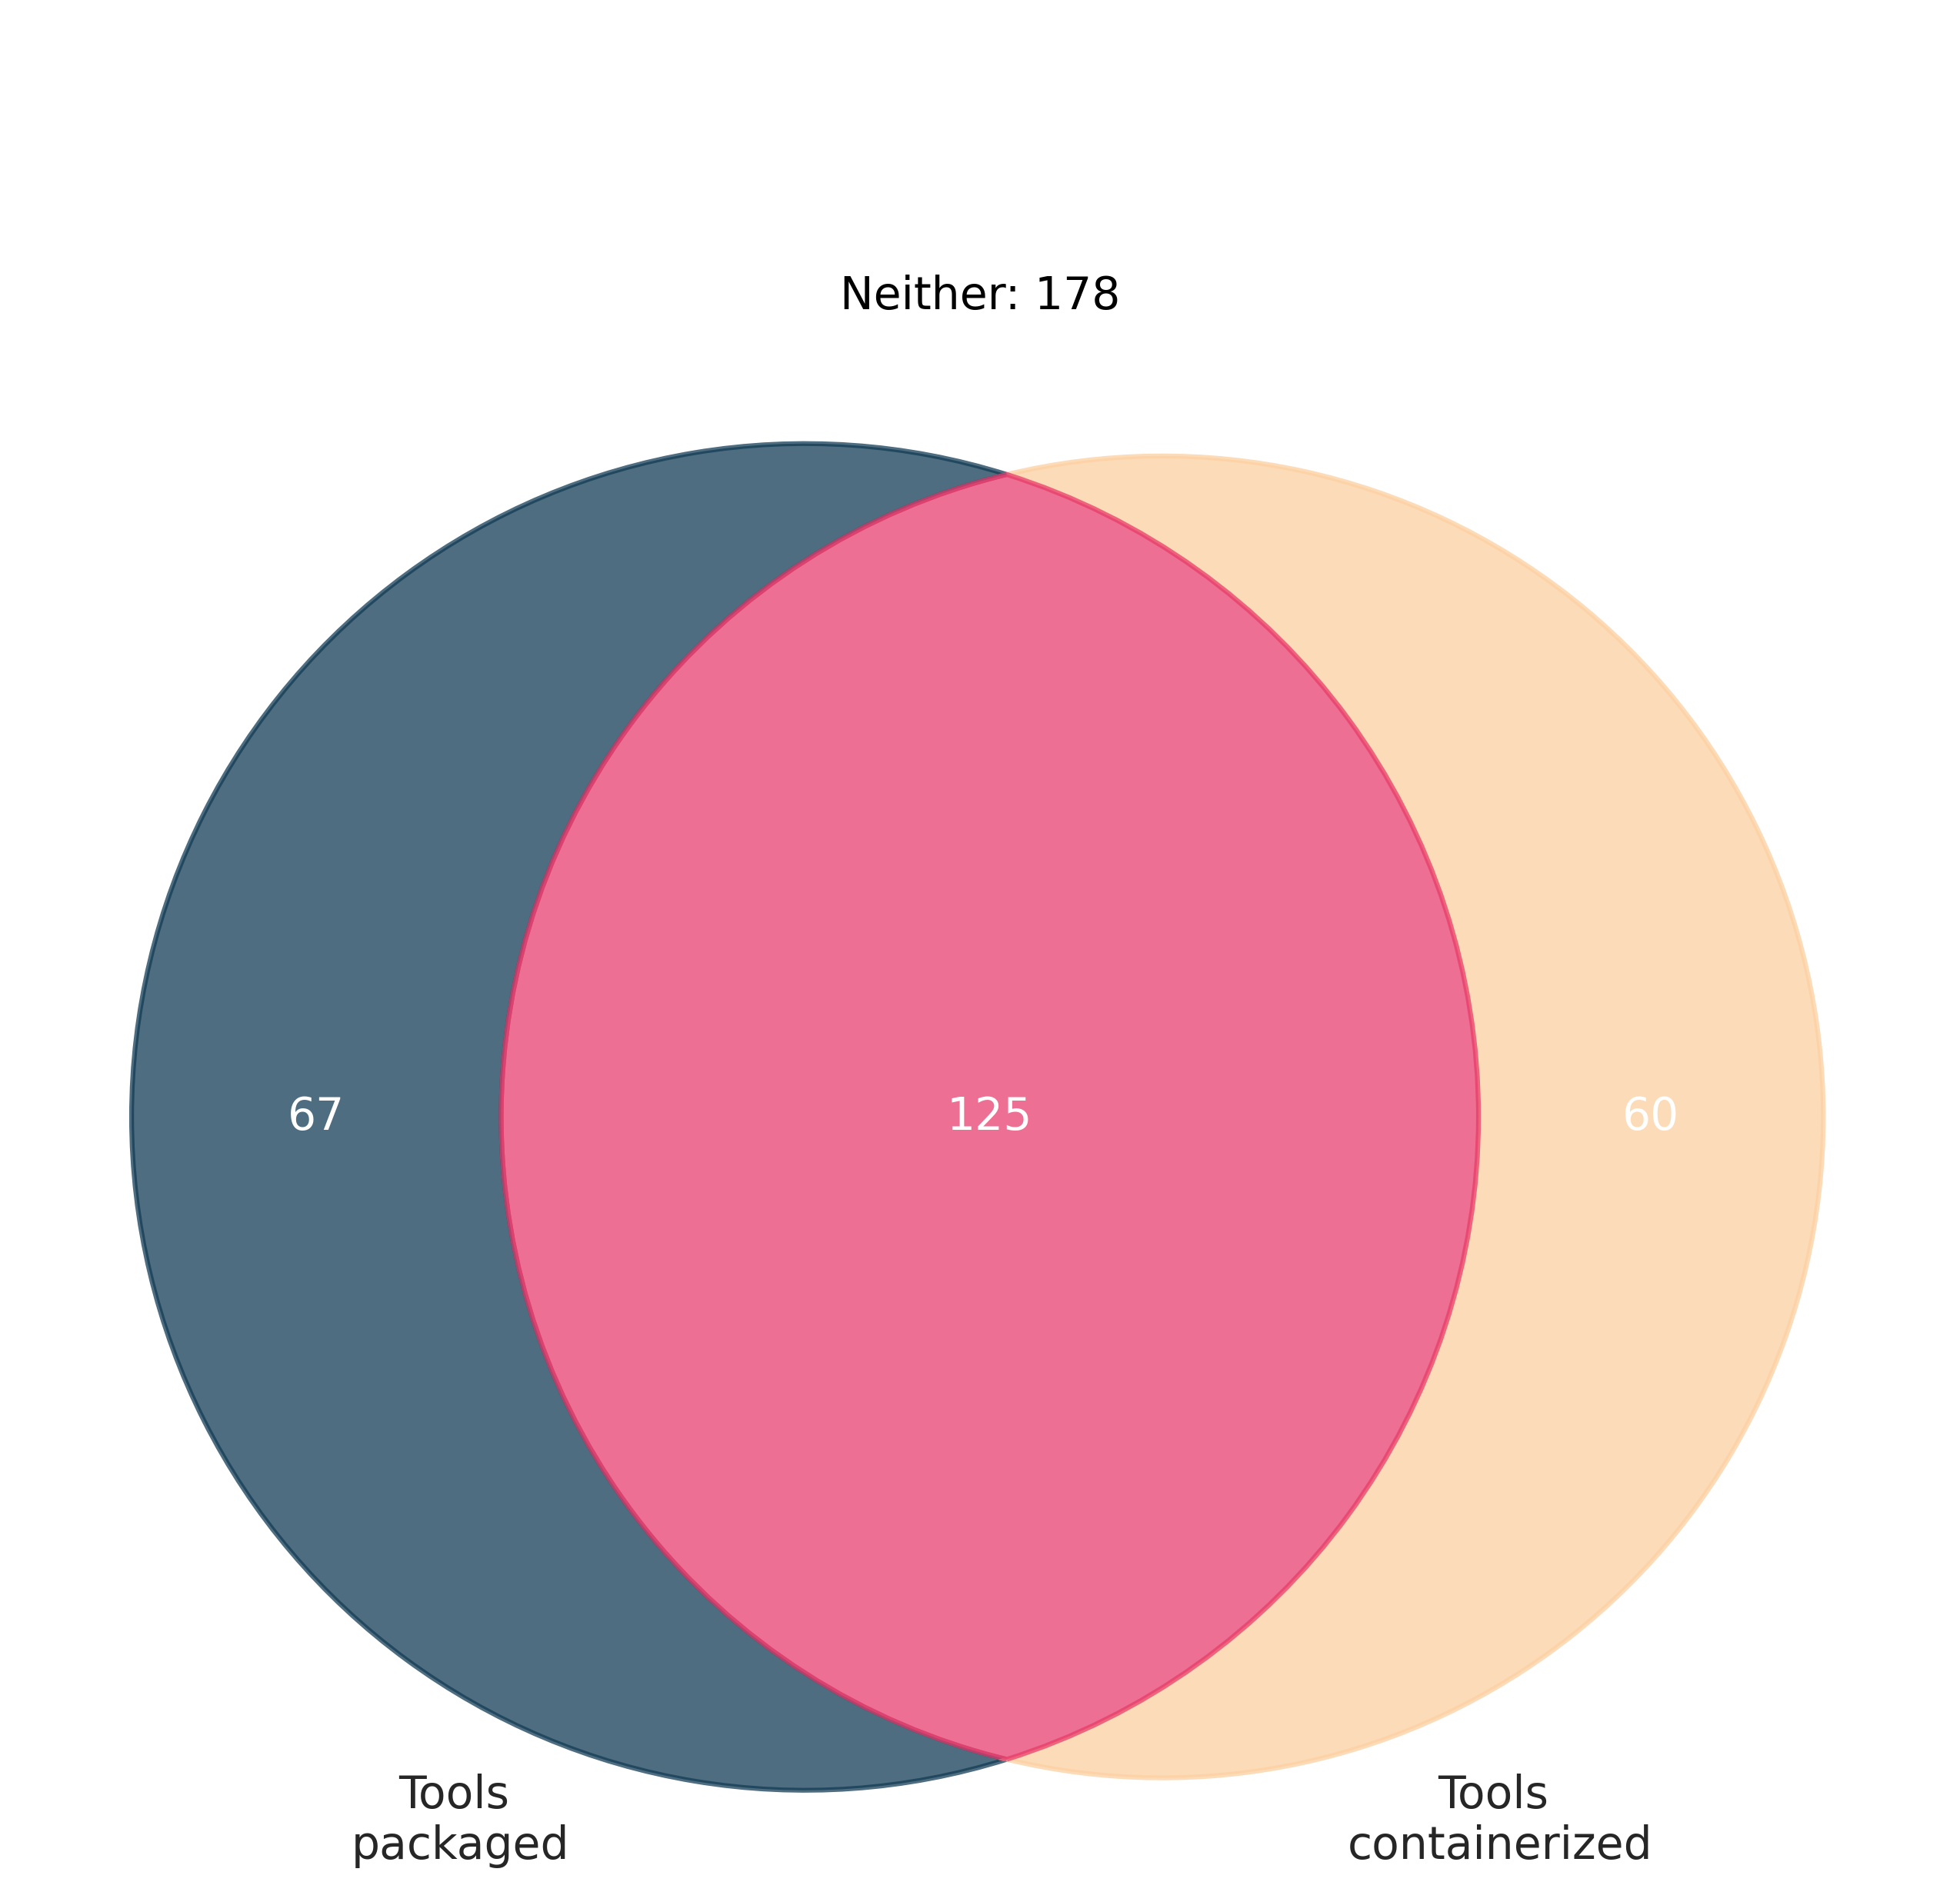

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Load dataset
file_path = "/content/drive/MyDrive/RNA_Seq_Project/CSV_RNA_Seq_without_links_06 25.csv"
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Define package manager and docker columns
pm_cols = [
    'Package manager availability - Anaconda',
    'Package manager availability - Bioconductor',
    'Package manager availability - R package manager (includes CRAN)',
    'Package manager availability - Python based package manager (includes pypi)',
    'Package manager availability - Other (homebrew and ubuntu)'
]
docker_col = 'Docker support'

# Normalize entries
for col in pm_cols + [docker_col]:
    data[col] = data[col].astype(str).str.strip().str.upper().replace({'YES': 'Y'})

# Identify tool types
data['Has_PM'] = data[pm_cols].eq('Y').any(axis=1)
data['Has_Docker'] = data[docker_col] == 'Y'

only_pm = ((data['Has_PM']) & (~data['Has_Docker'])).sum()
only_docker = ((~data['Has_PM']) & (data['Has_Docker'])).sum()
both = ((data['Has_PM']) & (data['Has_Docker'])).sum()
neither = ((~data['Has_PM']) & (~data['Has_Docker'])).sum()

# Plot
fig, ax = plt.subplots(figsize=(9, 8), dpi=300)

venn = venn2(
    subsets=(only_pm, only_docker, both),
    set_labels=('', ''),
    set_colors=["#133C55", "#FCD0A1"],
    alpha=0.75,
    ax=ax
)

# Apply custom colors to each region
color_fills = {
    '10': '#133C55',   # Only PM
    '01': '#FCD0A1',   # Only Docker
    '11': '#E83F6F'    # Both
}
color_edges = {
    '10': '#133C55',
    '01': '#FCD0A1',
    '11': '#E83F6F'
}
for label_id in ['10', '01', '11']:
    patch = venn.get_patch_by_id(label_id)
    if patch is not None:
        patch.set_color(color_fills[label_id])
        patch.set_alpha(0.75)
        patch.set_edgecolor(color_edges[label_id])
        patch.set_linewidth(1.5)

# Label region numbers
for label_id in ['10', '01', '11']:
    label = venn.get_label_by_id(label_id)
    if label:
        label.set_fontsize(14)
        label.set_color('white')

# Annotate "Neither" count
ax.text(0, 0.6, f'Neither: {neither}', fontsize=14, color='black',
        ha='center', va='center')

# Add custom labels below each circle
ax.text(-0.38, -0.48, 'Tools \npackaged', ha='center', va='top', fontsize=14)
ax.text(0.38, -0.48, 'Tools \ncontainerized', ha='center', va='top', fontsize=14)

# Adjust layout
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.55, 0.8)
plt.axis('off')
fig.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.show()
